In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
common_data_set = pd.read_csv('common_data_set.csv')
ucla_grades = pd.read_csv('ucla_grades.csv')
berkeley_grades = pd.read_csv('berkeley_grades.csv')
common_data_set.head(20)

# show all columns
pd.set_option('display.max_columns', None)

common_data_set.head(10) # prints first 10 rows
common_data_set # since this only has 17 rows, we can just print the whole thing

year       school  total_applied  total_accepted  uw_gpa_avg  sat_25  \
0   2019         UCLA         108831           13432       3.900  1290.0   
1   2020         UCLA         108877           15602       3.900  1290.0   
2   2021         UCLA         139490           15028       3.920     NaN   
3   2022         UCLA         149815           12844       3.930     NaN   
4   2023         UCLA         145910           12737       3.930     NaN   
5   2024         UCLA         146276           13114       3.930     NaN   
6   2020  UC Berkeley          87398           14676       3.930  1330.0   
7   2021  UC Berkeley         112846           16410       3.867     NaN   
8   2022  UC Berkeley         128226           14614       3.900     NaN   
9   2023  UC Berkeley         125916           14769       3.900     NaN   
10  2024  UC Berkeley         124245           13714       3.900     NaN   
11  2019      Hravard          43330            2009         NaN     NaN   
12  2020      Hravard          40248            2015         NaN     NaN   
13  2021      Harvard          57786            2318         NaN     NaN   
14  2022      Harvard          61221            1984         NaN     NaN   
15  2023      Harvard          56937            1965         NaN     NaN   
16  2024      Harvard          54008            1970         NaN     NaN   

    sat_avg  sat_75  act_25  act_avg  act_75  sat_math_25  sat_math_75  \
0       NaN  1510.0    27.0      NaN    34.0        640.0        790.0   
1       NaN  1510.0    29.0      NaN    34.0        640.0        780.0   
2       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
3       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
4       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
5       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
6    1430.0  1520.0    28.0     31.0    34.0        670.0        790.0   
7       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
8       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
9       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
10      NaN     NaN     NaN      NaN     NaN          NaN          NaN   
11      NaN     NaN    33.0      NaN    35.0        750.0        800.0   
12      NaN     NaN    33.0      NaN    35.0        740.0        800.0   
13      NaN     NaN    33.0      NaN    36.0        750.0        800.0   
14      NaN     NaN    34.0     35.0    36.0        760.0        800.0   
15      NaN     NaN    34.0     35.0    36.0        760.0        800.0   
16      NaN     NaN    34.0     35.0    36.0        770.0        800.0   

    sat_english_25  sat_english_75  act_math_25  act_math_75  act_english_25  \
0            640.0           740.0         26.0         34.0            27.0   
1            650.0           740.0         27.0         34.0             NaN   
2              NaN             NaN          NaN          NaN             NaN   
3              NaN             NaN          NaN          NaN             NaN   
4              NaN             NaN          NaN          NaN             NaN   
5              NaN             NaN          NaN          NaN             NaN   
6            640.0           740.0         27.0         35.0            28.0   
7              NaN             NaN          NaN          NaN             NaN   
8              NaN             NaN          NaN          NaN             NaN   
9              NaN             NaN          NaN          NaN             NaN   
10             NaN             NaN          NaN          NaN             NaN   
11           710.0           770.0         31.0         36.0            34.0   
12           720.0           780.0         31.0         35.0            35.0   
13           730.0           780.0         32.0         35.0            35.0   
14           730.0           780.0         32.0         35.0            35.0   
15           740.0    

#### Cleaning CDS

In [4]:
# Look at the general information of the dataframe
common_data_set.shape

# Look at data types of each column
common_data_set.dtypes

year                int64
school             object
total_applied       int64
total_accepted      int64
uw_gpa_avg        float64
sat_25            float64
sat_avg           float64
sat_75            float64
act_25            float64
act_avg           float64
act_75            float64
sat_math_25       float64
sat_math_75       float64
sat_english_25    float64
sat_english_75    float64
act_math_25       float64
act_math_75       float64
act_english_25    float64
act_english_75    float64
top_10p            object
top_25p            object
top_50p            object
bottom_50p         object
bottom_25p         object
uw_gpa_400         object
uw_gpa_375_399     object
uw_gpa_350_374     object
uw_gpa_325_349     object
uw_gpa_300_324     object
uw_gpa_100_299     object
dtype: object

In [ ]:
# Change "Hravard" to "Harvard"
common_data_set['school'] = common_data_set['school'].replace('Hravard', 'Harvard') # replace function

# # Get rid of all % signs
common_data_set = common_data_set.replace('%', '', regex = True)

# # Change column type to floats
s = common_data_set.select_dtypes(include='object').columns # use select_dtypes to get the object columns
s = s.drop('school') # get rid of the school column
common_data_set[s] = common_data_set[s].astype("float") # change dtype to float
print(common_data_set.dtypes) # check!
common_data_set.tail(7)

# drop the gpa "top" whatever column 
common_data_set = common_data_set.drop(columns=['top_10p', 'top_25p', 'top_50p', 'bottom_50p', 'bottom_25p'])
# common_data_set.tail()

year                int64
school             object
total_applied       int64
total_accepted      int64
uw_gpa_avg        float64
sat_25            float64
sat_avg           float64
sat_75            float64
act_25            float64
act_avg           float64
act_75            float64
sat_math_25       float64
sat_math_75       float64
sat_english_25    float64
sat_english_75    float64
act_math_25       float64
act_math_75       float64
act_english_25    float64
act_english_75    float64
top_10p           float64
top_25p           float64
top_50p           float64
bottom_50p        float64
bottom_25p        float64
uw_gpa_400        float64
uw_gpa_375_399    float64
uw_gpa_350_374    float64
uw_gpa_325_349    float64
uw_gpa_300_324    float64
uw_gpa_100_299    float64
dtype: object


year       school  total_applied  total_accepted  uw_gpa_avg  sat_25  \
10  2024  UC Berkeley         124245           13714         3.9     NaN   
11  2019      Harvard          43330            2009         NaN     NaN   
12  2020      Harvard          40248            2015         NaN     NaN   
13  2021      Harvard          57786            2318         NaN     NaN   
14  2022      Harvard          61221            1984         NaN     NaN   
15  2023      Harvard          56937            1965         NaN     NaN   
16  2024      Harvard          54008            1970         NaN     NaN   

    sat_avg  sat_75  act_25  act_avg  act_75  sat_math_25  sat_math_75  \
10      NaN     NaN     NaN      NaN     NaN          NaN          NaN   
11      NaN     NaN    33.0      NaN    35.0        750.0        800.0   
12      NaN     NaN    33.0      NaN    35.0        740.0        800.0   
13      NaN     NaN    33.0      NaN    36.0        750.0        800.0   
14      NaN     NaN    34.0     35.0    36.0        760.0        800.0   
15      NaN     NaN    34.0     35.0    36.0        760.0        800.0   
16      NaN     NaN    34.0     35.0    36.0        770.0        800.0   

    sat_english_25  sat_english_75  act_math_25  act_math_75  act_english_25  \
10             NaN             NaN          NaN          NaN             NaN   
11           710.0           770.0         31.0         36.0            34.0   
12           720.0           780.0         31.0         35.0            35.0   
13           730.0           780.0         32.0         35.0            35.0   
14           730.0           780.0         32.0         35.0            35.0   
15           740.0           780.0         33.0         36.0            35.0   
16           740.0           780.0         32.0         36.0            35.0   

    act_english_75  top_10p  top_25p  top_50p  bottom_50p  bottom_25p  \
10             NaN      NaN      NaN      NaN         NaN         NaN   
11            36.0     93.0    98.00   100.00        0.00         0.0   
12            36.0     94.0    98.00    99.60        0.40         0.2   
13            36.0     93.1    98.90    99.70        0.30         0.0   
14            36.0     92.2    97.60    99.80        0.20         0.2   
15            36.0     94.4    99.38    99.79        0.21         0.0   
16            36.0     94.0    99.00   100.00        0.00         0.0   

    uw_gpa_400  uw_gpa_375_399  uw_gpa_350_374  uw_gpa_325_349  \
10       37.70           51.50            8.60            1.50   
11       70.55           22.26            4.94            1.67   
12       75.76           18.02            4.00            1.79   
13       72.91           20.82            4.18            1.30   
14       74.30           20.47            4.04            0.51   
15       74.02           19.67            4.10            1.07   
16       72.41           22.20            4.11            0.60   

    uw_gpa_300_324  uw_gpa_100_299  
10            0.40            0.30  
11            0.42            0.16  
12            0.32            0.11  
13            0.43            0.36  
14            0.34            0.34  
15            0.82            0.32  
16            0.17            0.51

#### UCLA Grades
Let's get rid of unnecessary rows

In [21]:
# getting rid of unnecessary rows

# we're only looking at STATS 10; 20; 100, 101, 102 series
ucla_grades.head()
# get rid of unnecessary white spaces
ucla_grades['ENROLLMENT TERM'] = ucla_grades['ENROLLMENT TERM'].str.strip().str.upper()
ucla_grades['SUBJECT AREA'] = ucla_grades['SUBJECT AREA'].str.strip().str.upper()
ucla_grades['CATLG NBR'] = ucla_grades['CATLG NBR'].str.strip().str.upper()
ucla_grades['GRD OFF'] = ucla_grades['GRD OFF'].str.strip().str.upper()
ucla_grades['INSTR NAME'] = ucla_grades['INSTR NAME'].str.strip().str.upper()
ucla_grades['LONG CRSE TITLE'] = ucla_grades['LONG CRSE TITLE'].str.strip().str.upper()

# # shorthand loop
for col in ['ENROLLMENT TERM', 'SUBJECT AREA', 'CATLG NBR', 'GRD OFF', 'LONG CRSE TITLE', 'INSTR NAME']:
    ucla_grades[col] = ucla_grades[col].astype(str).str.strip().str.upper()


# # get rid of the rows where CATLG NUB != 10, 20, 100A, 100B, 100C, 101A, 101B, 101C, 102A, 102B, 102C
classes_to_keep = ['10', '20', '100A', '100B', '100C', '101A', '101B', '101C', '102A', '102B', '102C']
ucla_grades = ucla_grades[ucla_grades['CATLG NBR'].isin(classes_to_keep)] 

# # see how many of each class are in the dataset
ucla_grades['CATLG NBR'].value_counts()

# # see the shape of the dataframe
ucla_grades.shape

ucla_grades['ENROLLMENT TERM'].unique()
ucla_grades['GRD OFF'].unique()

# ucla_grades.head(50)

array(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'NP', 'P', 'D+', 'D',
       'D-', 'F', 'C-', 'I', 'S', 'DR'], dtype=object)

Get rid of grades that aren't letter grades

In [22]:
grades_to_remove = ['NP', 'P', 'I', 'S', 'DR']

# get rid of the rows with those those values
ucla_grades = ucla_grades[~ucla_grades['GRD OFF'].isin(grades_to_remove)].copy()

# combine classes with multiple lectures (eg 2 lectures taught by same instructor in the same quarter)
ucla_grades = (
    ucla_grades
    .groupby(['ENROLLMENT TERM', 'SUBJECT AREA', 'CATLG NBR', 'LONG CRSE TITLE', 'INSTR NAME', 'GRD OFF'], sort = False)
    .agg({'GRD COUNT': 'sum'})
    .reset_index()
)

# add up the total grades
ucla_grades['ENRL TOT'] = ucla_grades.groupby(
    ['ENROLLMENT TERM', 'SUBJECT AREA', 'CATLG NBR', 'LONG CRSE TITLE', 'INSTR NAME']
)['GRD COUNT'].transform('sum')


ucla_grades.head(50)

ENROLLMENT TERM SUBJECT AREA CATLG NBR  \
0              21F        STATS        10   
1              21F        STATS        10   
2              21F        STATS        10   
3              21F        STATS        10   
4              21F        STATS        10   
5              21F        STATS        10   
6              21F        STATS        10   
7              21F        STATS        10   
8              21F        STATS        10   
9              21F        STATS        10   
10             21F        STATS        10   
11             21F        STATS        10   
12             21F        STATS        10   
13             21F        STATS        10   
14             21F        STATS        10   
15             21F        STATS        10   
16             21F        STATS        10   
17             21F        STATS        10   
18             21F        STATS        10   
19             21F        STATS        10   
20             21F        STATS        10   
21             21F        STATS        10   
22             21F        STATS        10   
23             21F        STATS        10   
24             21F        STATS        10   
25             21F        STATS        10   
26             21F        STATS        10   
27             21F        STATS        10   
28             21F        STATS        10   
29             21F        STATS        10   
30             21F        STATS        10   
31             21F        STATS        10   
32             21F        STATS        20   
33             21F        STATS        20   
34             21F        STATS        20   
35             21F        STATS        20   
36             21F        STATS        20   
37             21F        STATS        20   
38             21F        STATS        20   
39             21F        STATS        20   
40             21F        STATS        20   
41             21F        STATS      100A   
42             21F        STATS      100A   
43             21F        STATS      100A   
44             21F        STATS      100A   
45             21F        STATS      100A   
46             21F        STATS      100A   
47             21F        STATS      100A   
48             21F        STATS      100A   
49             21F        STATS      100A   

                                   LONG CRSE TITLE  \
0            INTRODUCTION TO STATISTICAL REASONING   
1            INTRODUCTION TO STATISTICAL REASONING   
2            INTRODUCTION TO STATISTICAL REASONING   
3            INTRODUCTION TO STATISTICAL REASONING   
4            INTRODUCTION TO STATISTICAL REASONING   
5            INTRODUCTION TO STATISTICAL REASONING   
6            INTRODUCTION TO STATISTICAL REASONING   
7            INTRODUCTION TO STATISTICAL REASONING   
8            INTRODUCTION TO STATISTICAL REASONING   
9            INTRODUCTION TO STATISTICAL REASONING   
10           INTRODUCTION TO STATISTICAL REASONING   
11           INTRODUCTION TO STATISTICAL REASONING   
12           INTRODUCTION TO STATISTICAL REASONING   
13           INTRODUCTION TO STATISTICAL REASONING   
14           INTRODUCTION TO STATISTICAL REASONING   
15           INTRODUCTION TO STATISTICAL REASONING   
16           INTRODUCTION TO STATISTICAL REASONING   
17           INTRODUCTION TO STATISTICAL REASONING   
18           INTRODUCTION TO STATISTICAL REASONING   
19           INTRODUCTION TO STATISTICAL REASONING   
20           INTRODUCTION TO STATISTICAL REASONING   
21           INTRODUCTION TO STATISTICAL REASONING   
22           INTRODUCTION TO STATISTICAL REASONING   
23           INTRODUCTION TO STATISTICAL REASONING   
24           INTRODUCTION TO STATISTICAL REASONING   
25           INTRODUCTION TO STATISTICAL REASONING   
26           INTRODUCTION TO STATISTICAL REASONING   
27           INTRODUCTION TO STATISTICAL REASONING   
28           INTRODUCTION TO STATISTICAL REASONING   
29           INTRODUCTION TO STATISTICAL REASONING   
30           INTRODUCTION TO STAT

In [23]:
berkeley_grades.head()
berkeley_grades['ENROLLMENT TERM'].unique()

# change the enrollment term to follow the formatting of UCLA
berkeley_grades['ENROLLMENT TERM'] = berkeley_grades['ENROLLMENT TERM'].replace({
    'Fall 2020': '20F',
    'Spring 2021': '21S',
    'Summer 2021': '211',
    'Fall 2021': '21F',
    'Spring 2022': '22S',
    'Summer 2022': '221',
    'Fall 2022': '22F',
    'Spring 2023': '23S',
    'Summer 2023': '231',
    'Fall 2023': '23F',
    'Spring 2024': '24S',
    'Summer 2024': '241',
    'Fall 2024': '24F',
    'Spring 2025': '25S',
    'Summer 2025': '251'})

berkeley_grades['ENROLLMENT TERM'].unique()
berkeley_grades.head()
berkeley_grades['GRD OFF'].unique()

array(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'F', 'D-', 'D',
       'D+'], dtype=object)

#### Exploratory Data Analysis (EDA)

Purpose: stare at the data before we assume anything. We can't blindly go like "SAT has led to a decrease in GPA of those admitted," or simply find data that supports that hypothesis (confirmation bias). We must look at all the data fairly, and sometimes we'll find interesting patterns or patterns we don't expect! 

It's completely okay if we make a hypothesis and the data shows that there's nothing significant. For example, maybe GPAs have stayed relatively constant despite getting rid of SATs. If anything, you can imply that getting rid of SAT has not reduced the academic status of students here, or there could be a third variable in play! Usually, you would run statistics tests to prove causation but we learn that in the stats classes here so I will not be going over it. We're only going to look at CORRELATION.

#### Common Dataset Exploration


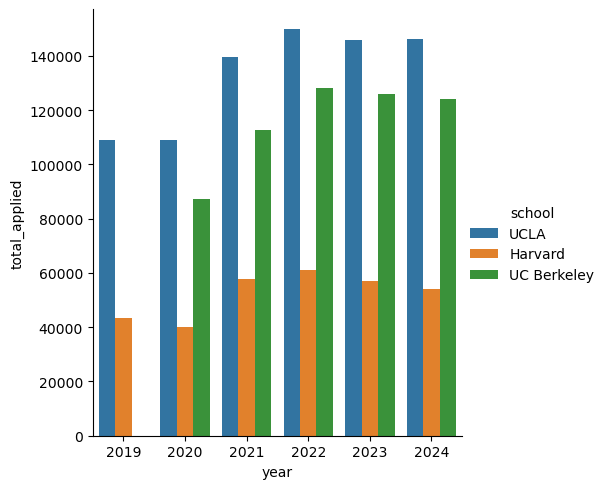

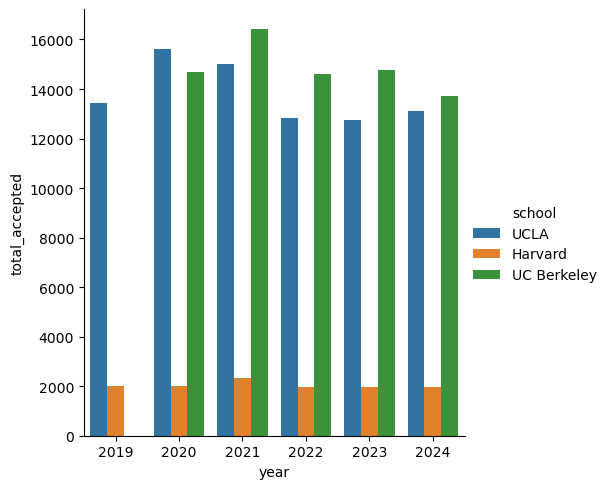

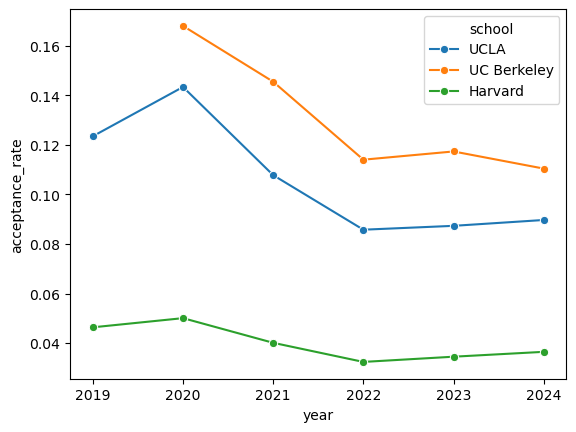

In [8]:
common_data_set
sns.catplot(data = common_data_set, x = 'year', y = 'total_applied', hue = 'school', kind = 'bar')
plt.show()
sns.catplot(data = common_data_set, x = 'year', y = 'total_accepted', hue = 'school', kind = 'bar')
plt.show()

common_data_set['acceptance_rate'] = common_data_set['total_accepted'] / common_data_set['total_applied']
sns.lineplot(data=common_data_set, x='year', y='acceptance_rate', hue='school', marker='o')
plt.show()

In [ ]:
common_data_set

# look at the spread of gpa ranges
sns.catplot(data = common_data_set, x = 'year', y = 'uw_gpa_400', kind = 'bar', hue = 'school')
plt.show()
sns.catplot(data = common_data_set, x = 'year', y = 'uw_gpa_375_399', kind = 'bar', hue = 'school')
plt.show()
sns.catplot(data = common_data_set, x = 'year', y = 'uw_gpa_350_374', kind = 'bar', hue = 'school')
plt.show()
sns.catplot(data = common_data_set, x = 'year', y = 'uw_gpa_325_349', kind = 'bar', hue = 'school')
plt.show()
sns.catplot(data = common_data_set, x = 'year', y = 'uw_gpa_300_324', kind = 'bar', hue = 'school')
plt.show()
sns.catplot(data=common_data_set, x = 'year', y = 'uw_gpa_100_299', kind = 'bar', hue = 'school')

# do the same for the sats

year       school  total_applied  total_accepted  uw_gpa_avg  sat_25  \
0   2019         UCLA         108831           13432       3.900  1290.0   
1   2020         UCLA         108877           15602       3.900  1290.0   
2   2021         UCLA         139490           15028       3.920     NaN   
3   2022         UCLA         149815           12844       3.930     NaN   
4   2023         UCLA         145910           12737       3.930     NaN   
5   2024         UCLA         146276           13114       3.930     NaN   
6   2020  UC Berkeley          87398           14676       3.930  1330.0   
7   2021  UC Berkeley         112846           16410       3.867     NaN   
8   2022  UC Berkeley         128226           14614       3.900     NaN   
9   2023  UC Berkeley         125916           14769       3.900     NaN   
10  2024  UC Berkeley         124245           13714       3.900     NaN   
11  2019      Harvard          43330            2009         NaN     NaN   
12  2020      Harvard          40248            2015         NaN     NaN   
13  2021      Harvard          57786            2318         NaN     NaN   
14  2022      Harvard          61221            1984         NaN     NaN   
15  2023      Harvard          56937            1965         NaN     NaN   
16  2024      Harvard          54008            1970         NaN     NaN   

    sat_avg  sat_75  act_25  act_avg  act_75  sat_math_25  sat_math_75  \
0       NaN  1510.0    27.0      NaN    34.0        640.0        790.0   
1       NaN  1510.0    29.0      NaN    34.0        640.0        780.0   
2       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
3       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
4       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
5       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
6    1430.0  1520.0    28.0     31.0    34.0        670.0        790.0   
7       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
8       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
9       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
10      NaN     NaN     NaN      NaN     NaN          NaN          NaN   
11      NaN     NaN    33.0      NaN    35.0        750.0        800.0   
12      NaN     NaN    33.0      NaN    35.0        740.0        800.0   
13      NaN     NaN    33.0      NaN    36.0        750.0        800.0   
14      NaN     NaN    34.0     35.0    36.0        760.0        800.0   
15      NaN     NaN    34.0     35.0    36.0        760.0        800.0   
16      NaN     NaN    34.0     35.0    36.0        770.0        800.0   

    sat_english_25  sat_english_75  act_math_25  act_math_75  act_english_25  \
0            640.0           740.0         26.0         34.0            27.0   
1            650.0           740.0         27.0         34.0             NaN   
2              NaN             NaN          NaN          NaN             NaN   
3              NaN             NaN          NaN          NaN             NaN   
4              NaN             NaN          NaN          NaN             NaN   
5              NaN             NaN          NaN          NaN             NaN   
6            640.0           740.0         27.0         35.0            28.0   
7              NaN             NaN          NaN          NaN             NaN   
8              NaN             NaN          NaN          NaN             NaN   
9              NaN             NaN          NaN          NaN             NaN   
10             NaN             NaN          NaN          NaN             NaN   
11           710.0           770.0         31.0         36.0            34.0   
12           720.0           780.0         31.0         35.0            35.0   
13           730.0           780.0         32.0         35.0            35.0   
14           730.0           780.0         32.0         35.0            35.0   
15           740.0    

#### Berkeley and UCLA Grades

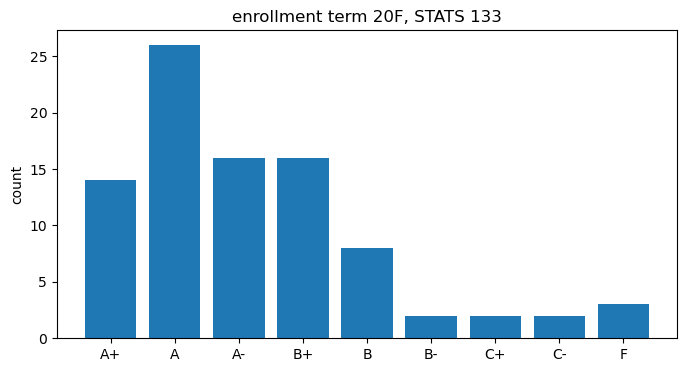

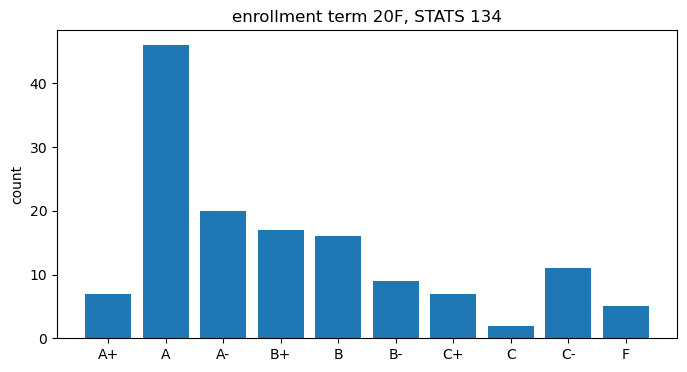

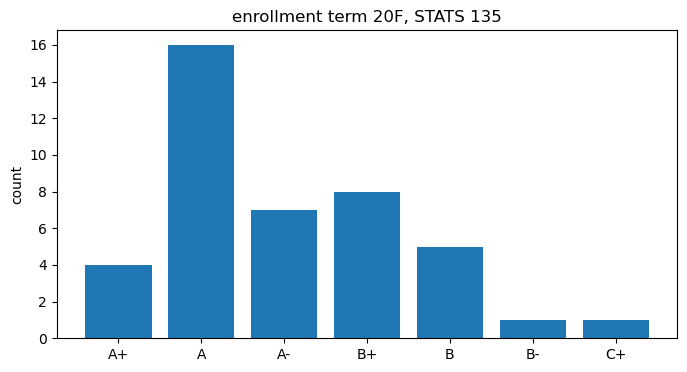

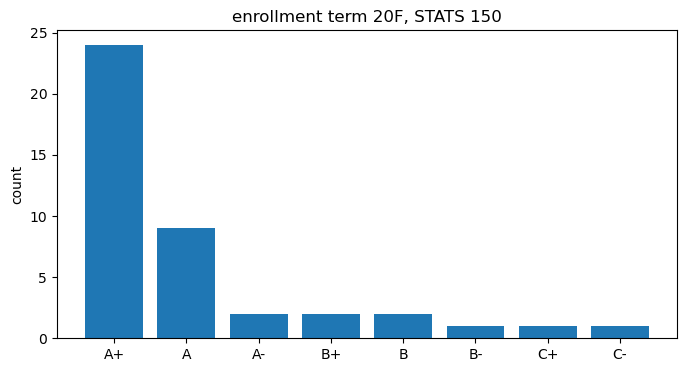

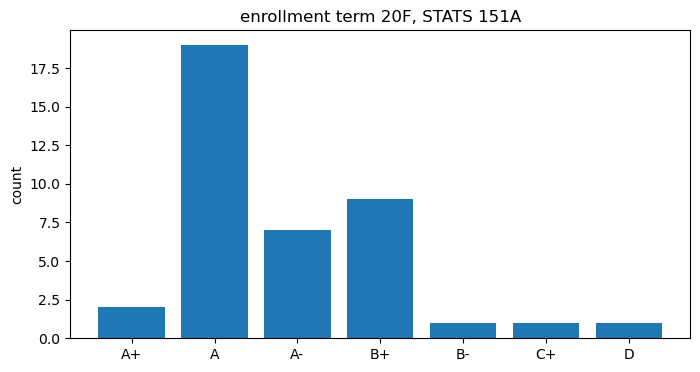

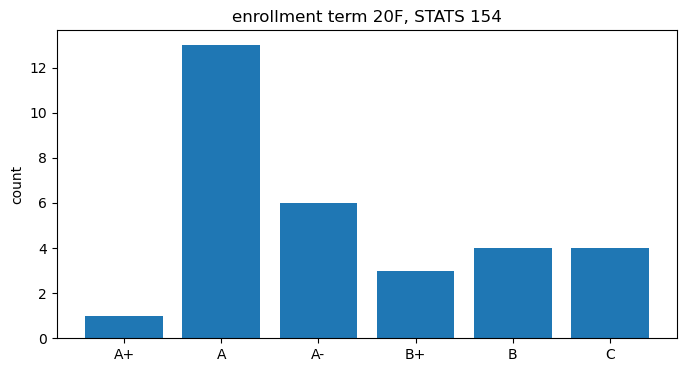

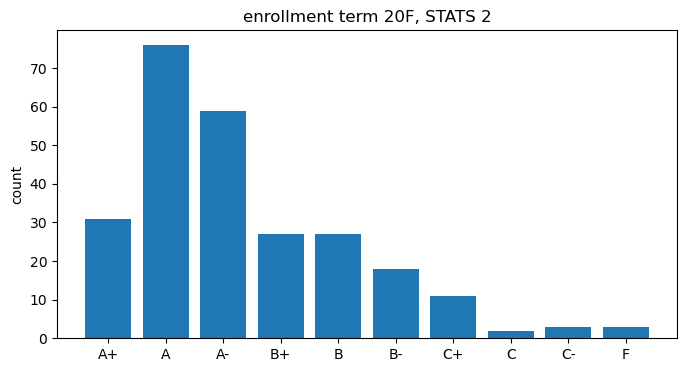

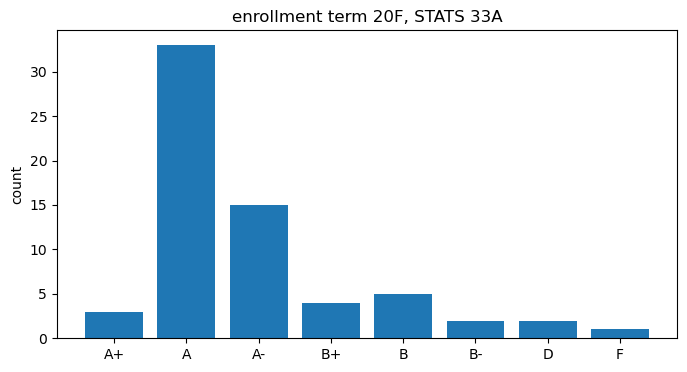

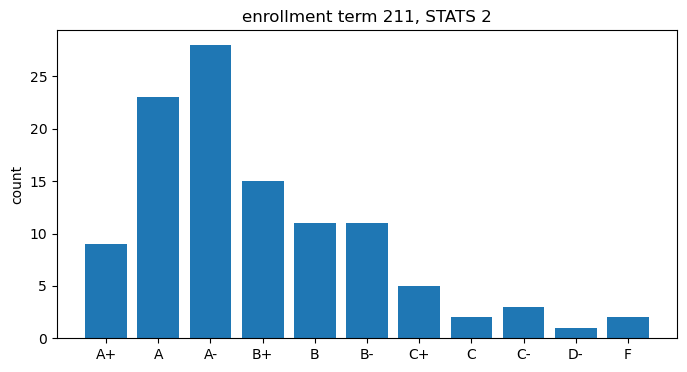

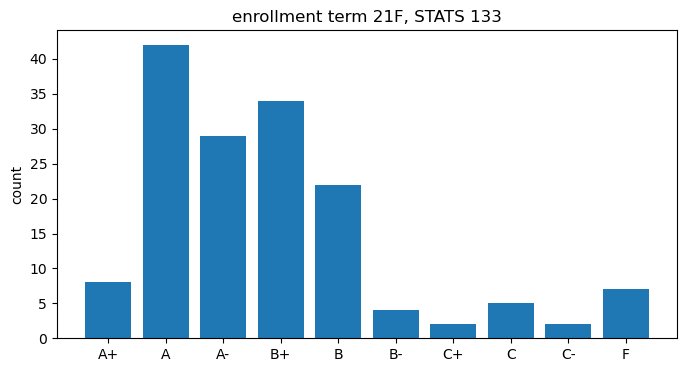

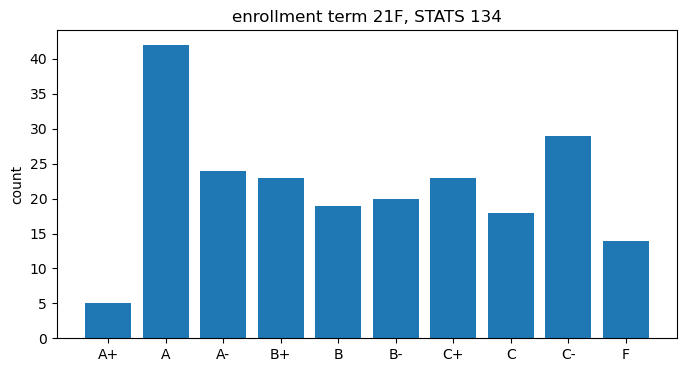

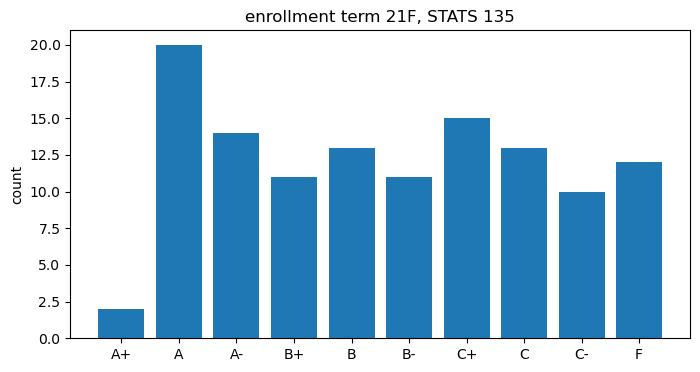

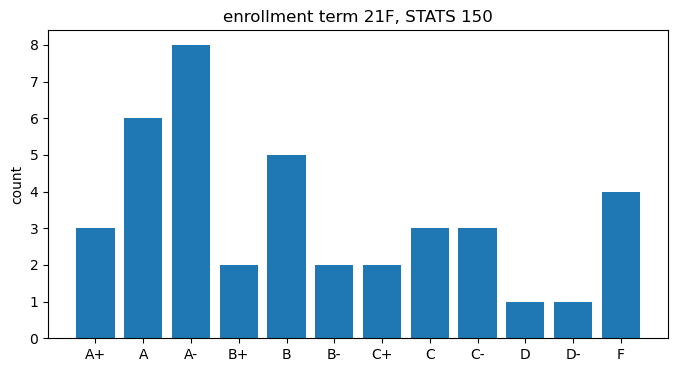

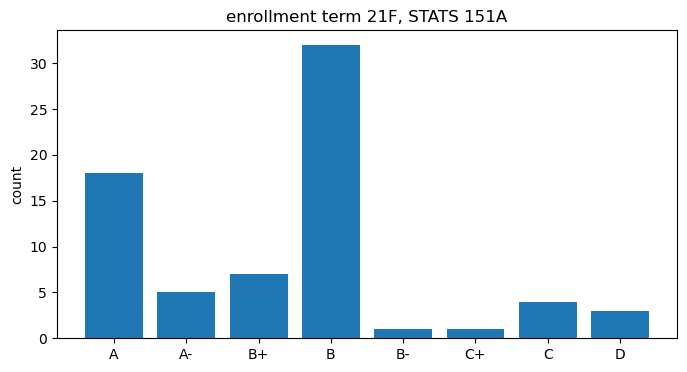

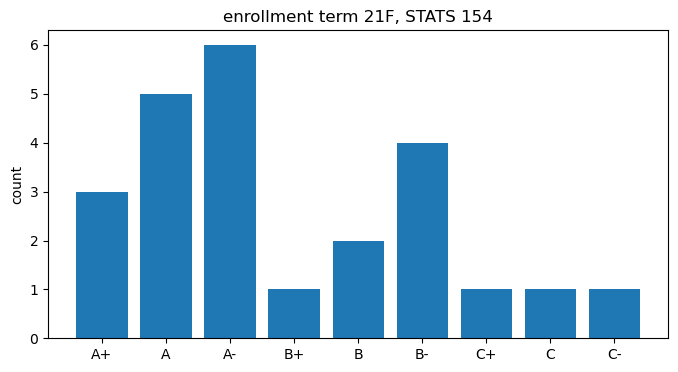

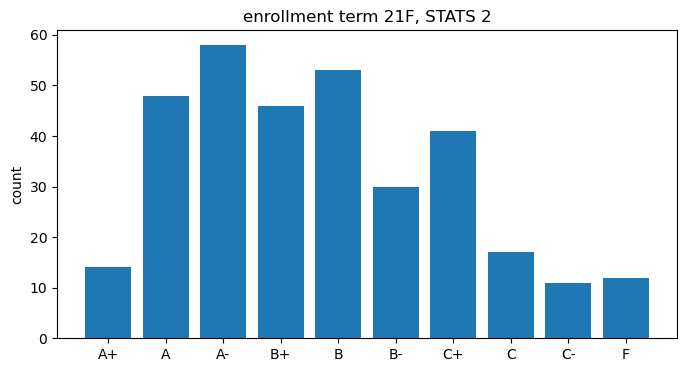

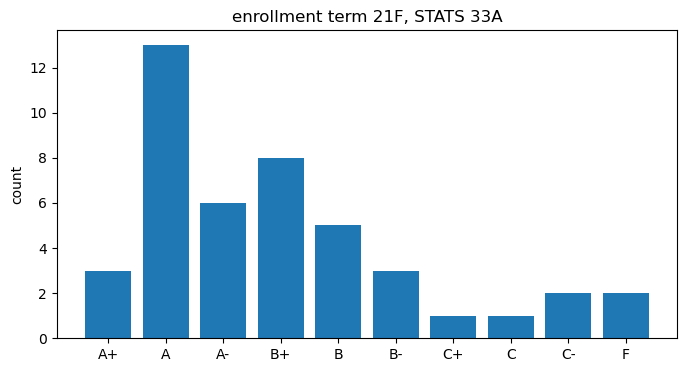

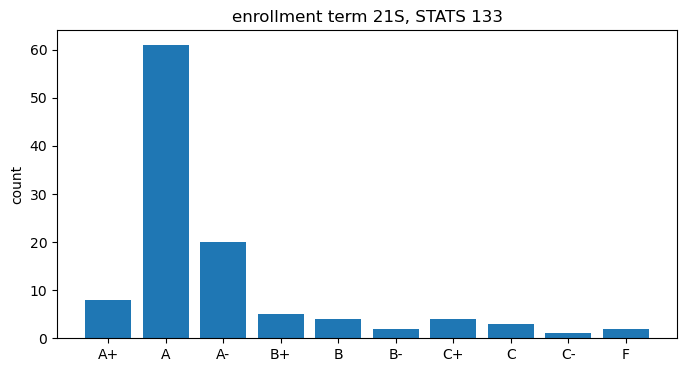

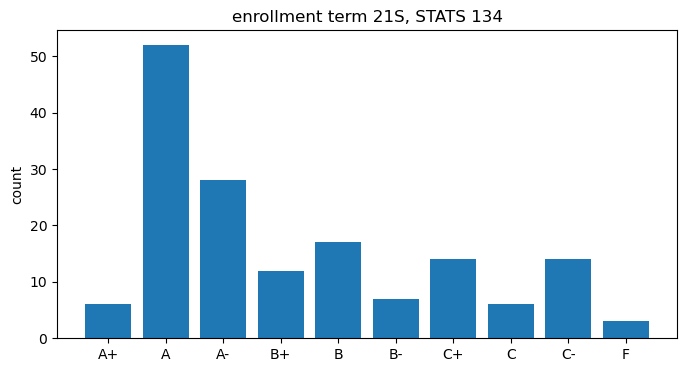

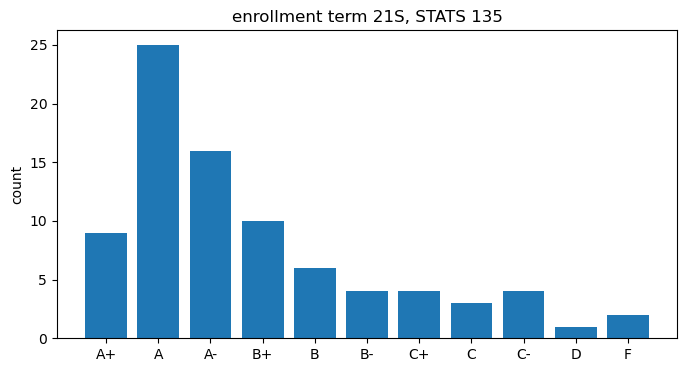

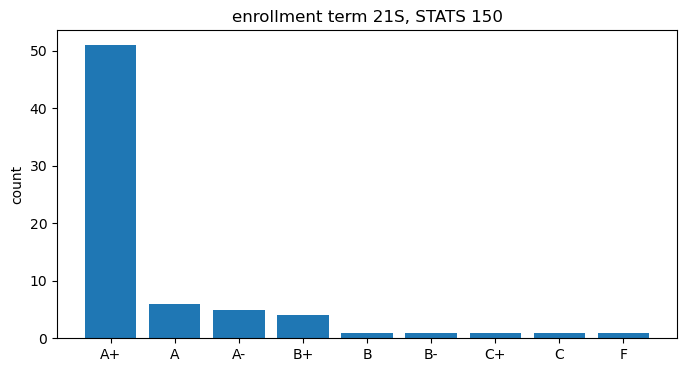

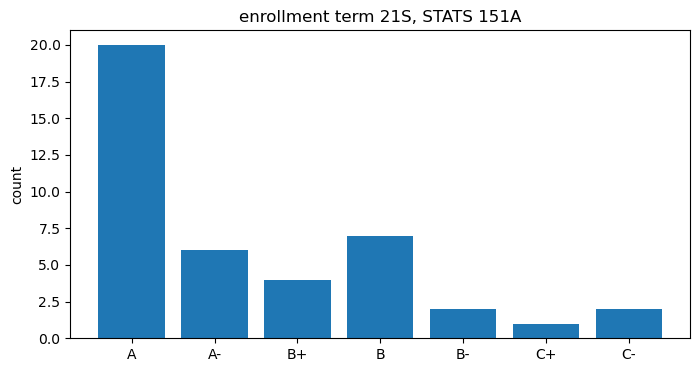

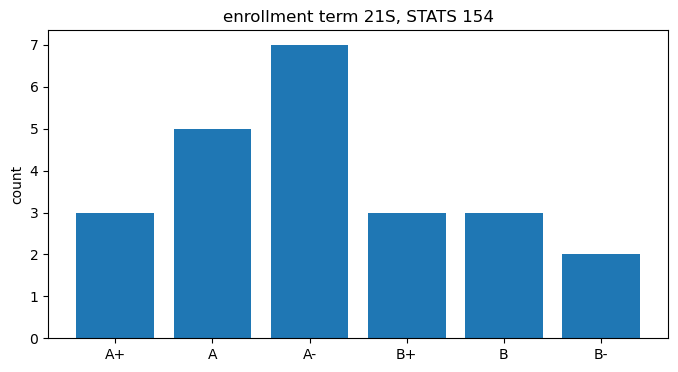

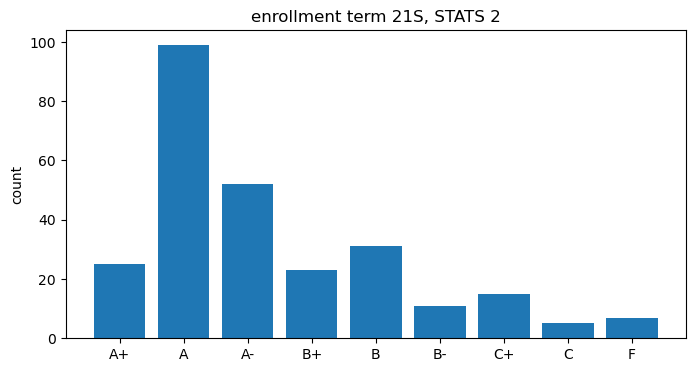

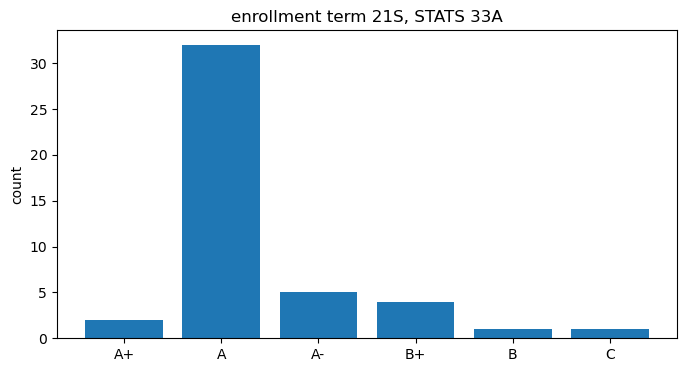

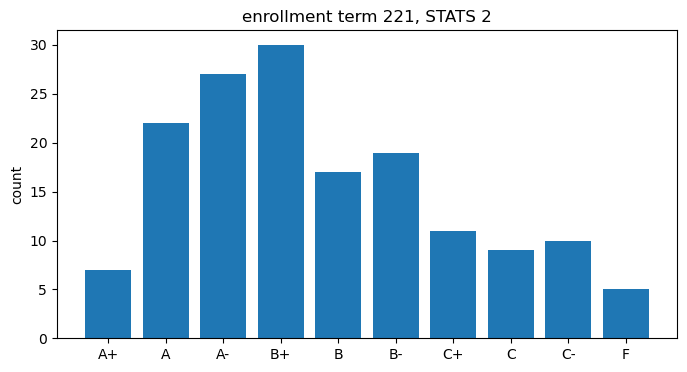

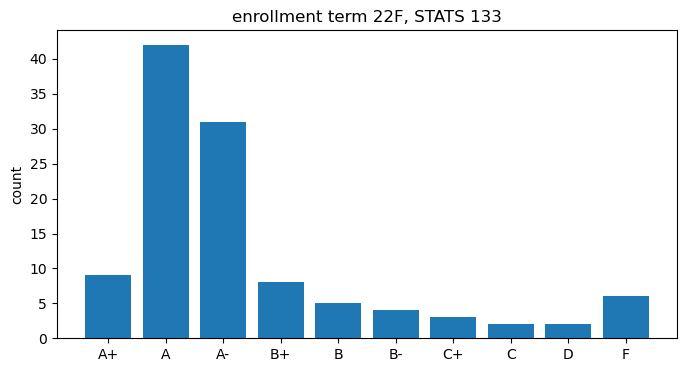

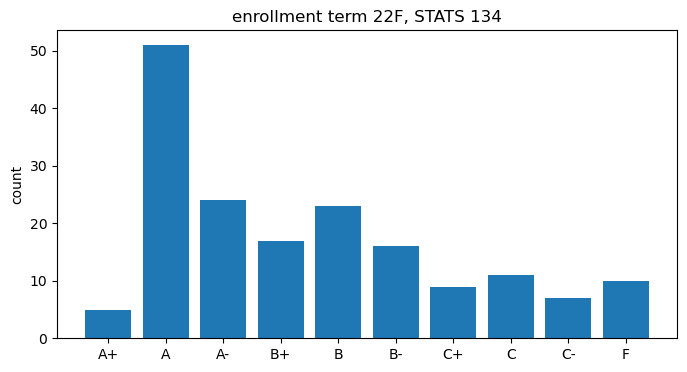

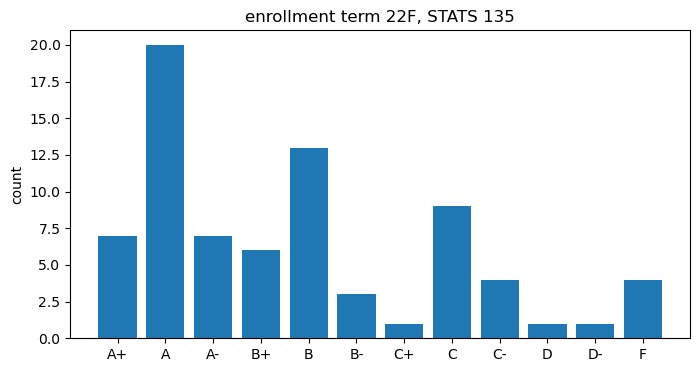

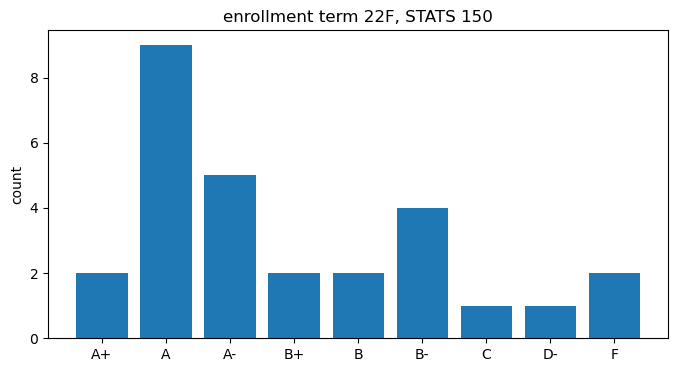

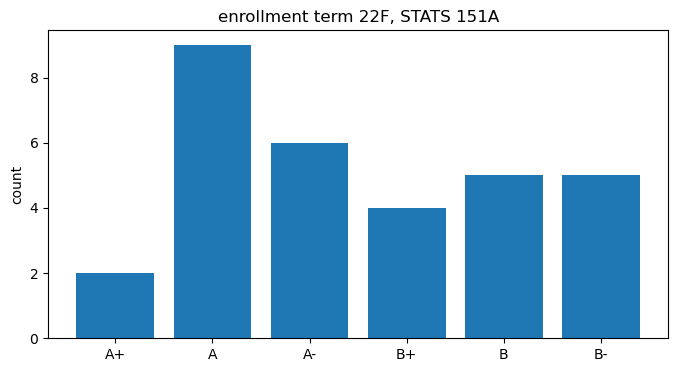

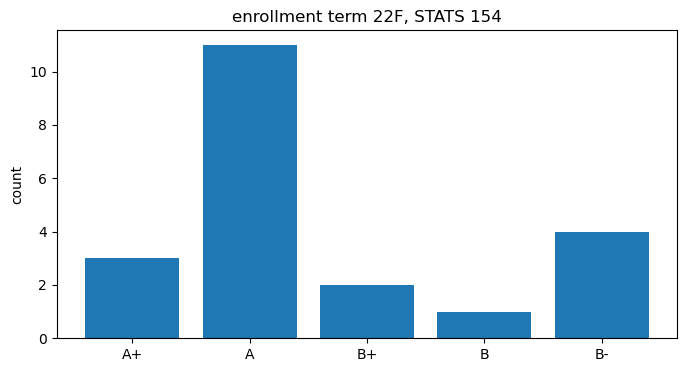

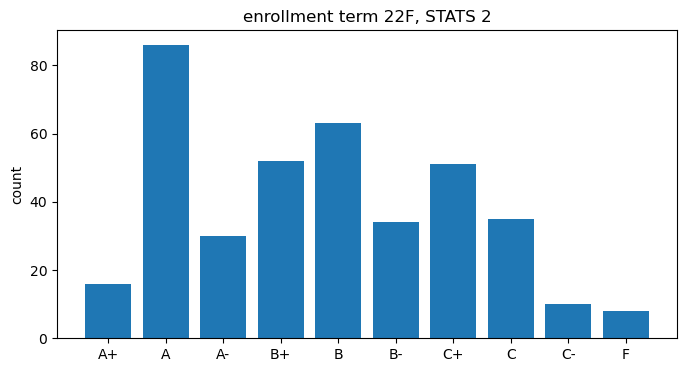

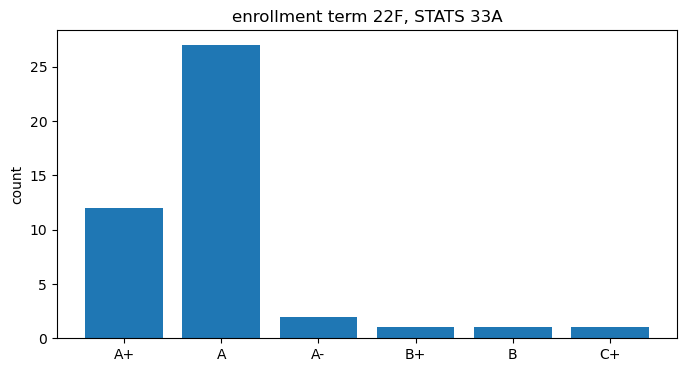

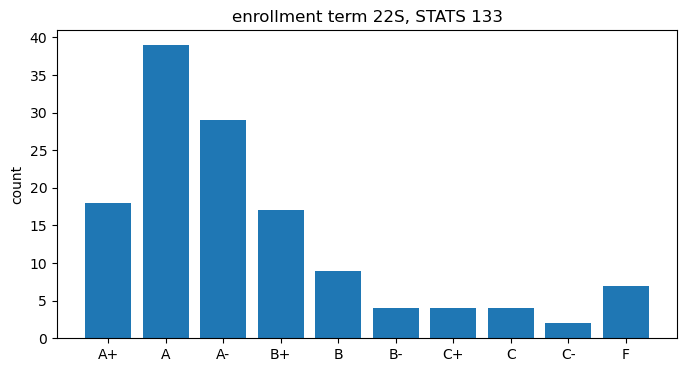

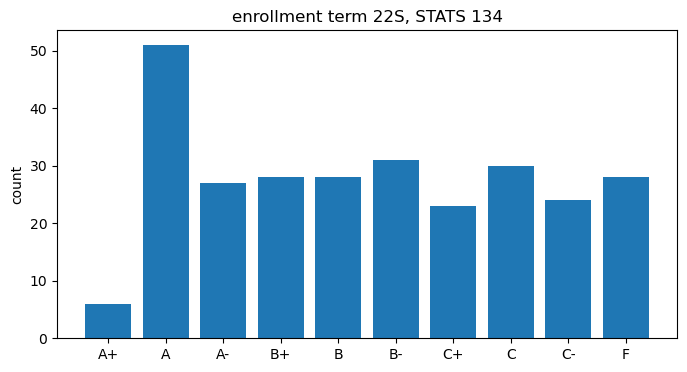

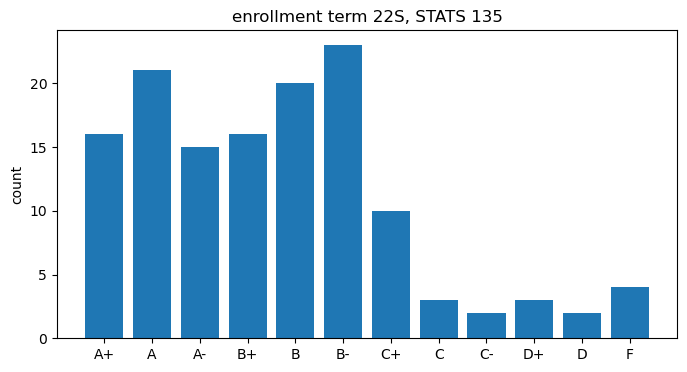

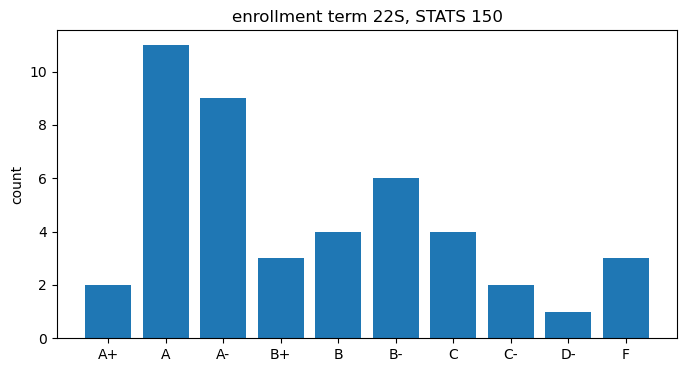

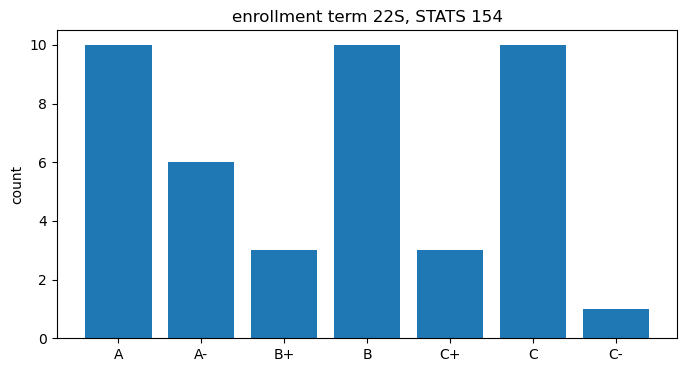

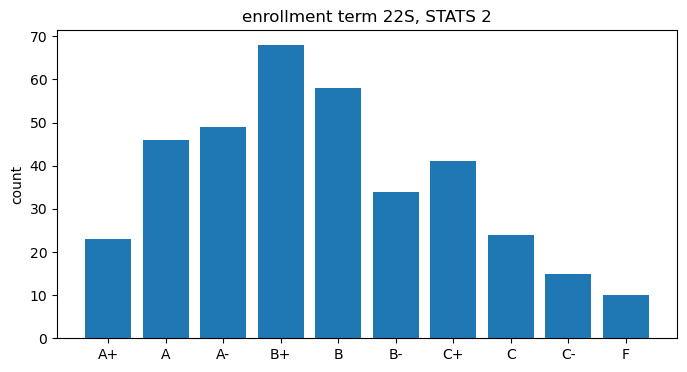

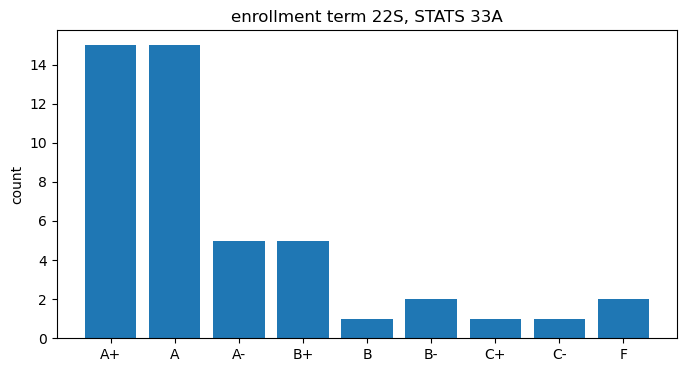

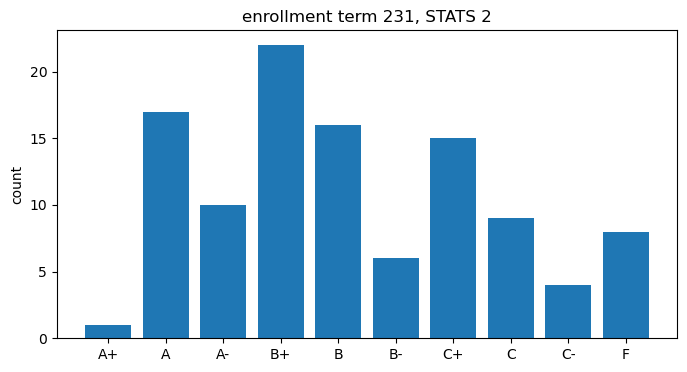

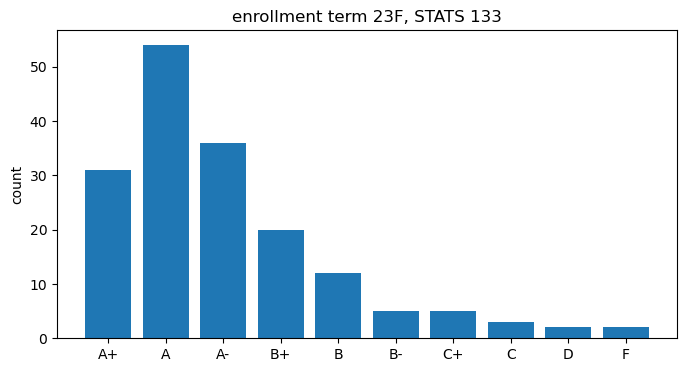

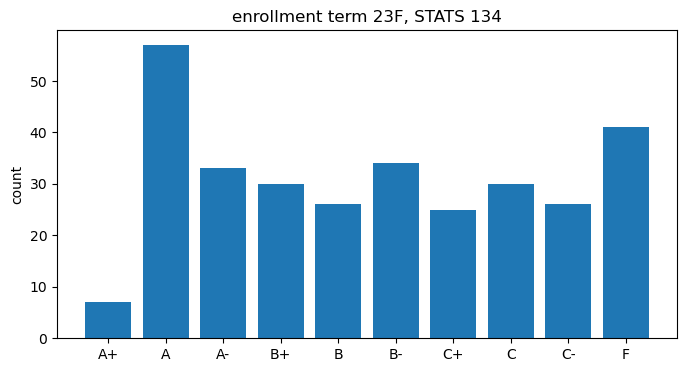

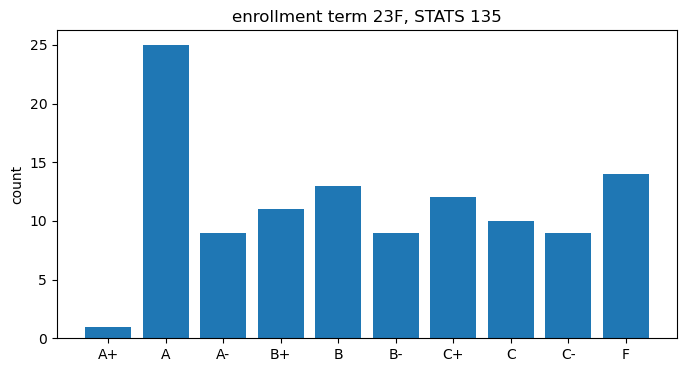

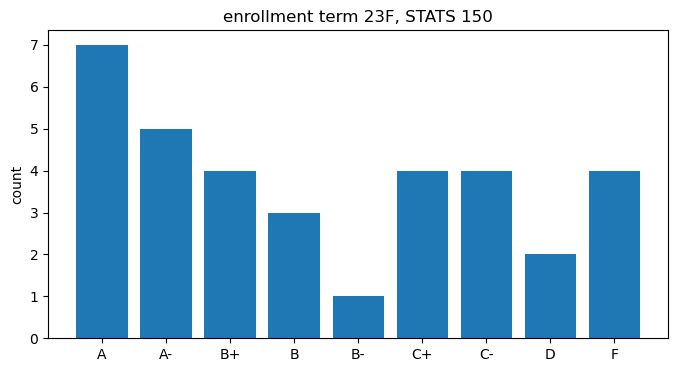

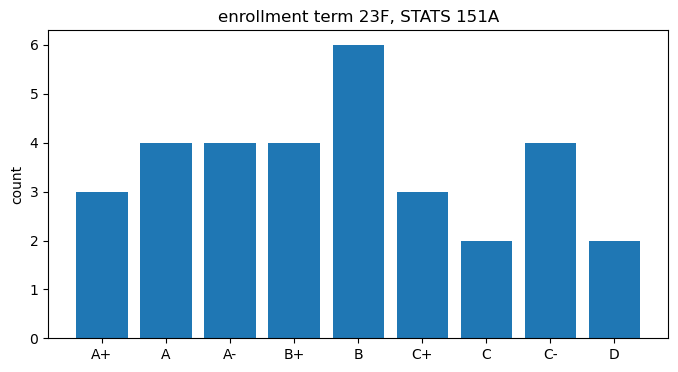

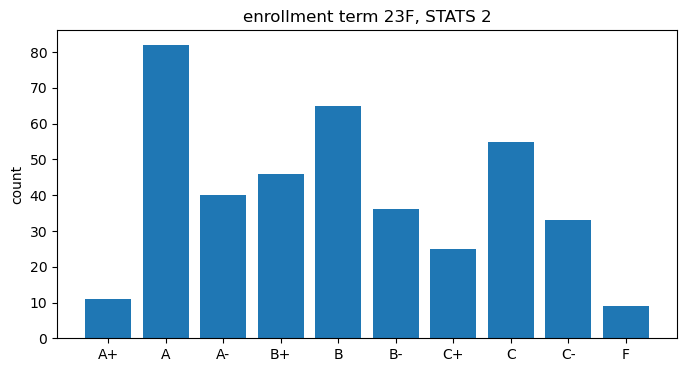

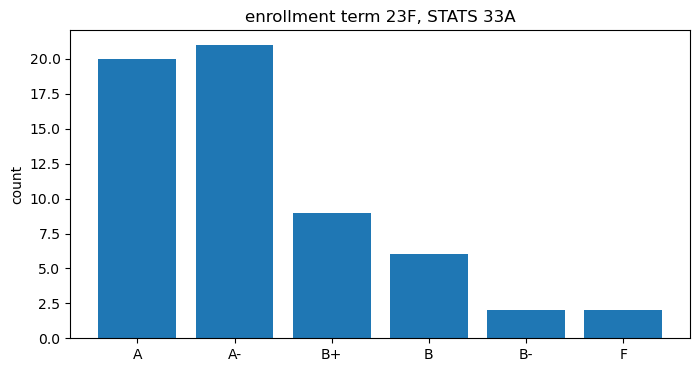

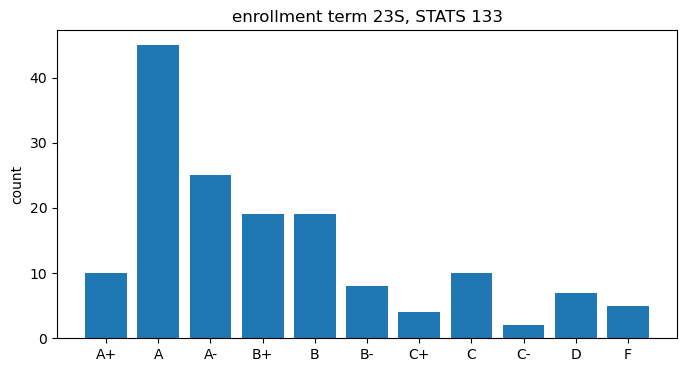

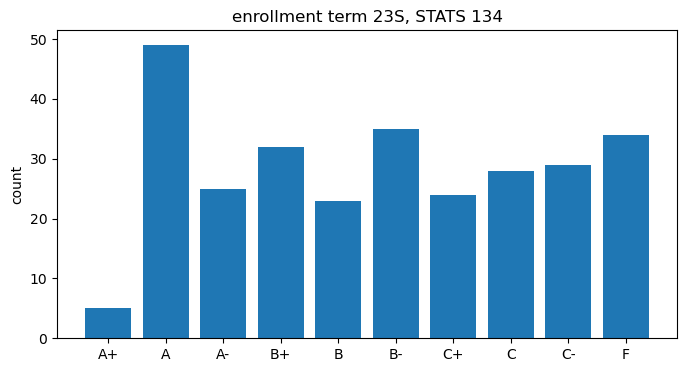

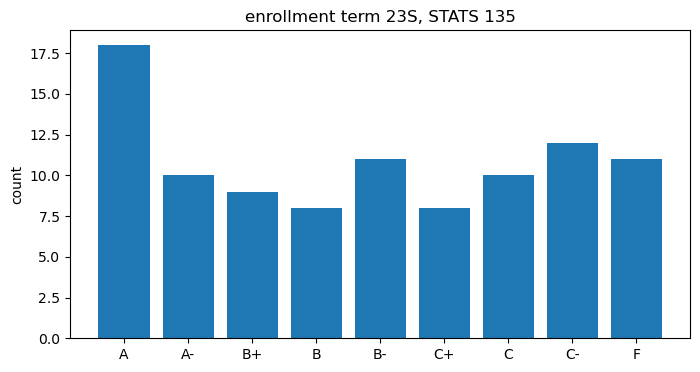

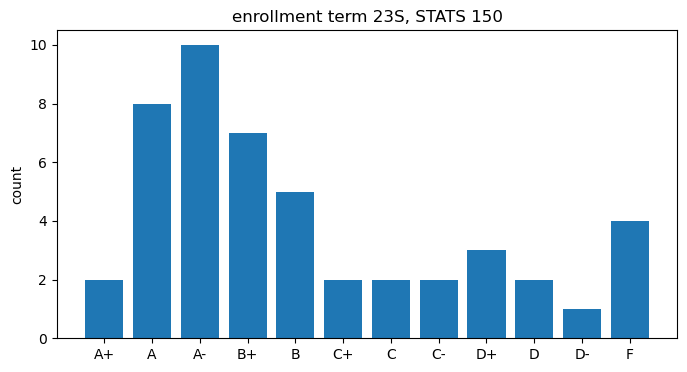

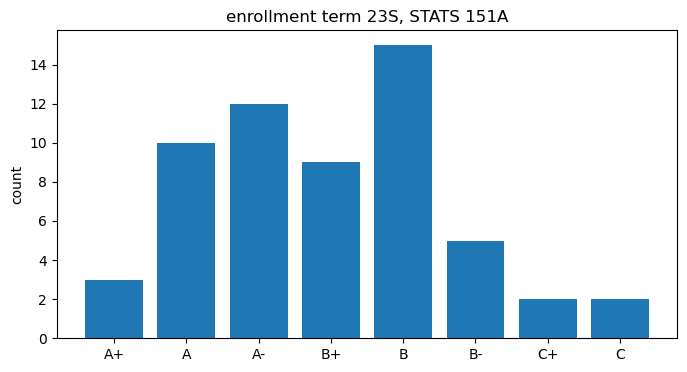

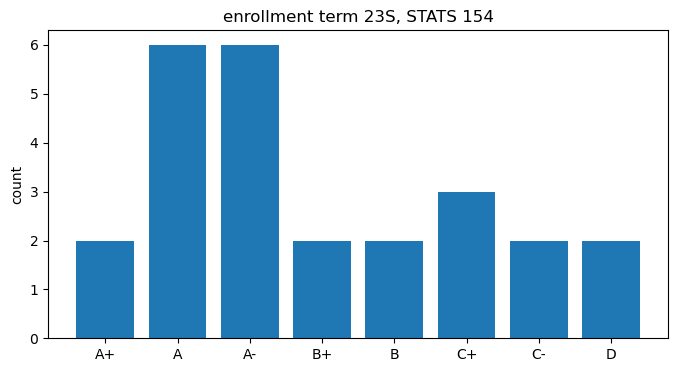

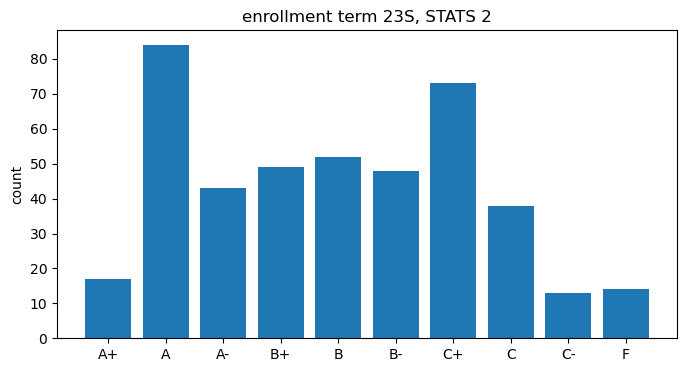

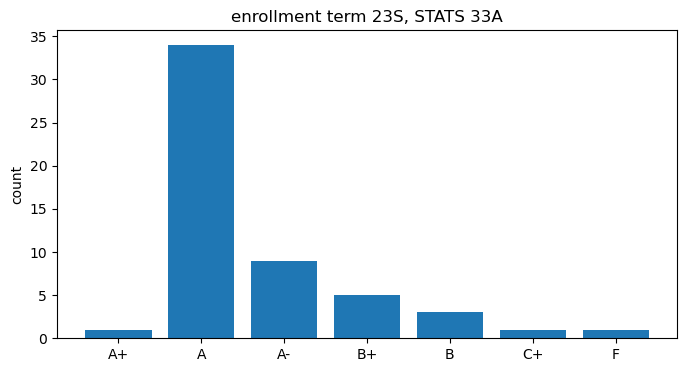

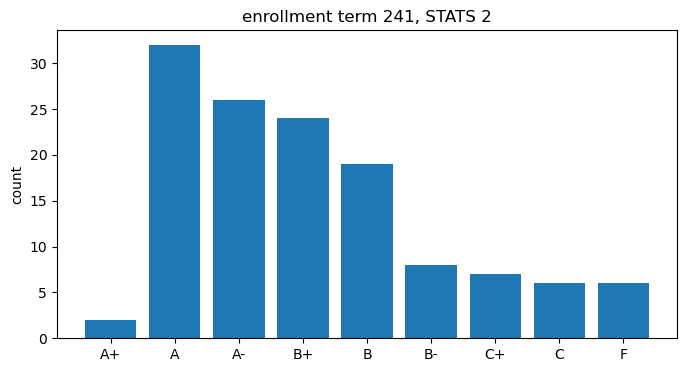

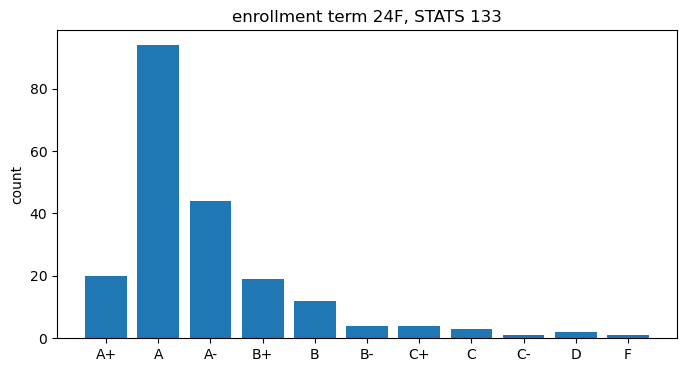

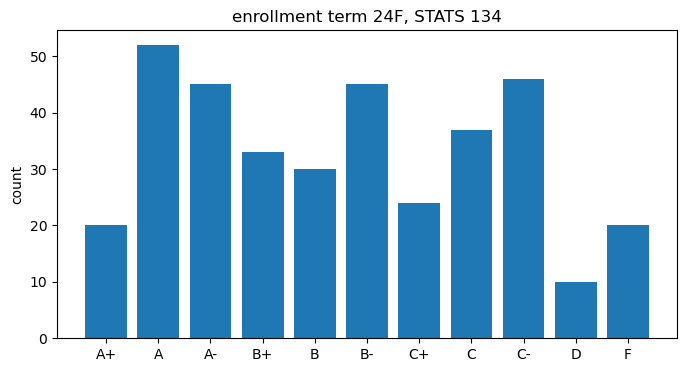

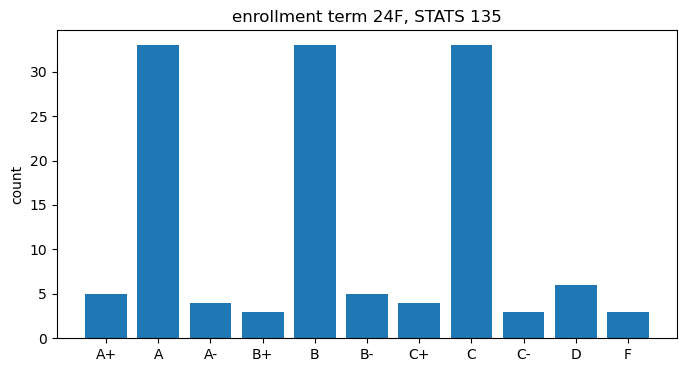

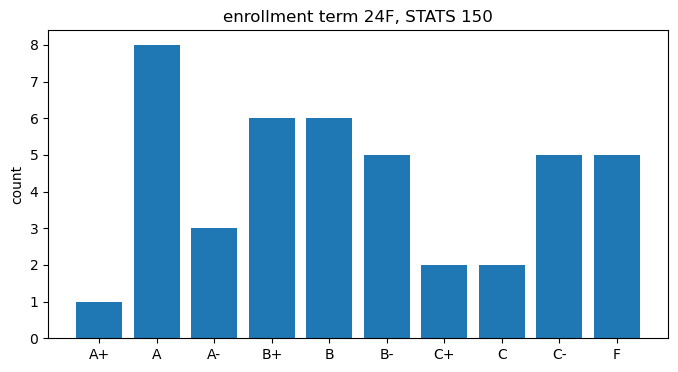

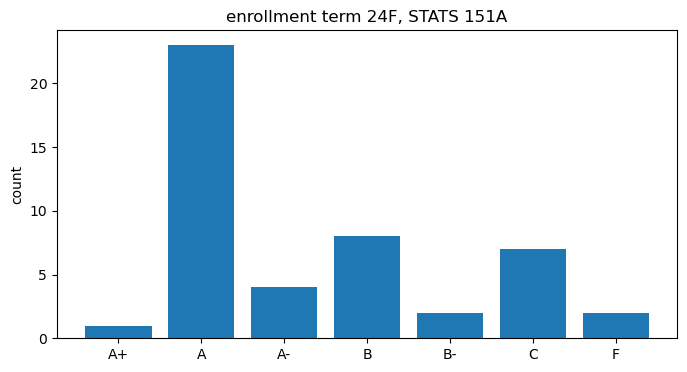

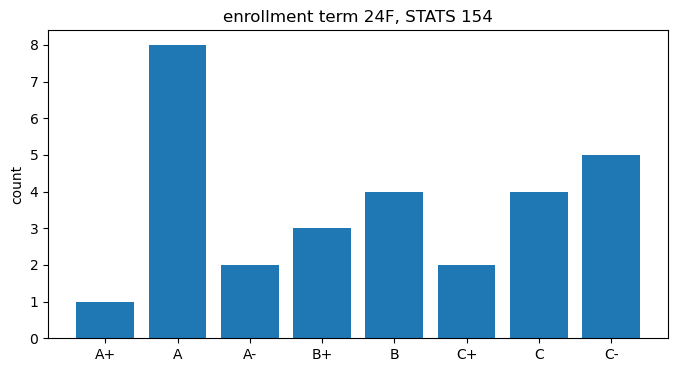

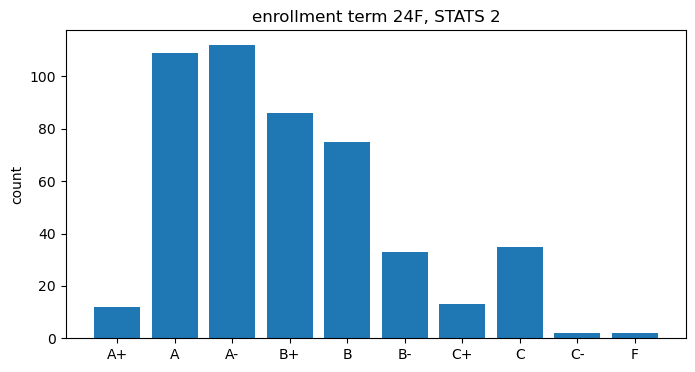

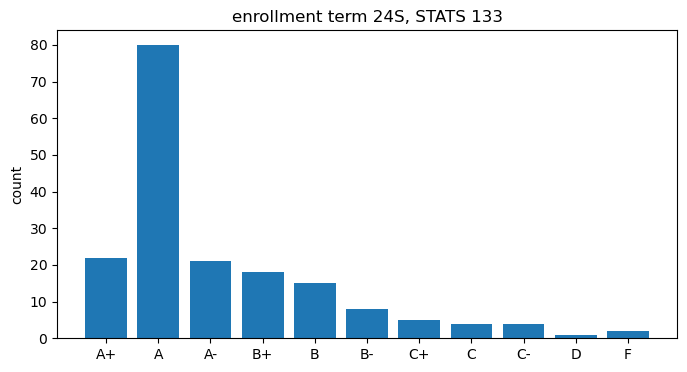

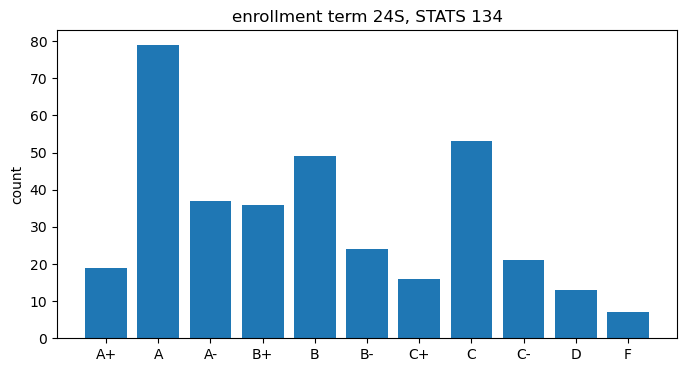

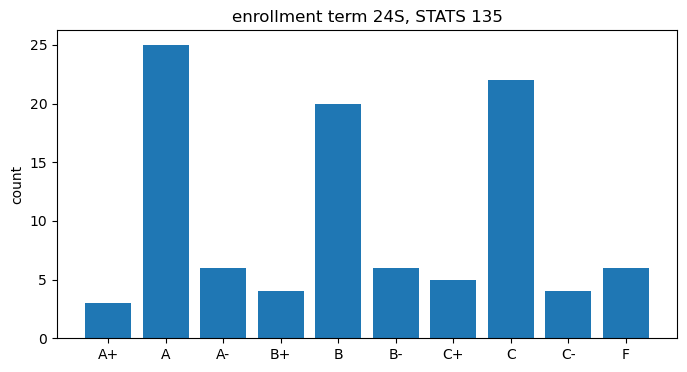

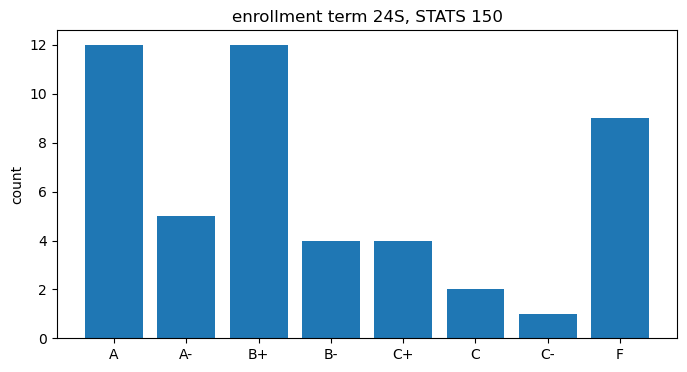

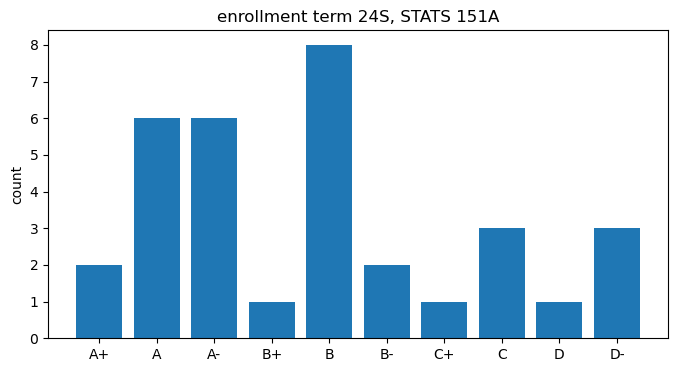

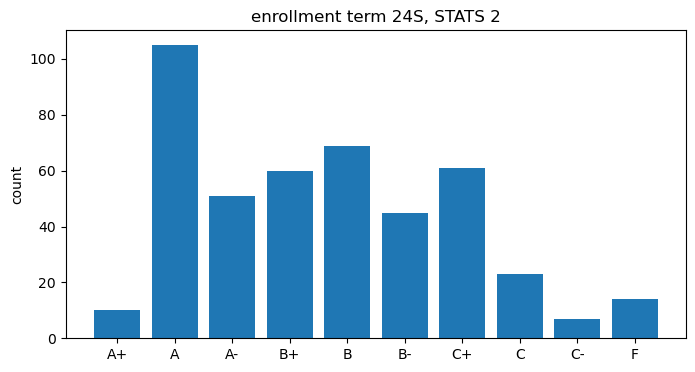

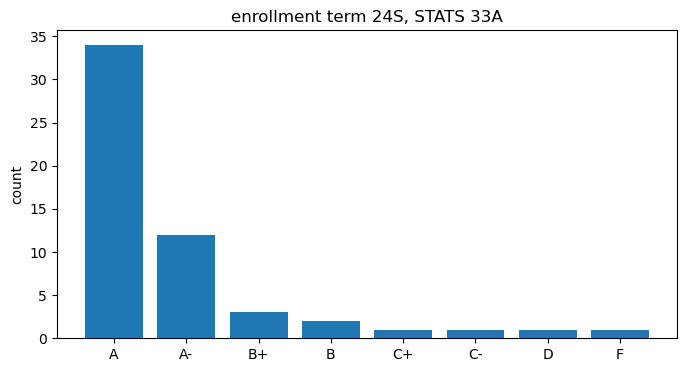

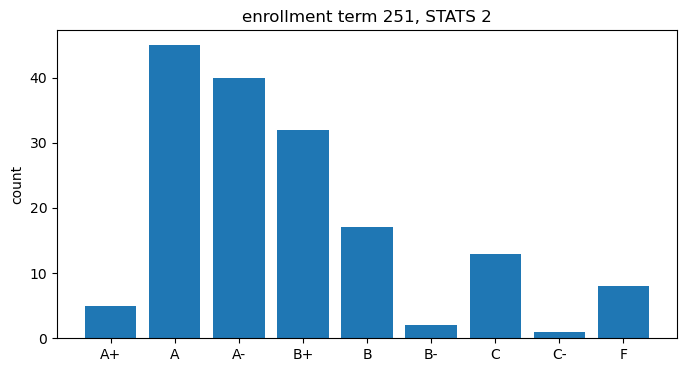

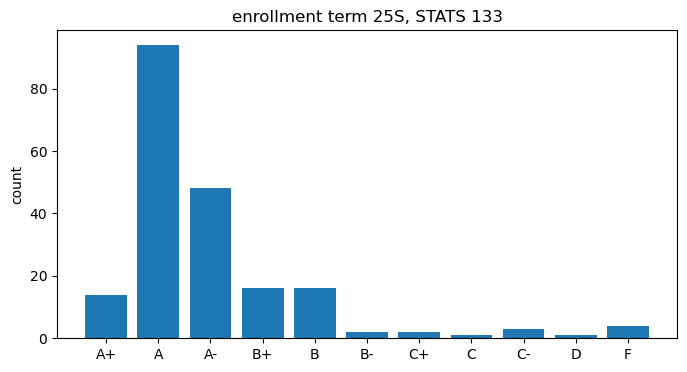

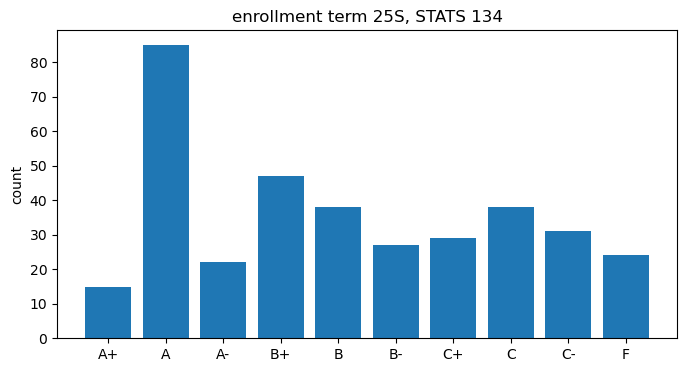

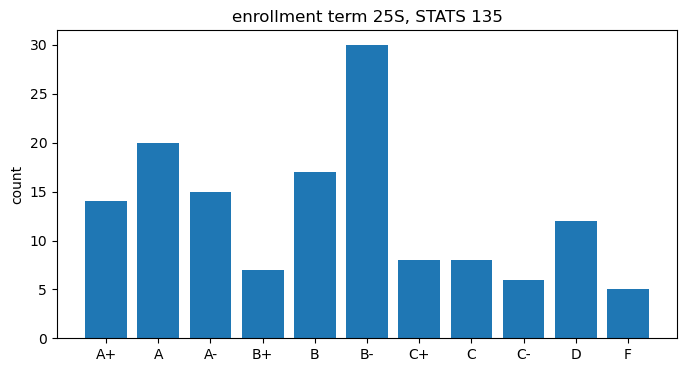

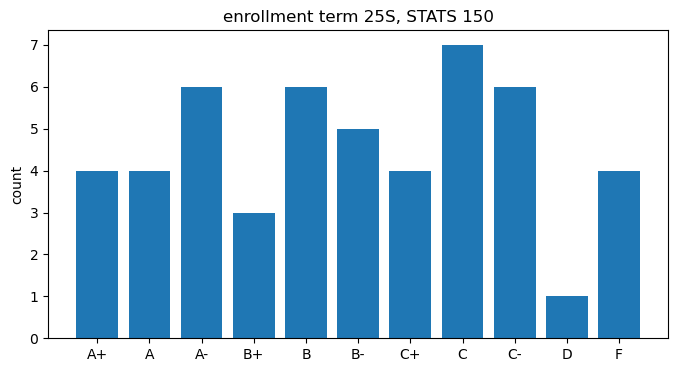

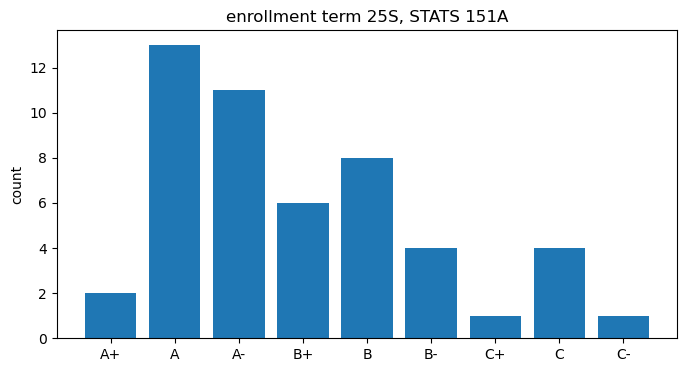

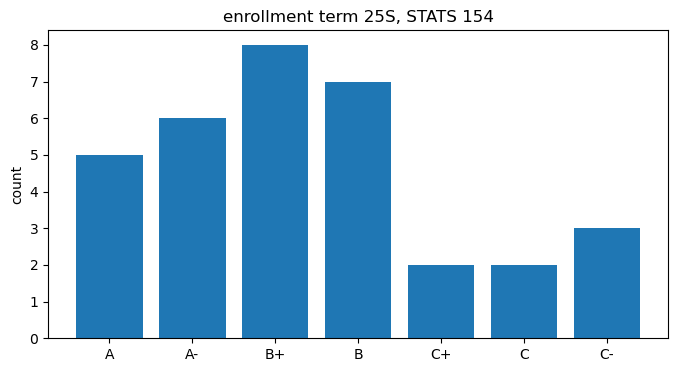

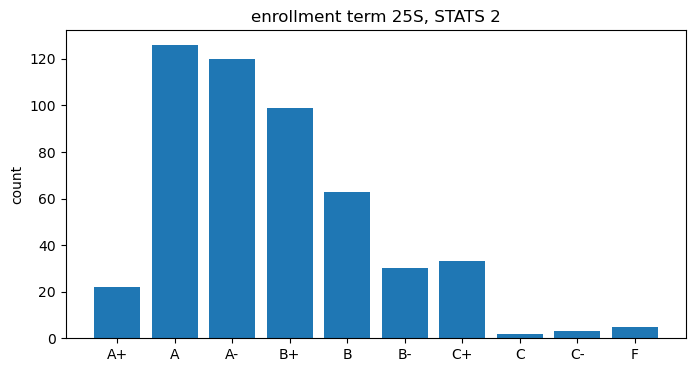

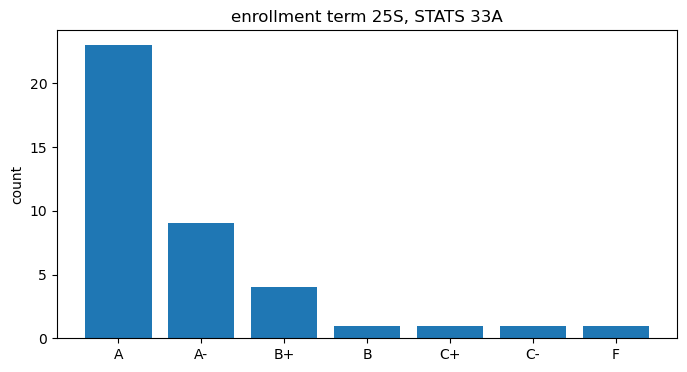

In [26]:
berkeley_grades.head()

# classes are differentiated through their enrollment term and course number
for (term, course), group in berkeley_grades.groupby(['ENROLLMENT TERM', 'CATLG NBR']):
    plt.figure(figsize=(8, 4))

    plt.bar(group['GRD OFF'], group['GRD COUNT'])
    plt.title(f"enrollment term {term}, STATS {course}")
    plt.ylabel('count')
    plt.show()


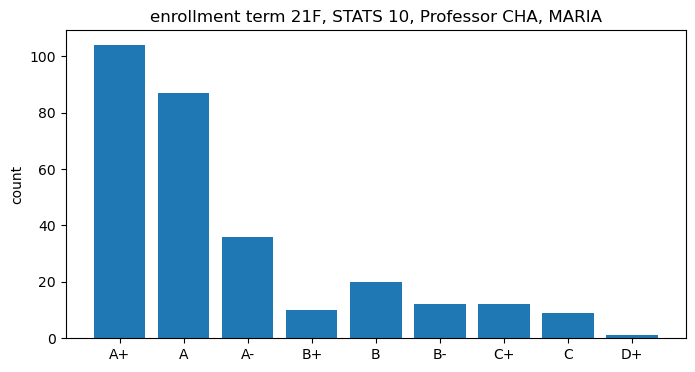

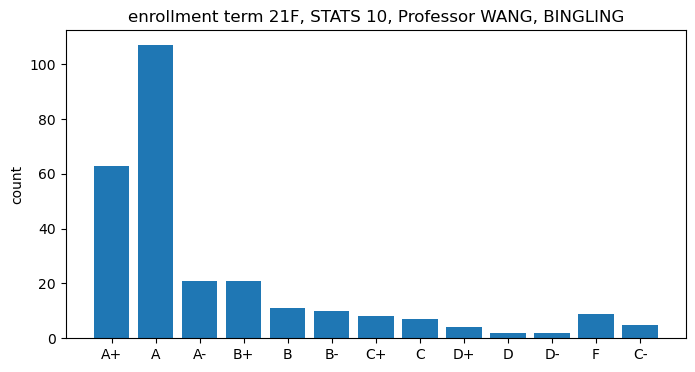

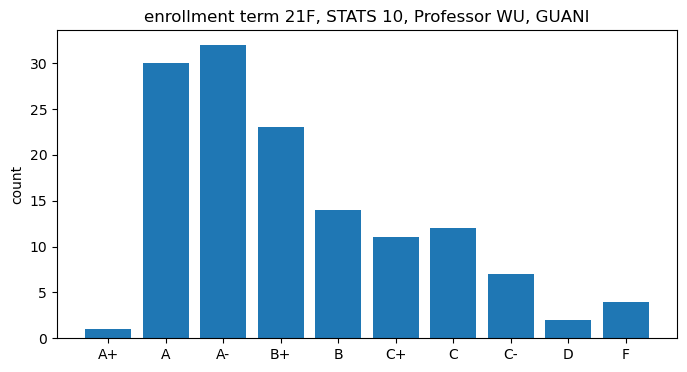

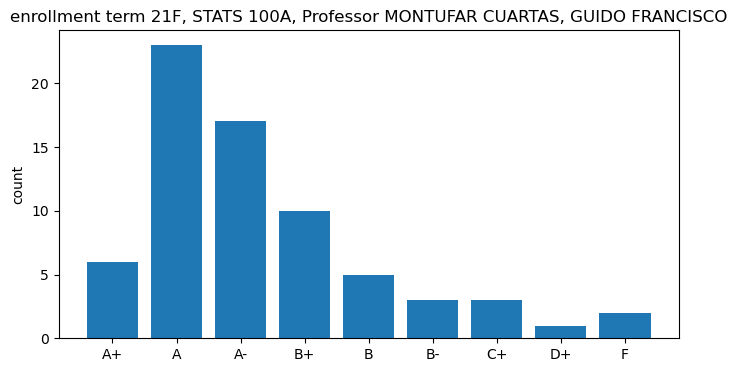

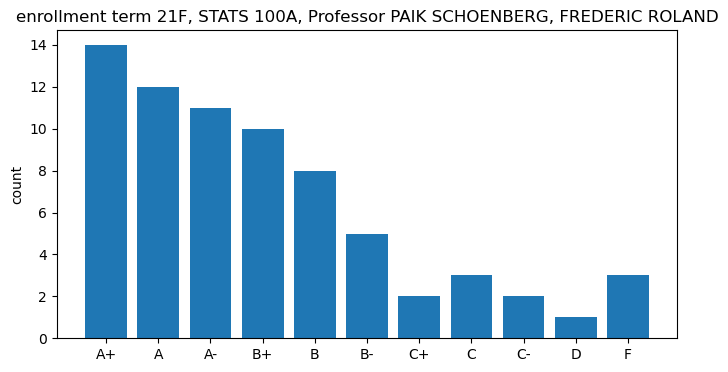

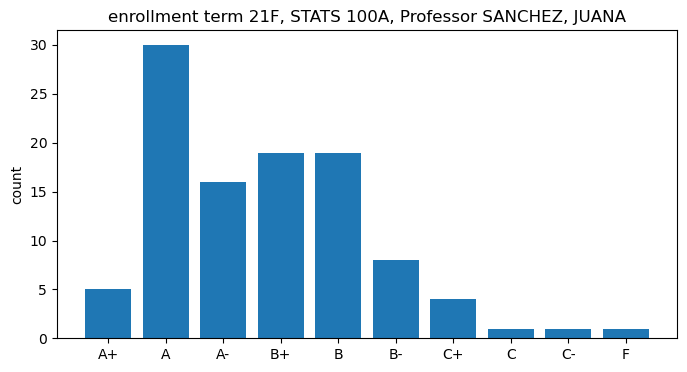

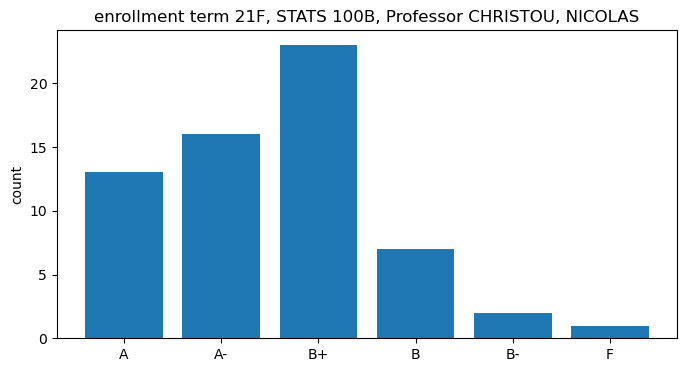

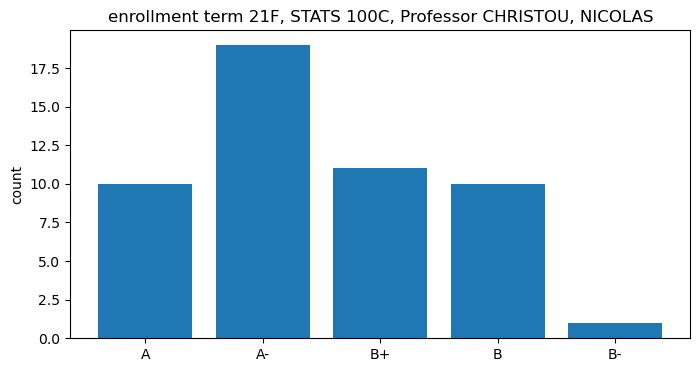

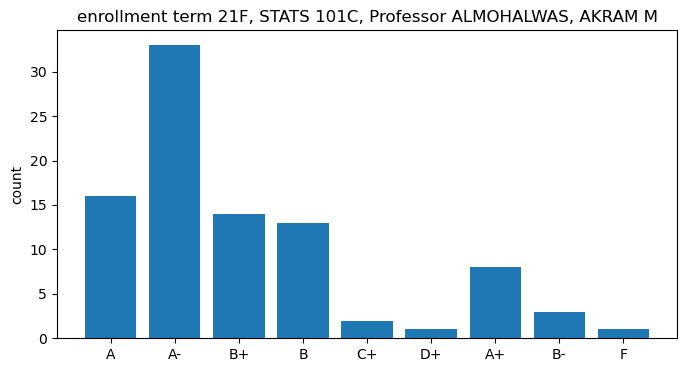

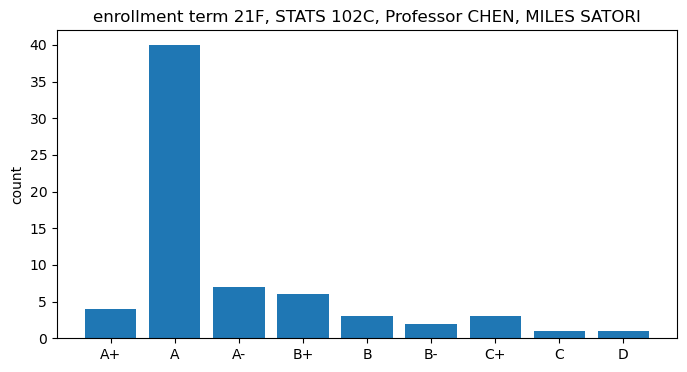

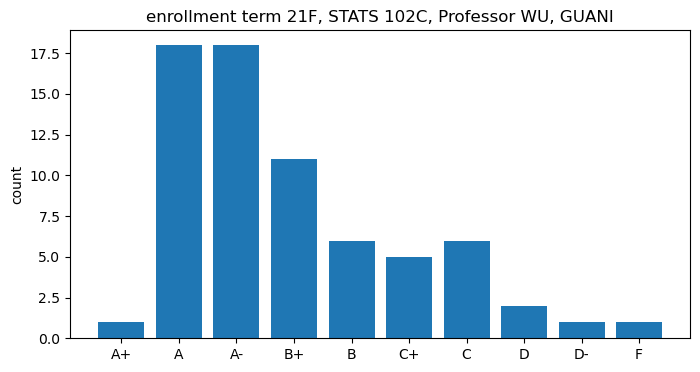

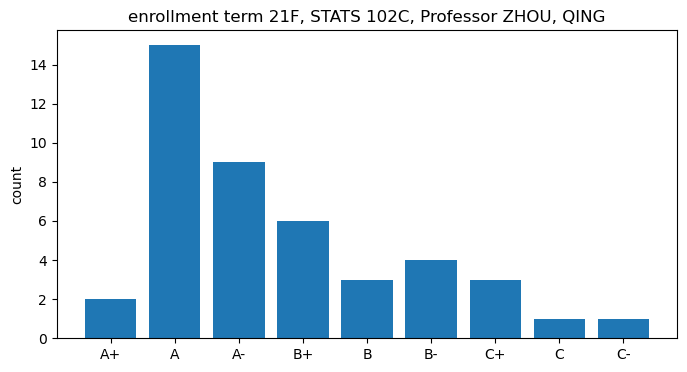

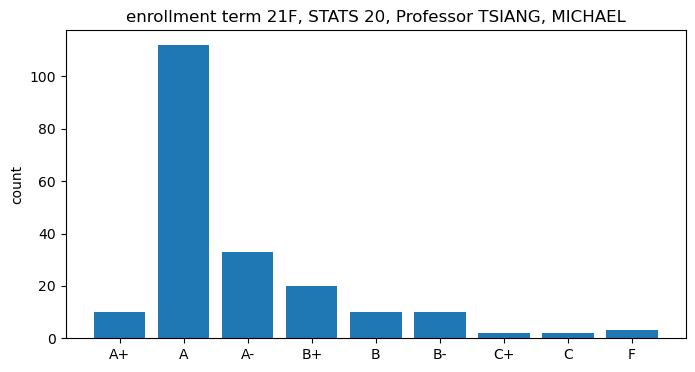

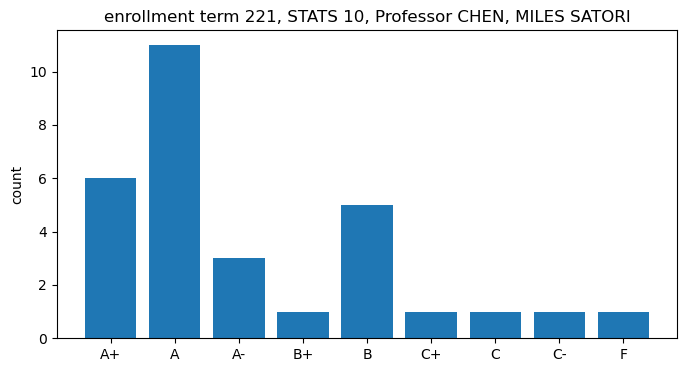

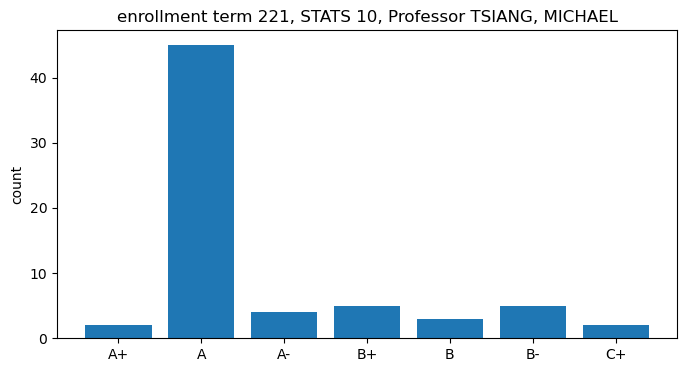

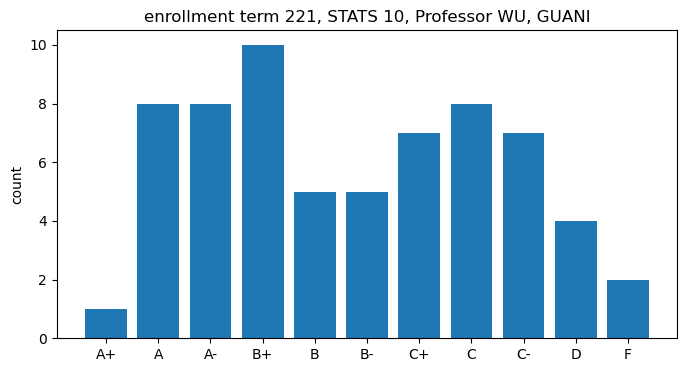

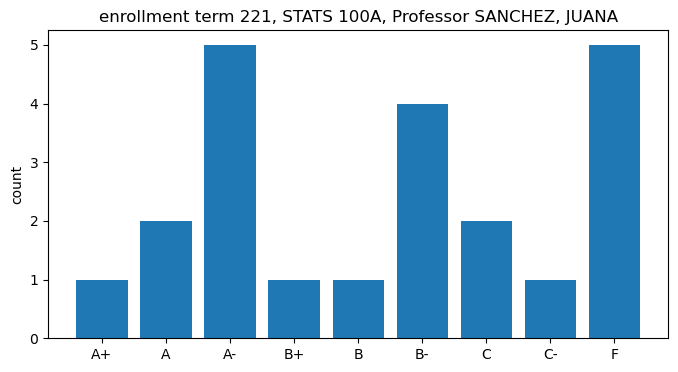

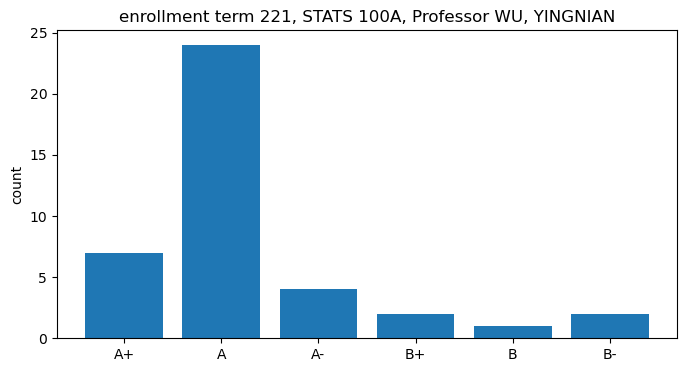

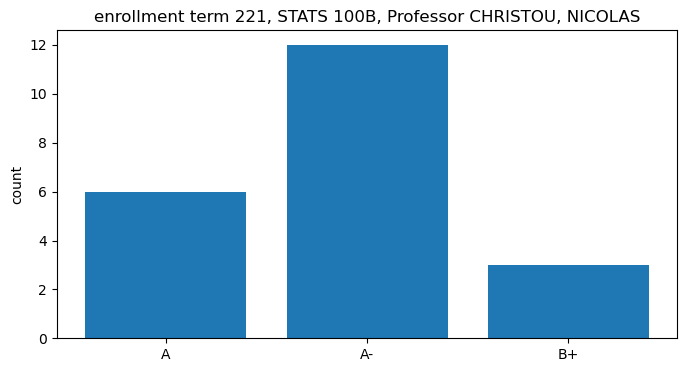

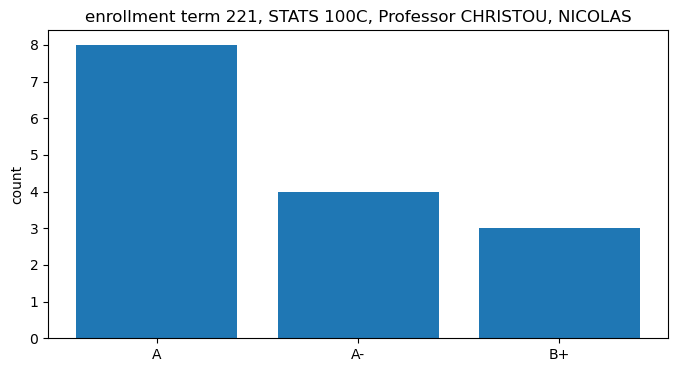

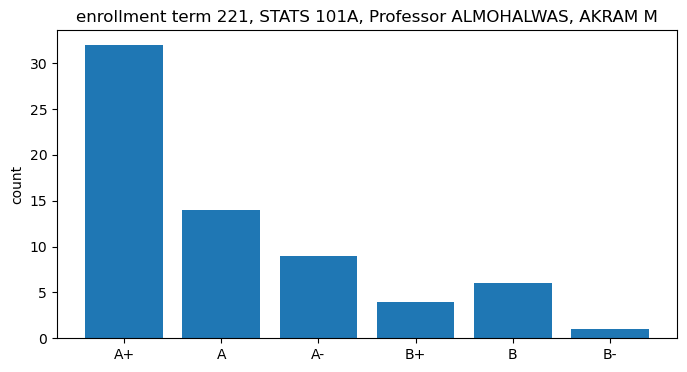

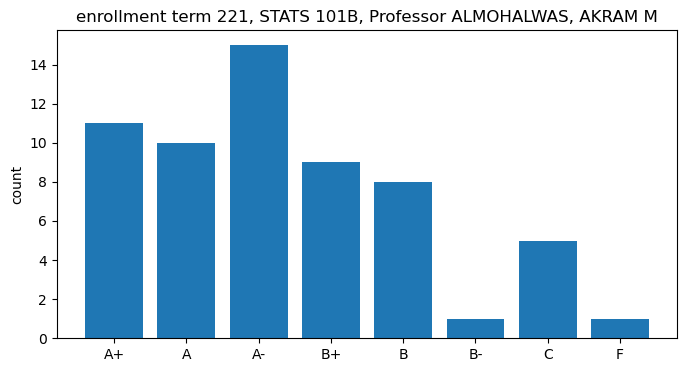

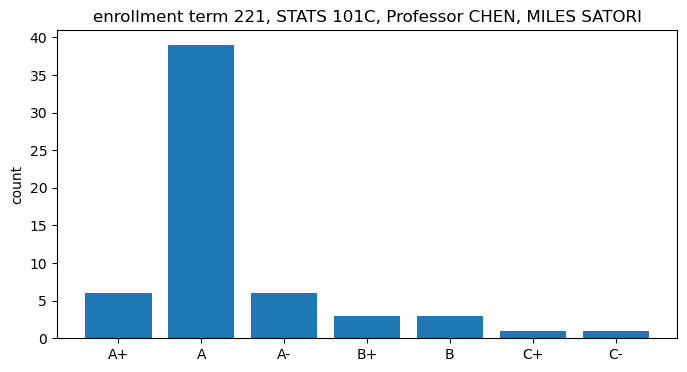

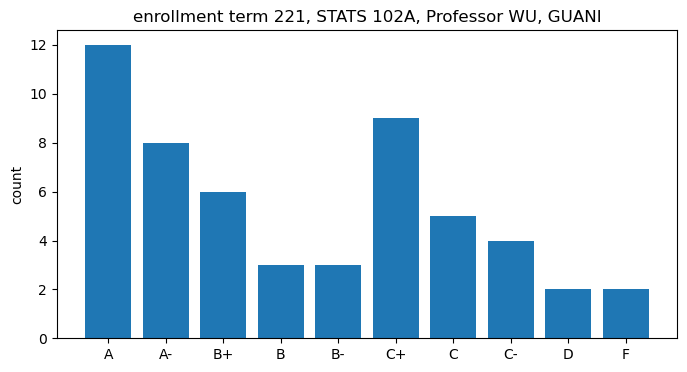

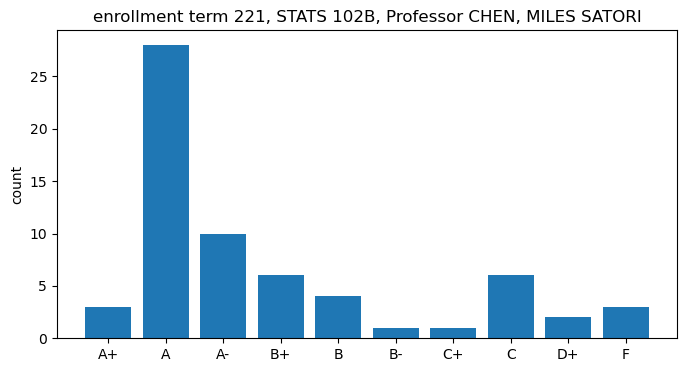

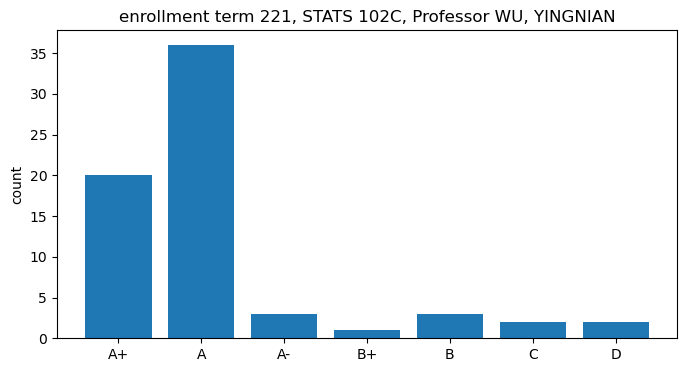

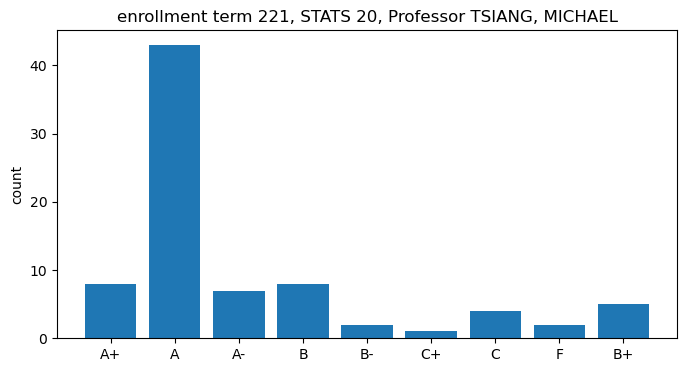

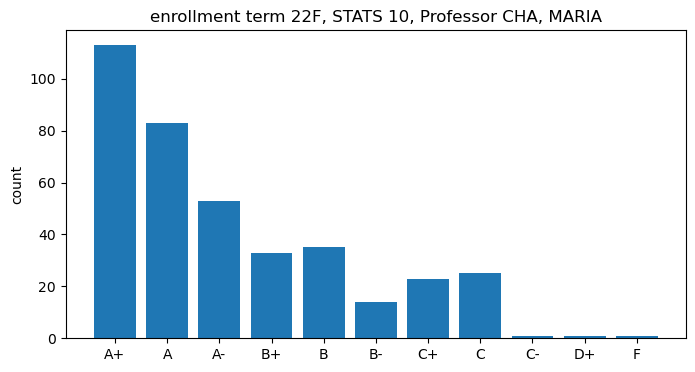

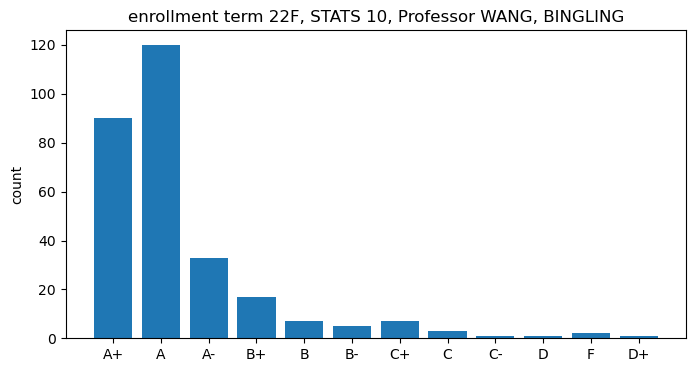

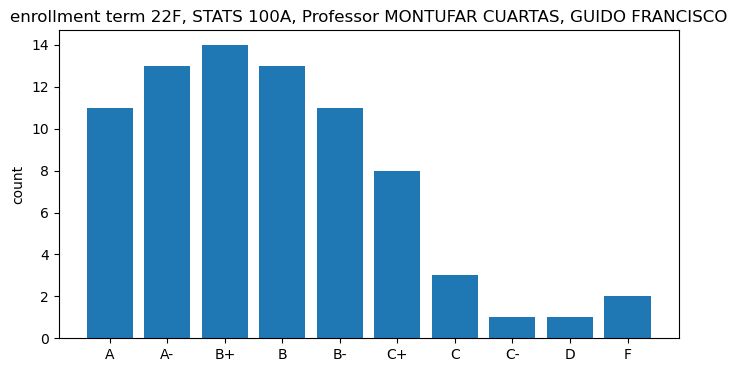

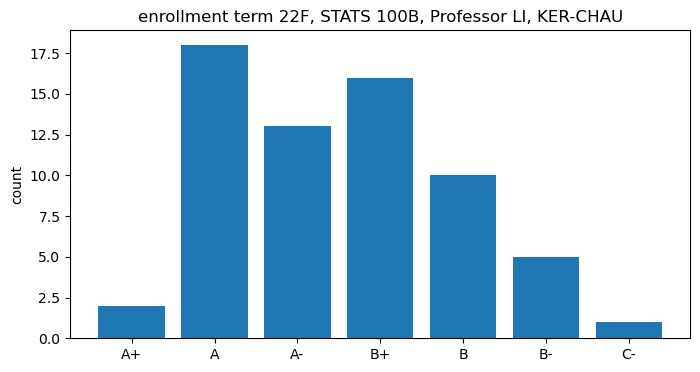

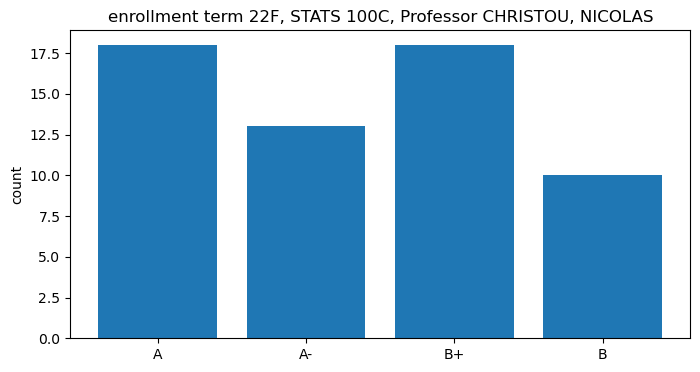

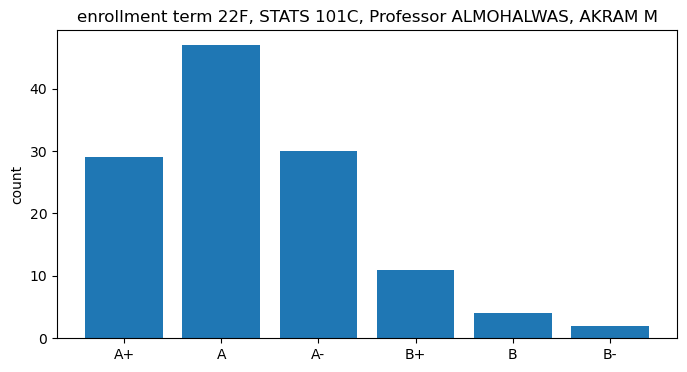

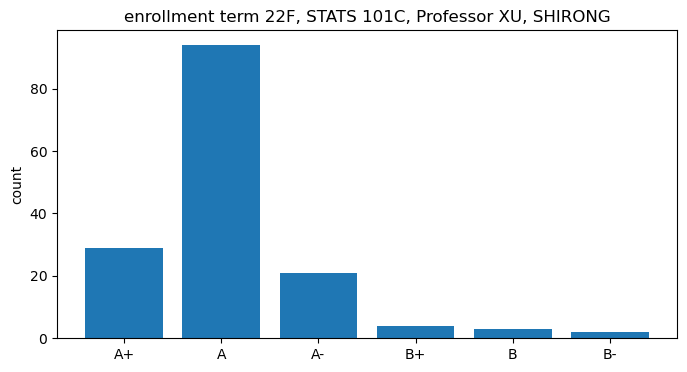

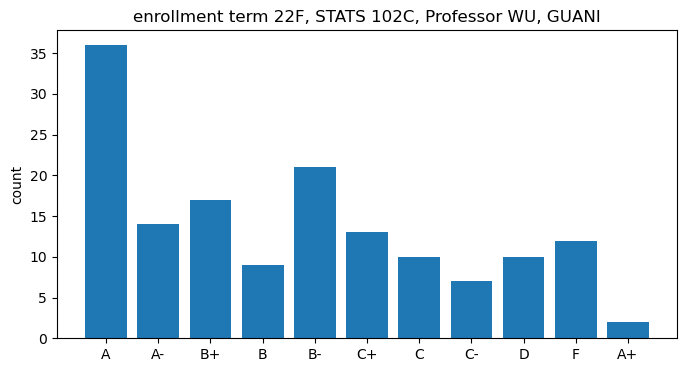

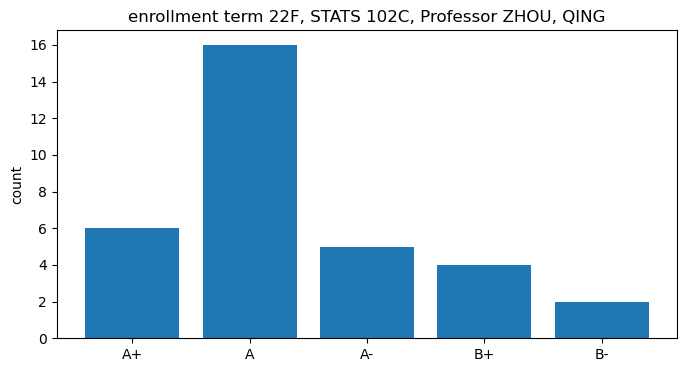

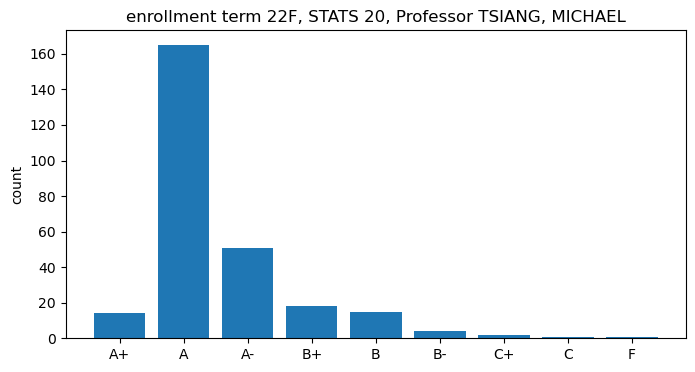

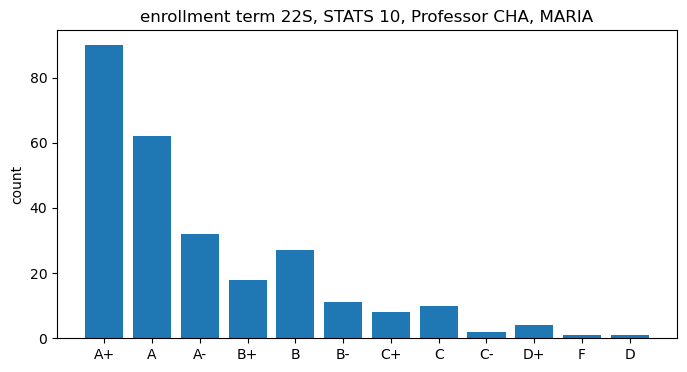

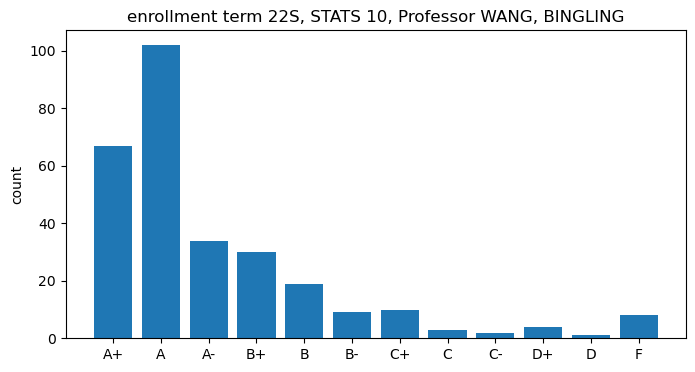

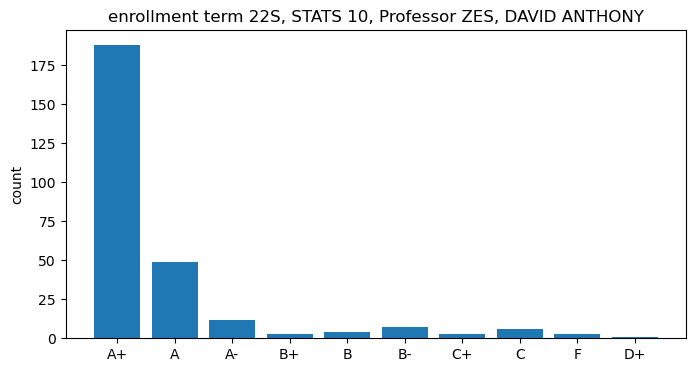

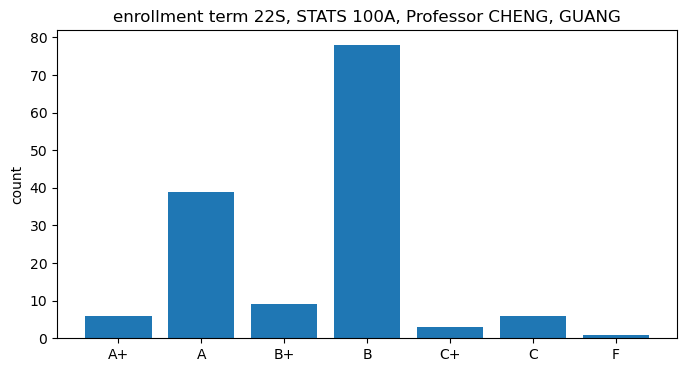

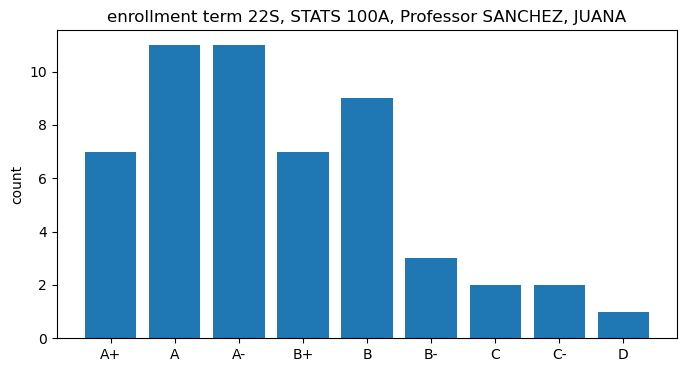

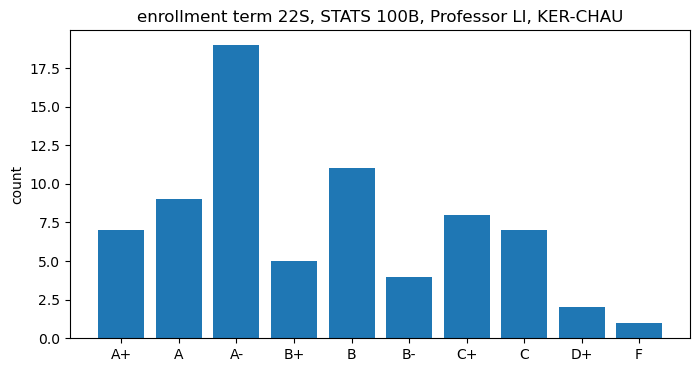

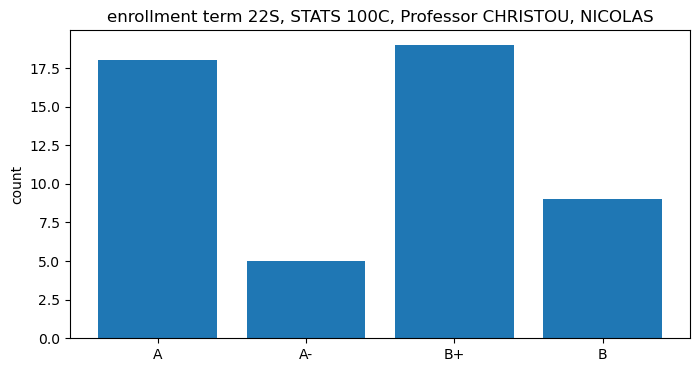

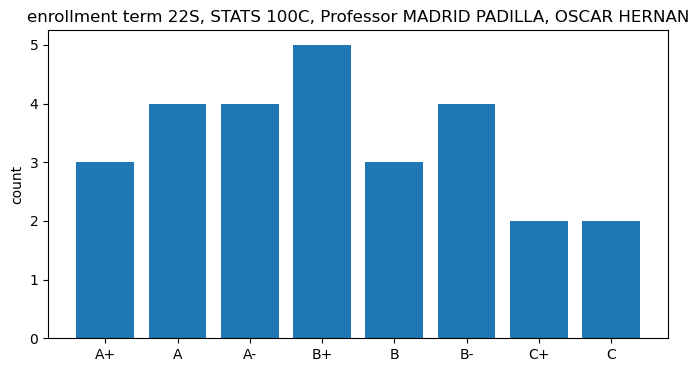

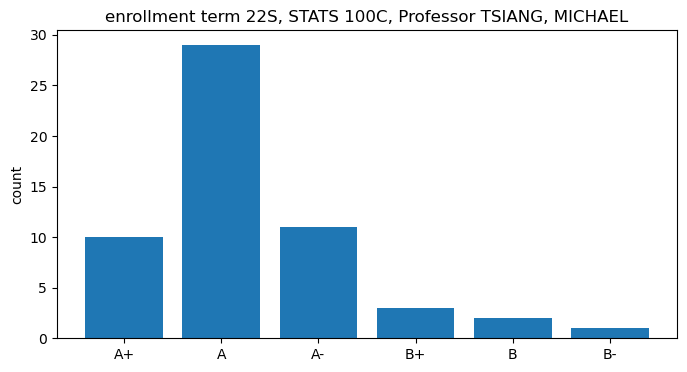

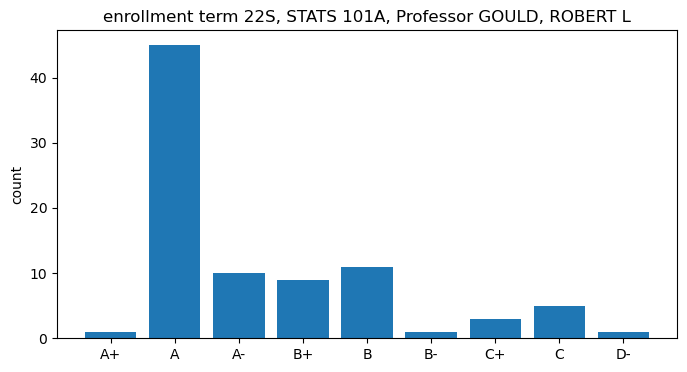

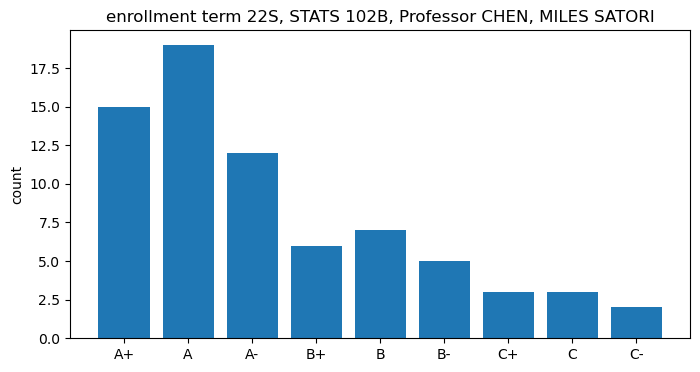

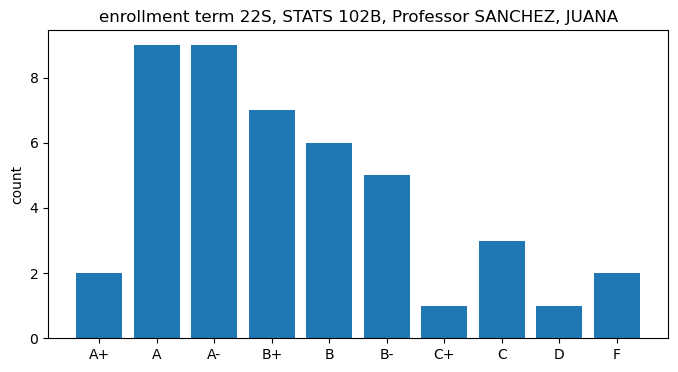

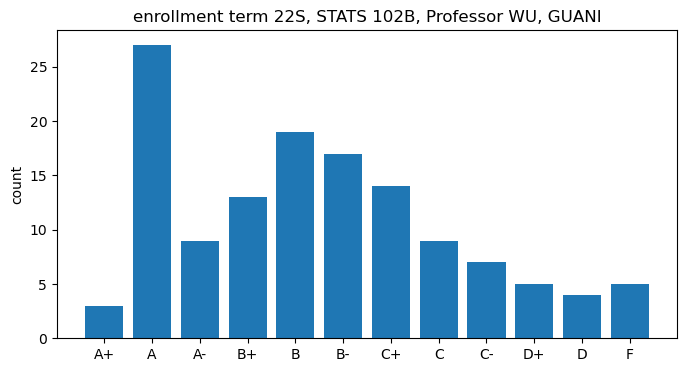

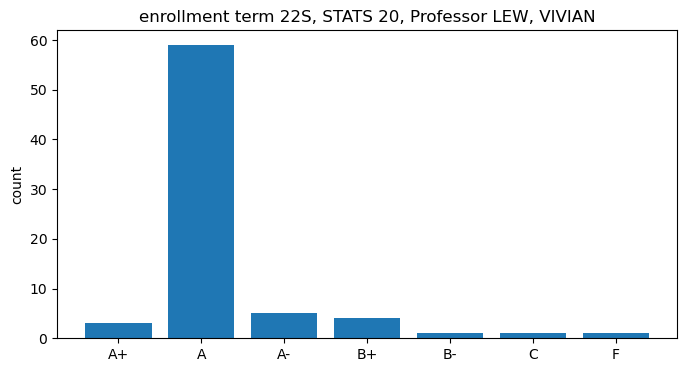

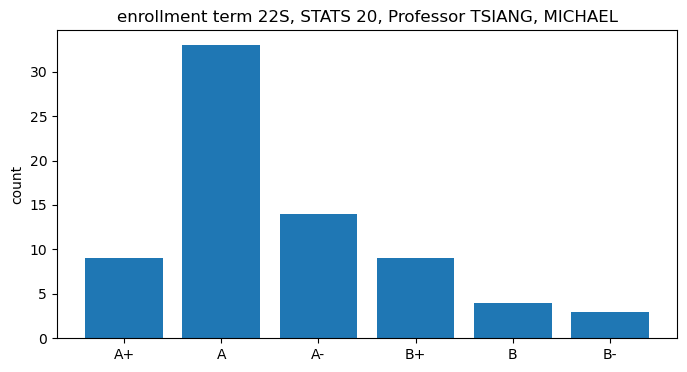

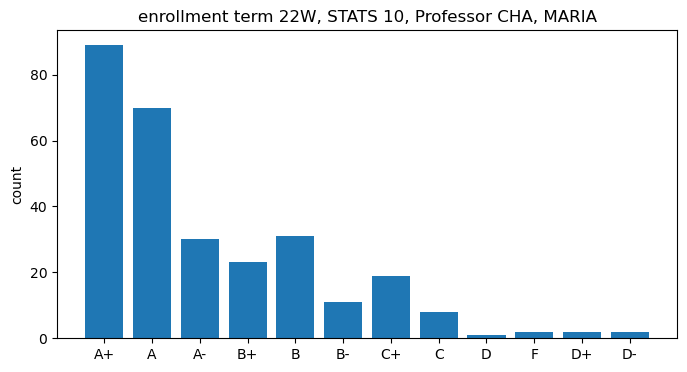

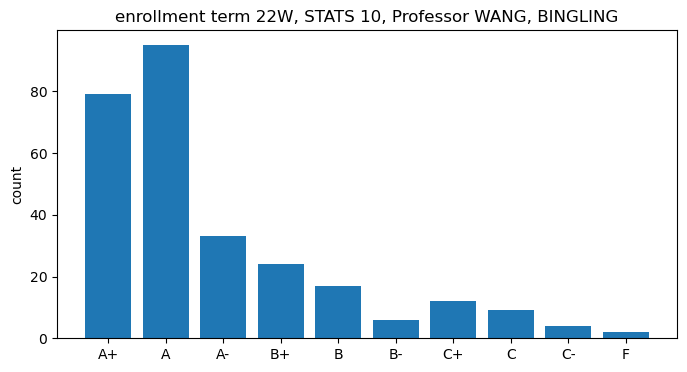

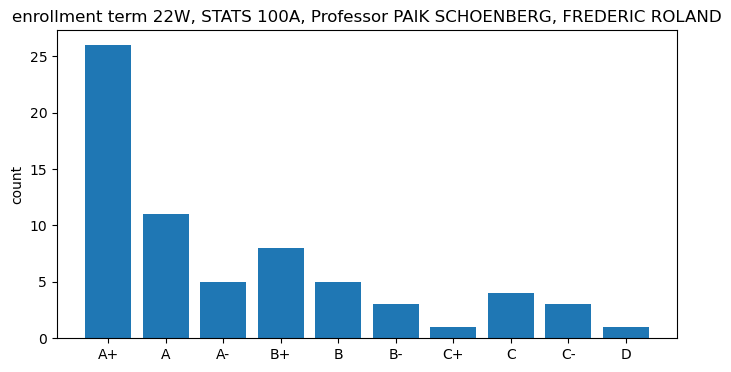

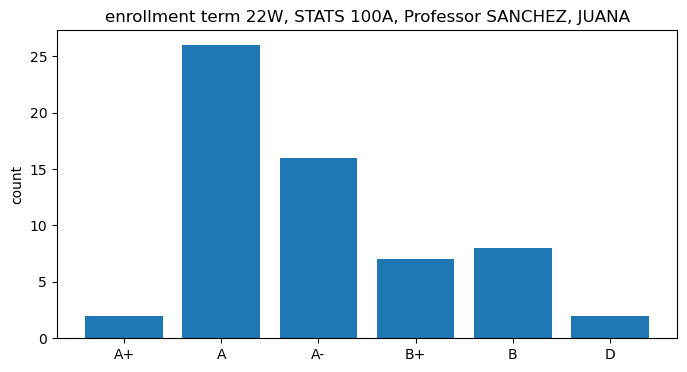

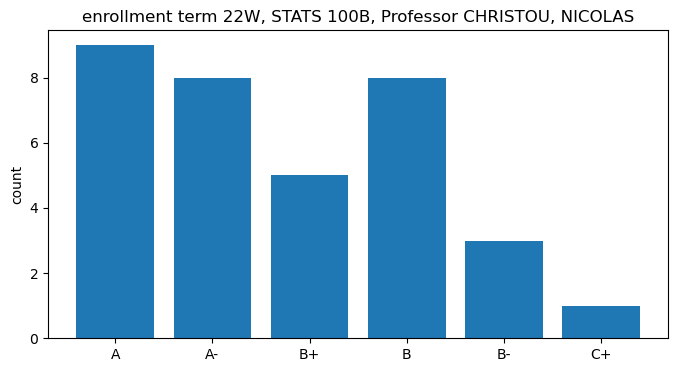

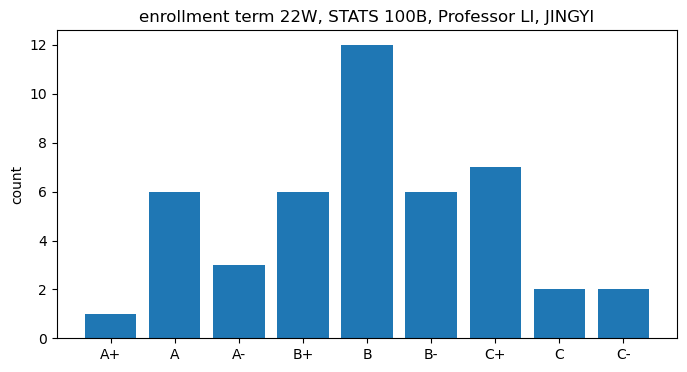

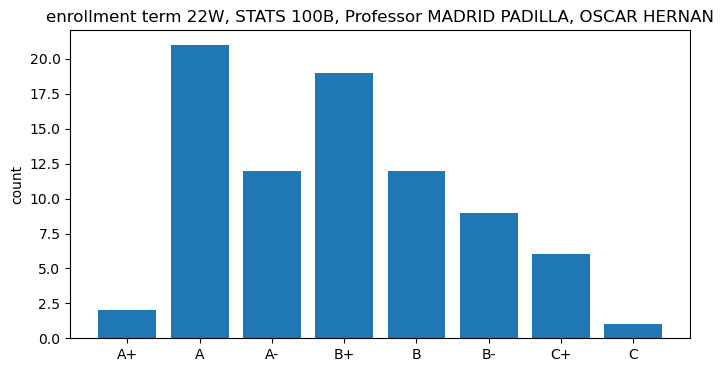

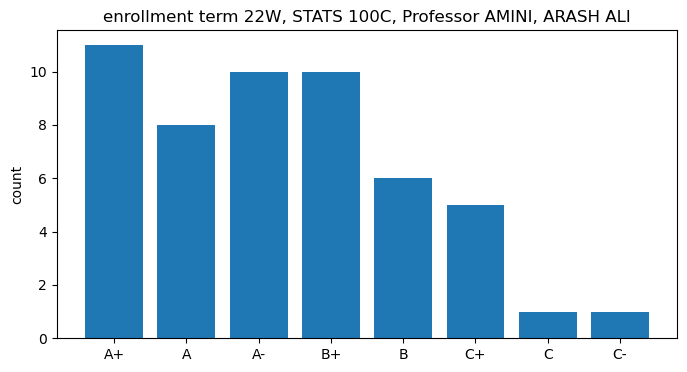

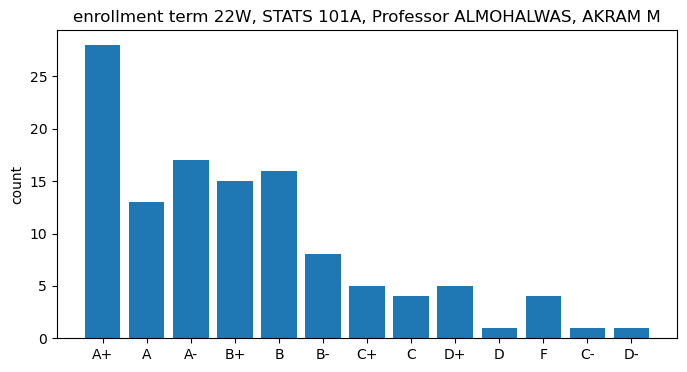

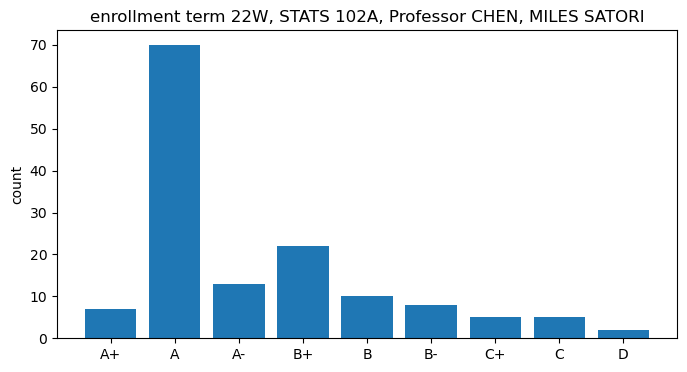

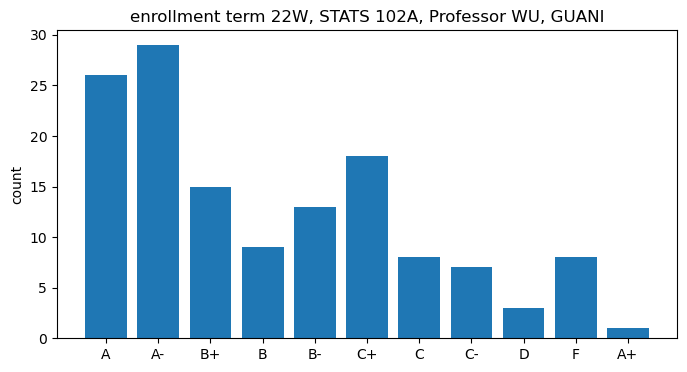

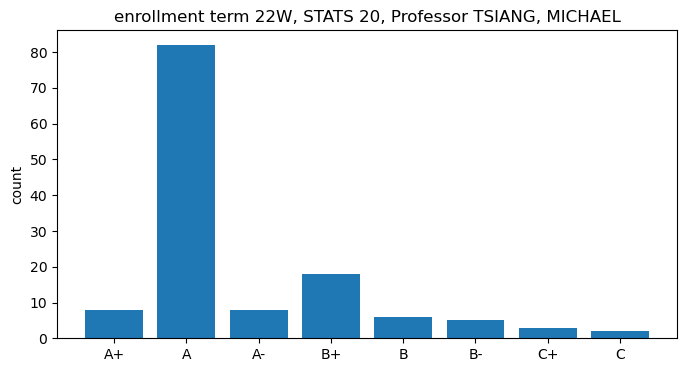

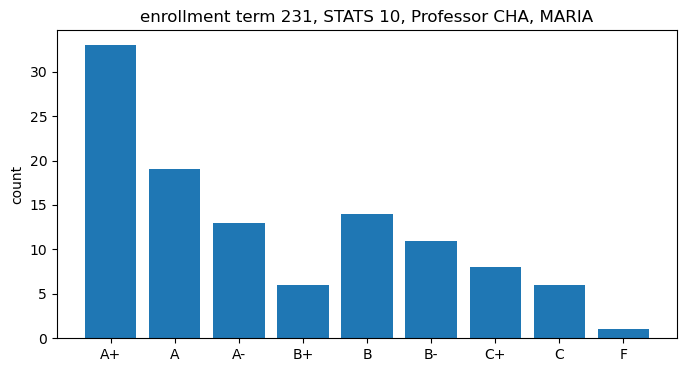

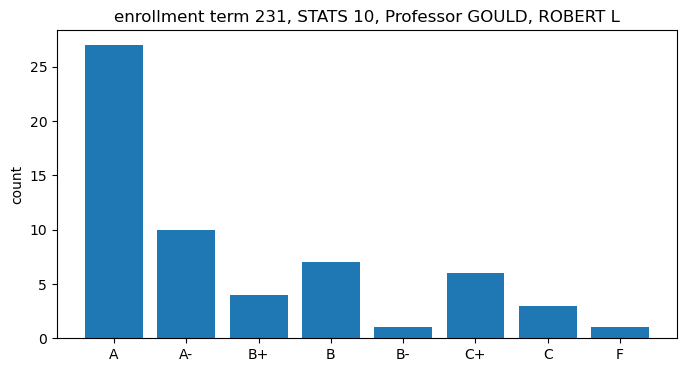

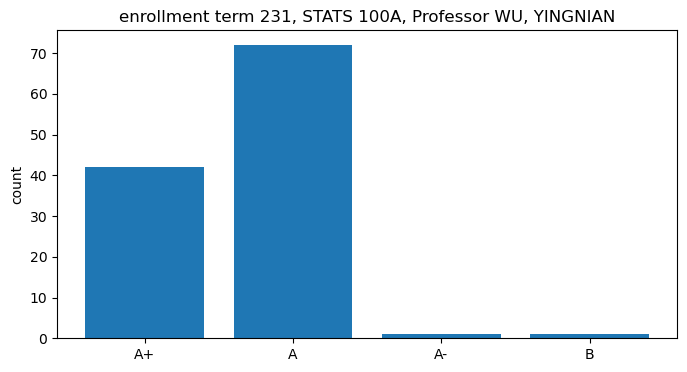

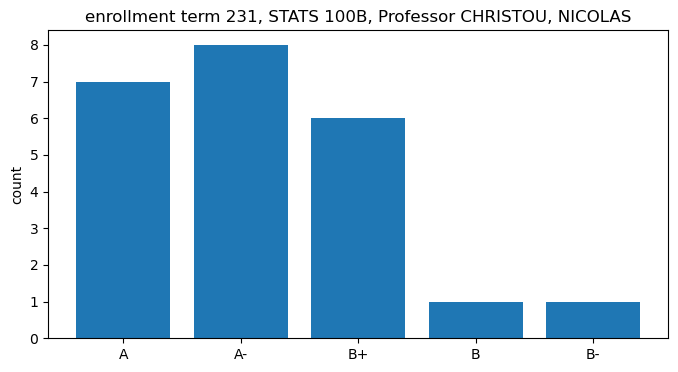

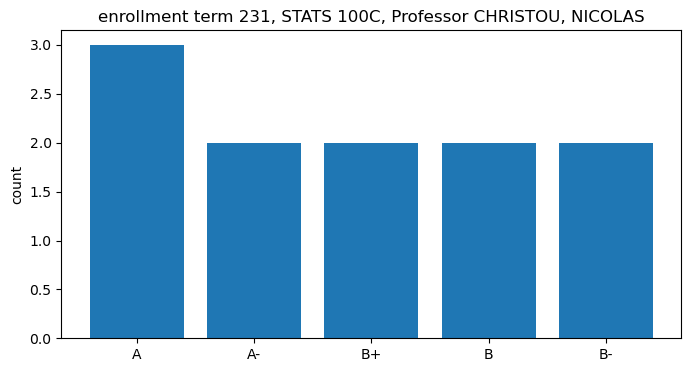

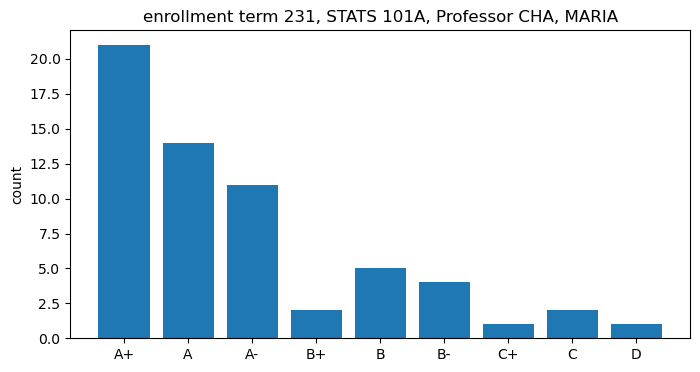

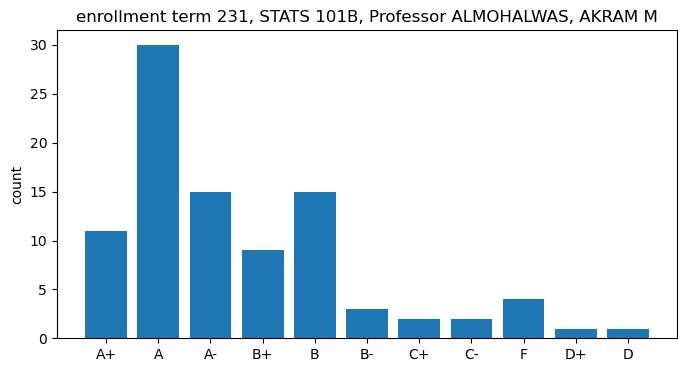

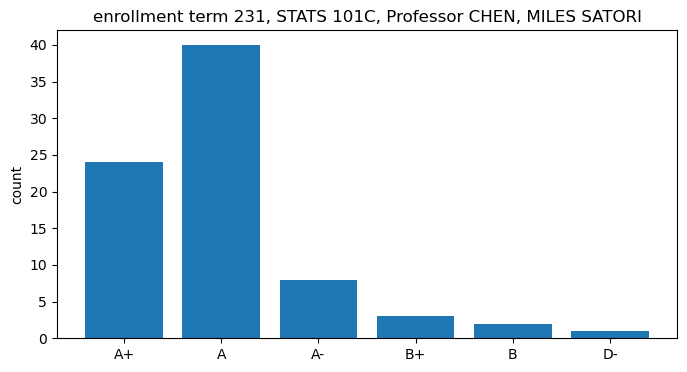

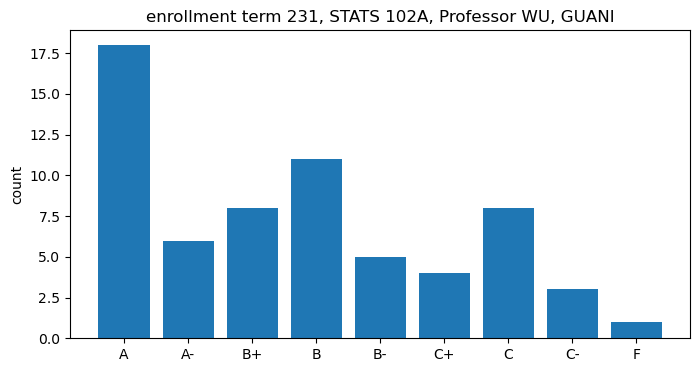

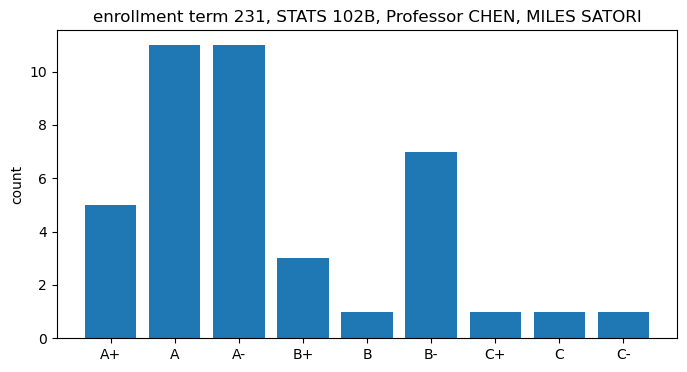

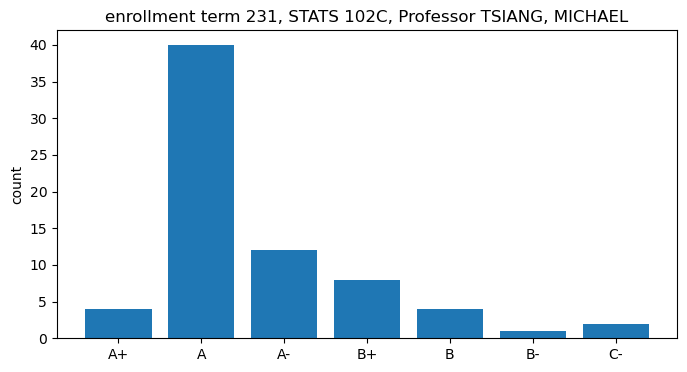

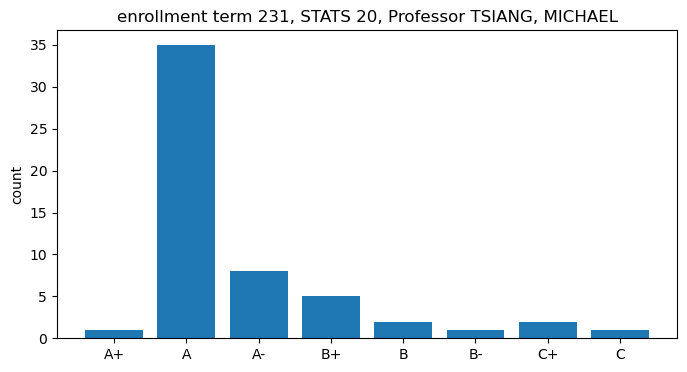

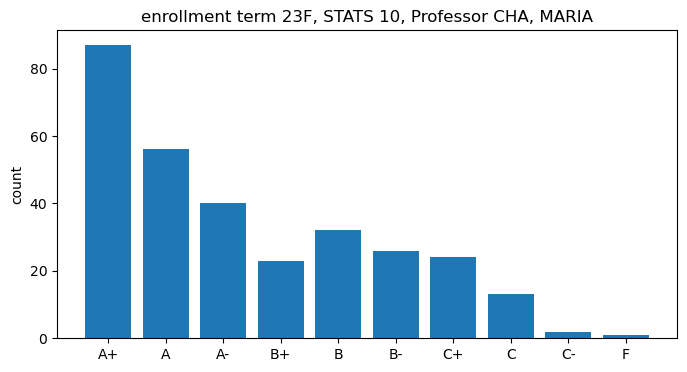

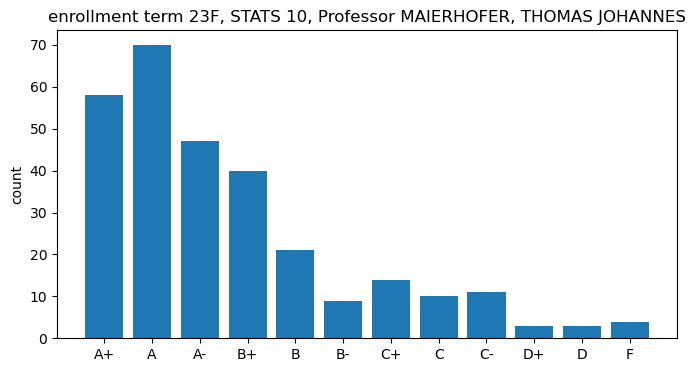

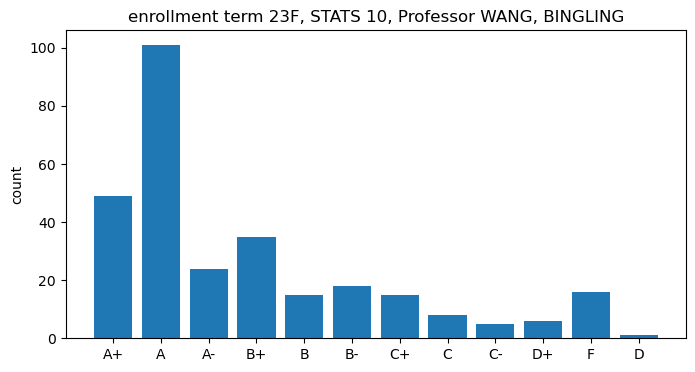

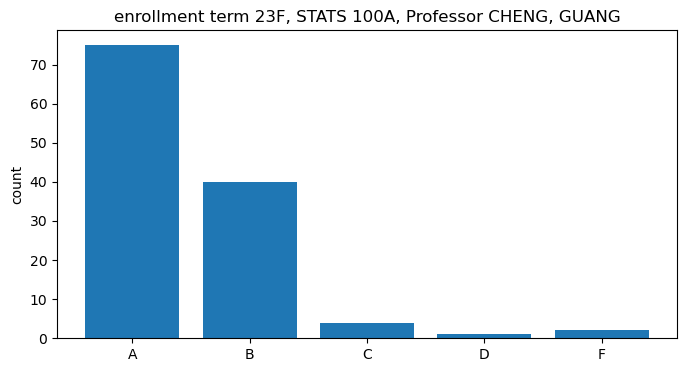

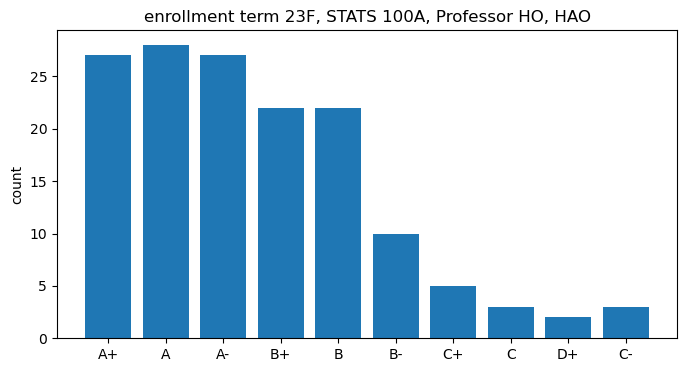

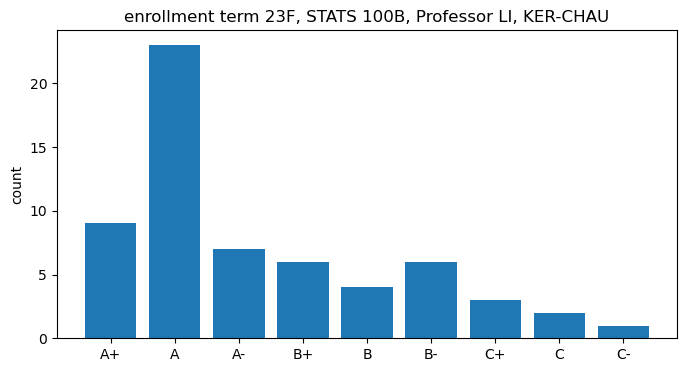

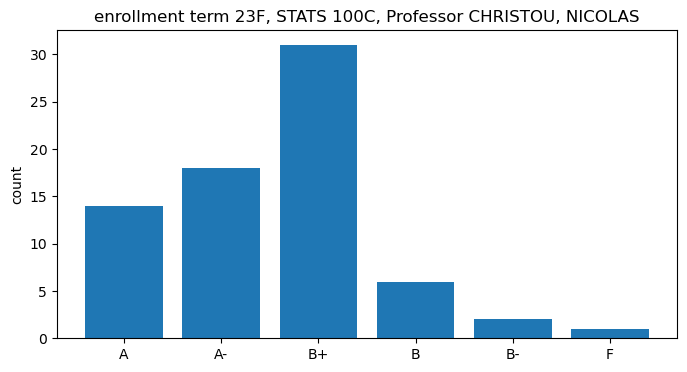

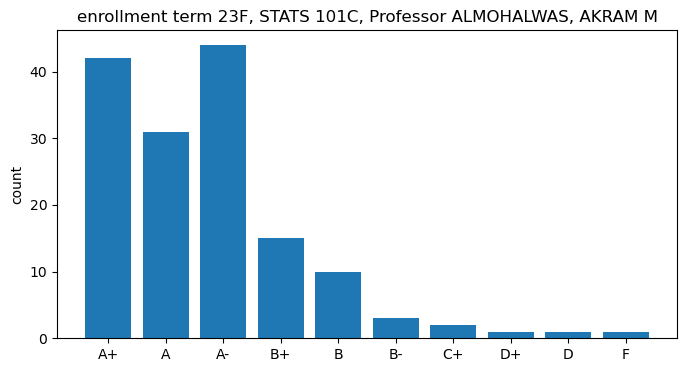

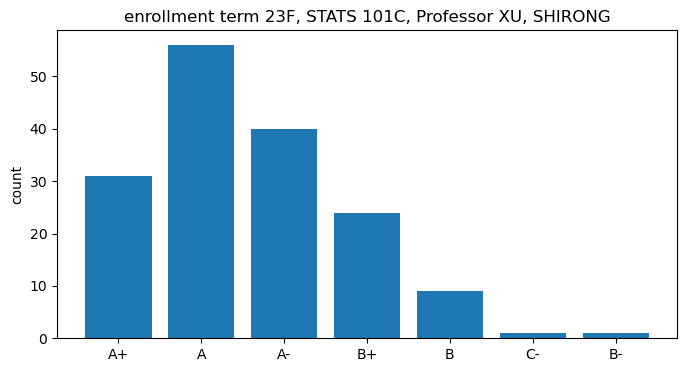

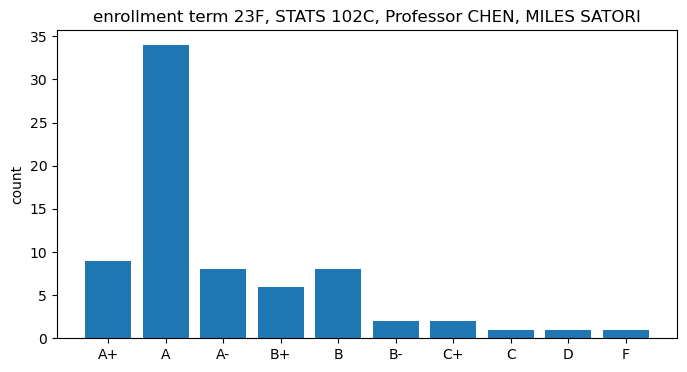

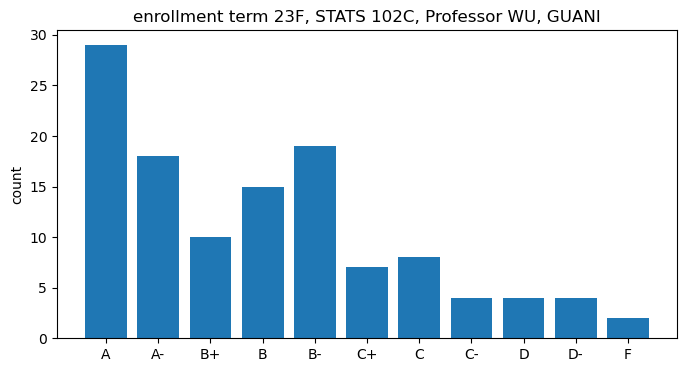

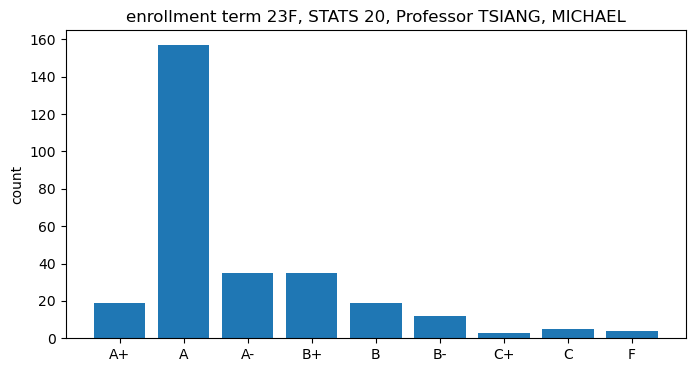

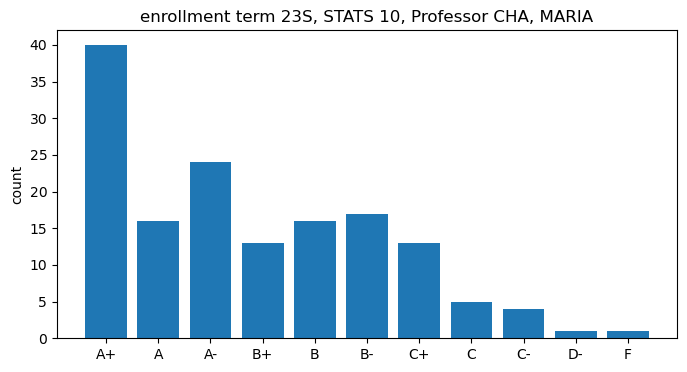

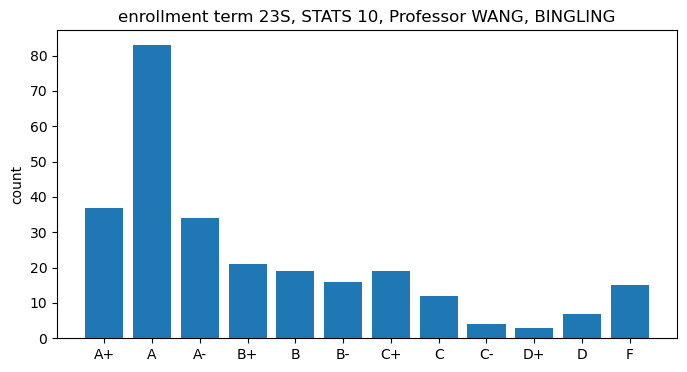

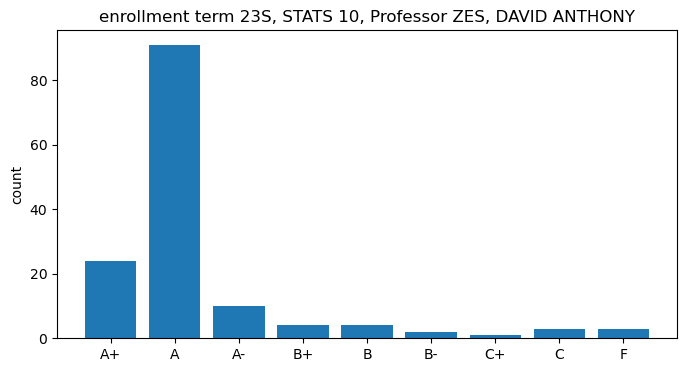

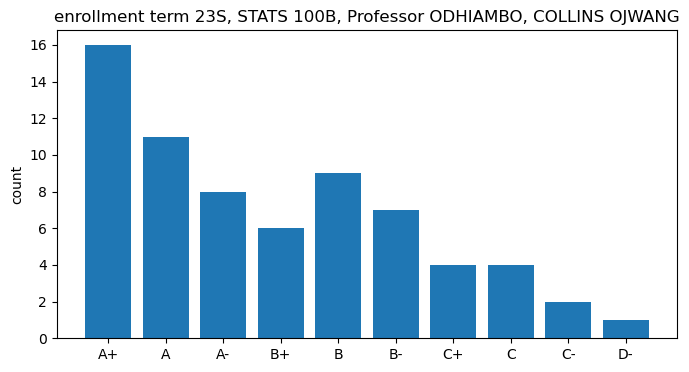

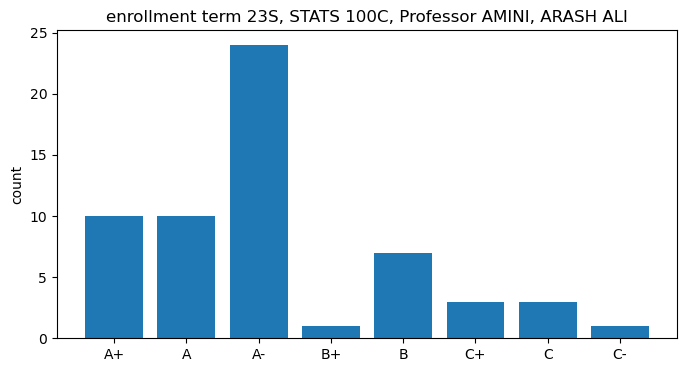

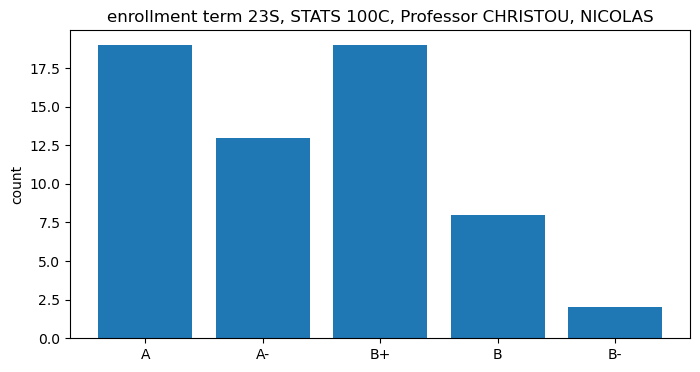

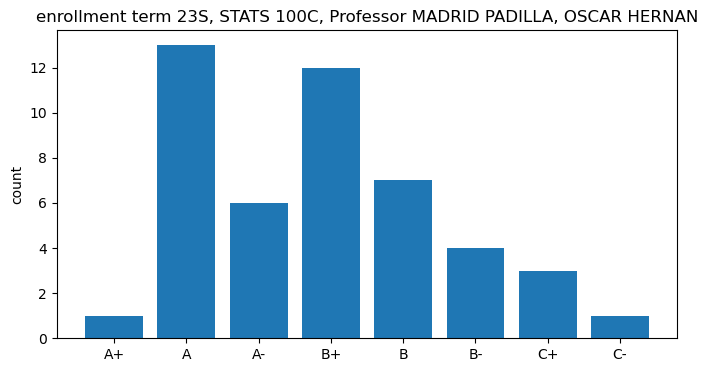

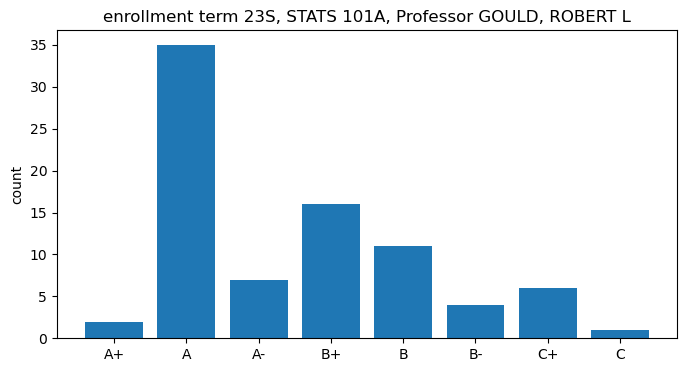

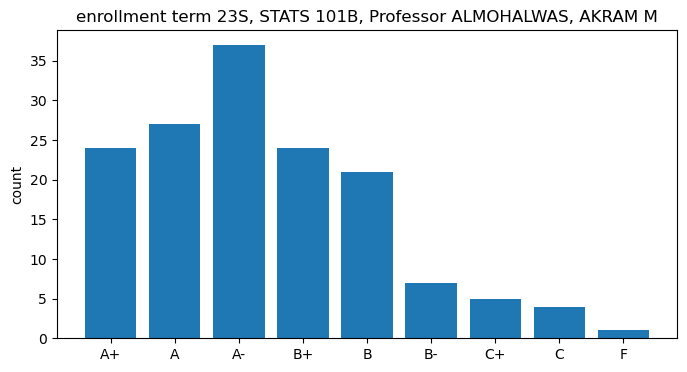

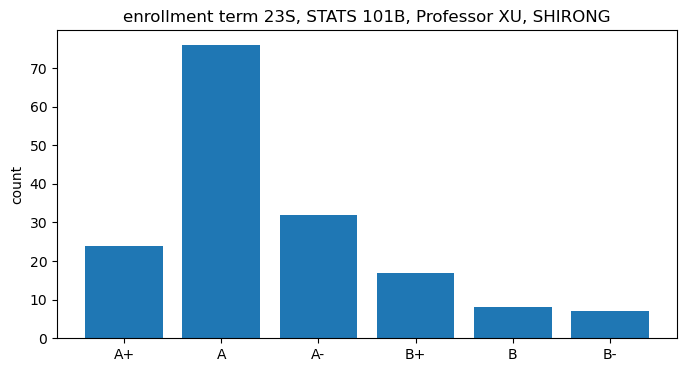

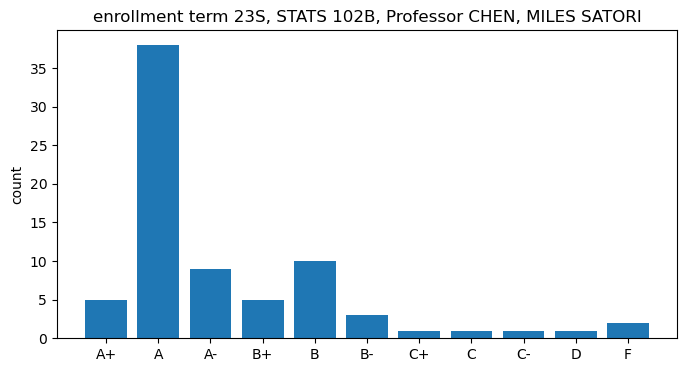

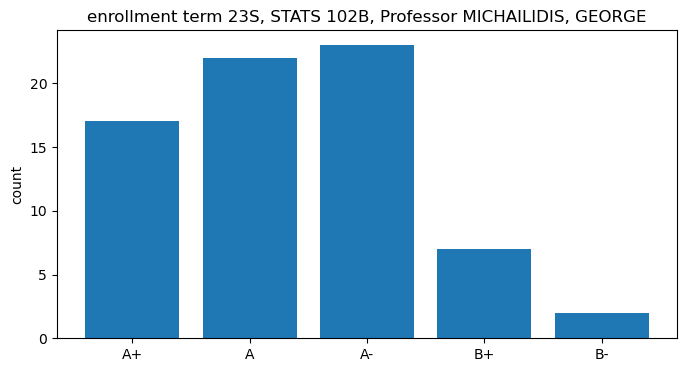

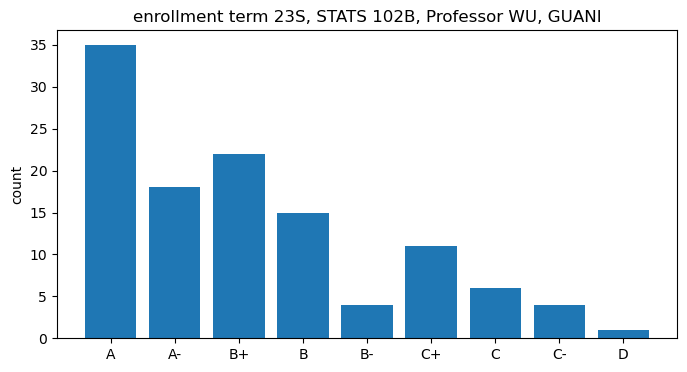

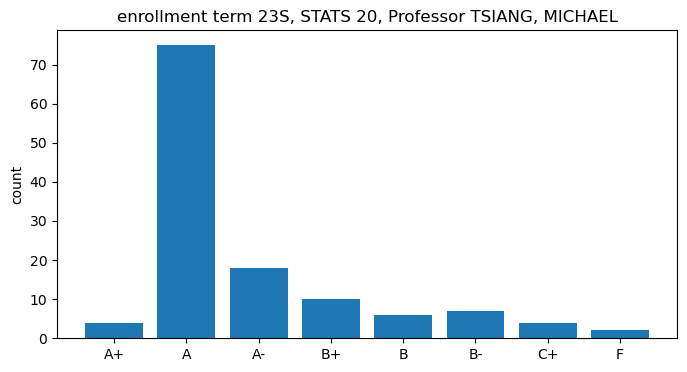

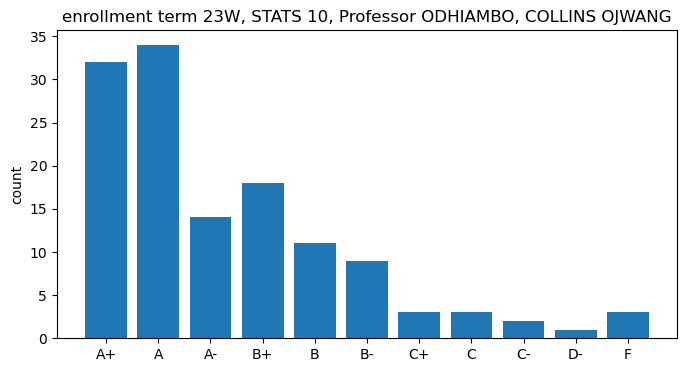

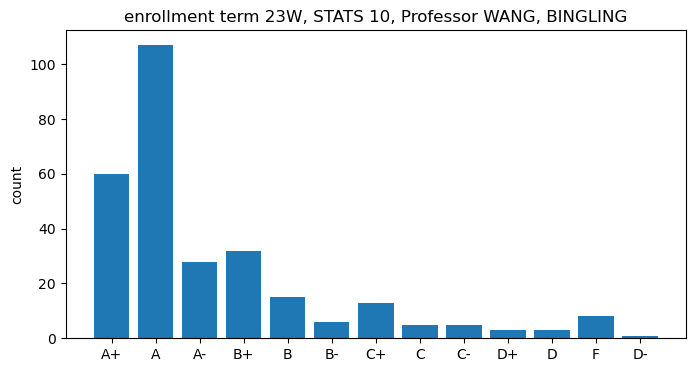

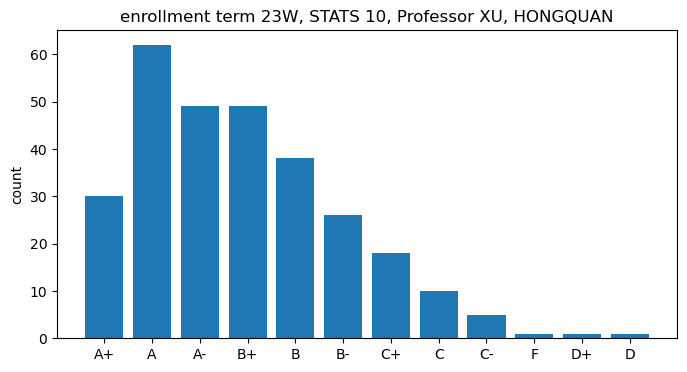

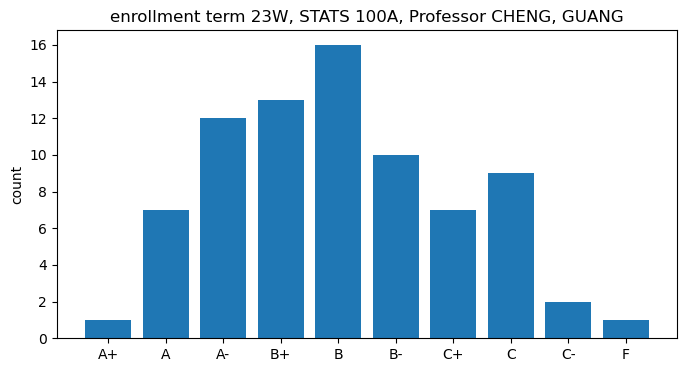

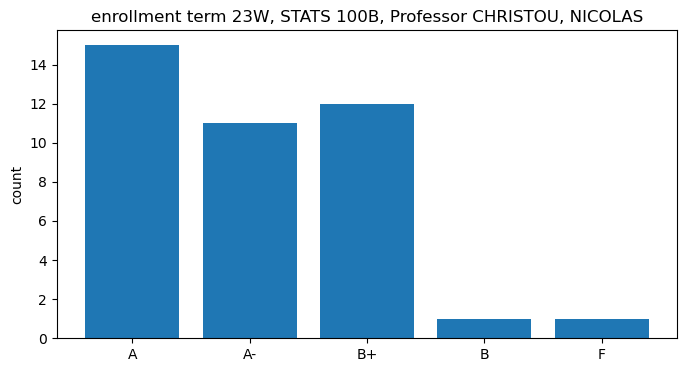

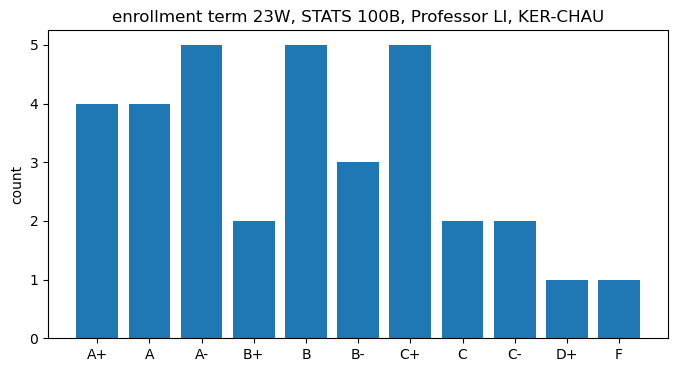

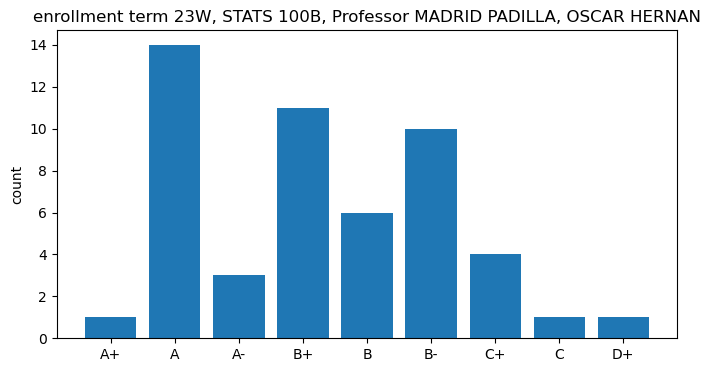

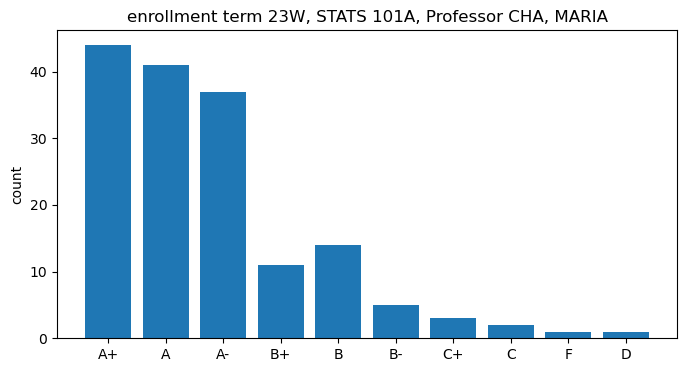

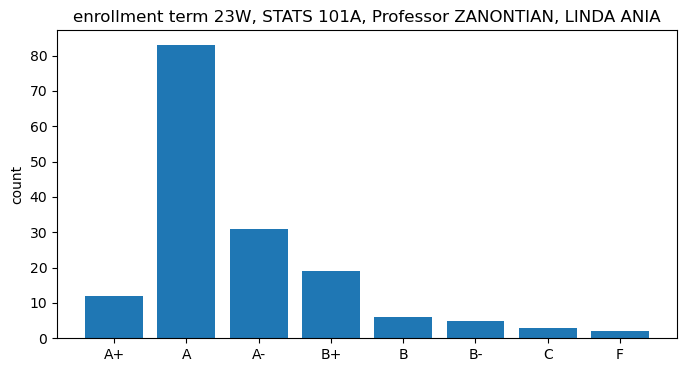

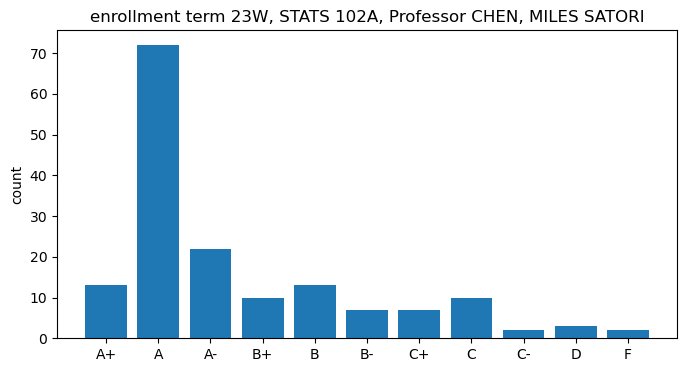

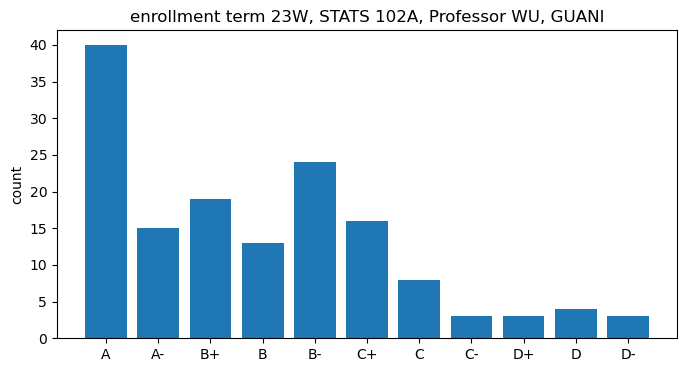

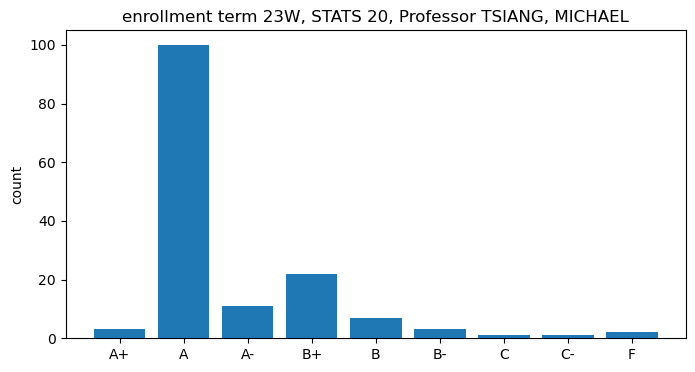

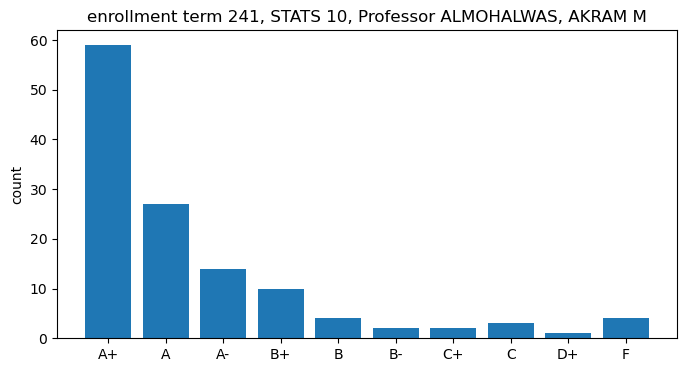

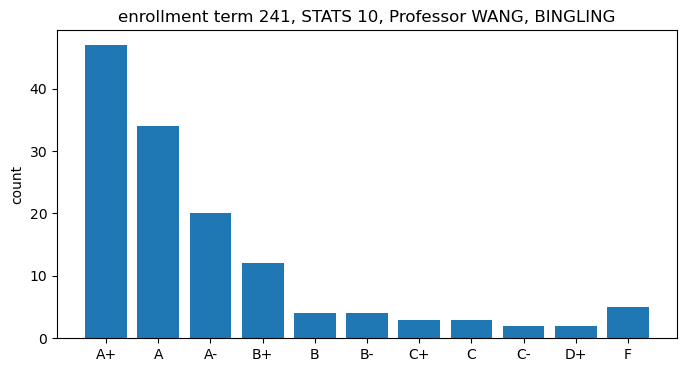

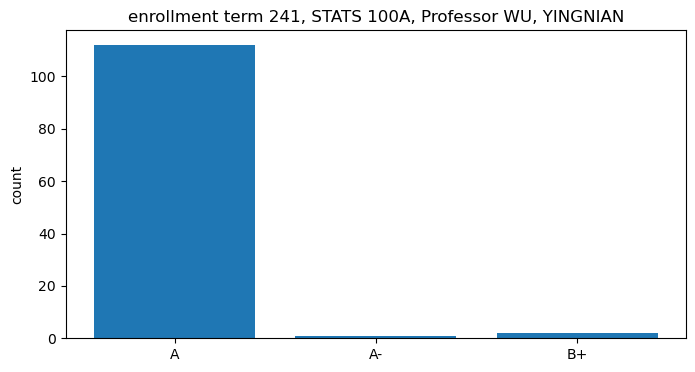

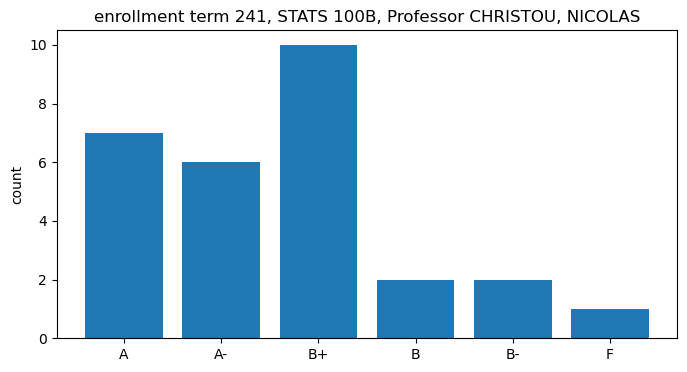

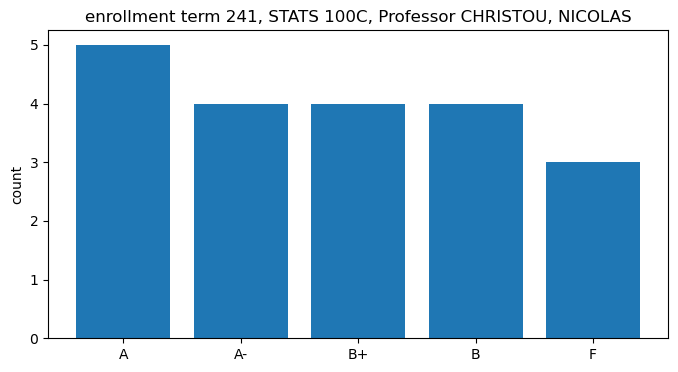

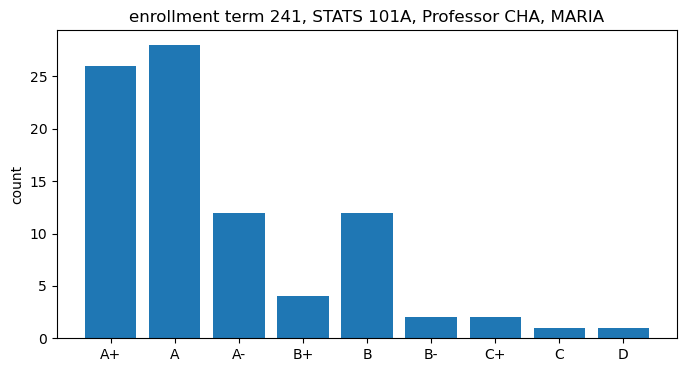

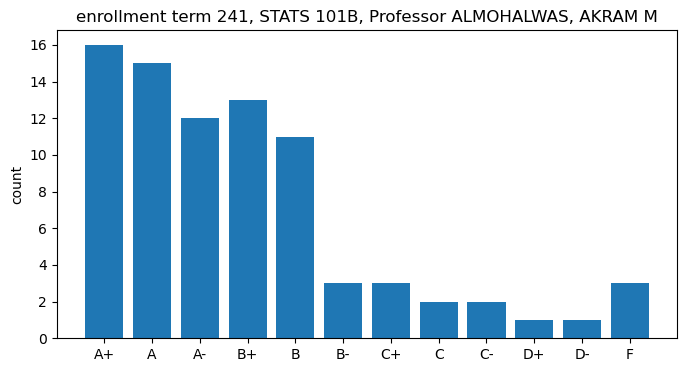

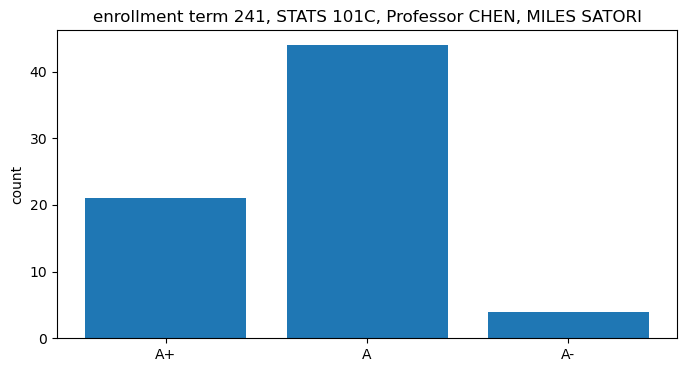

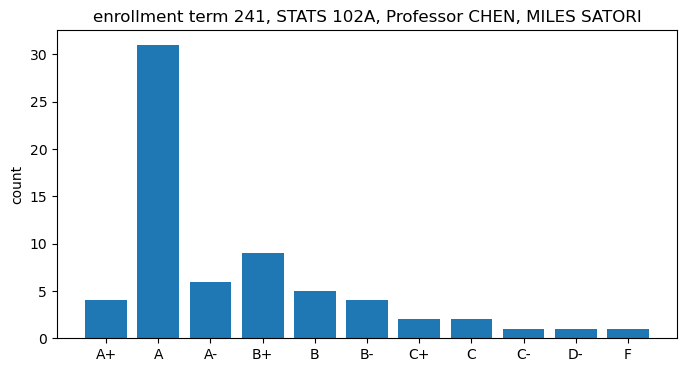

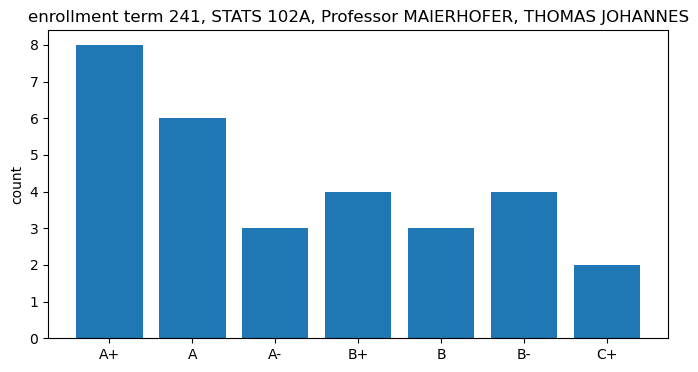

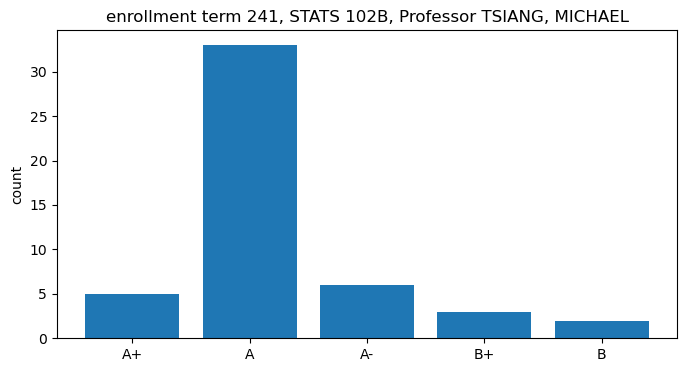

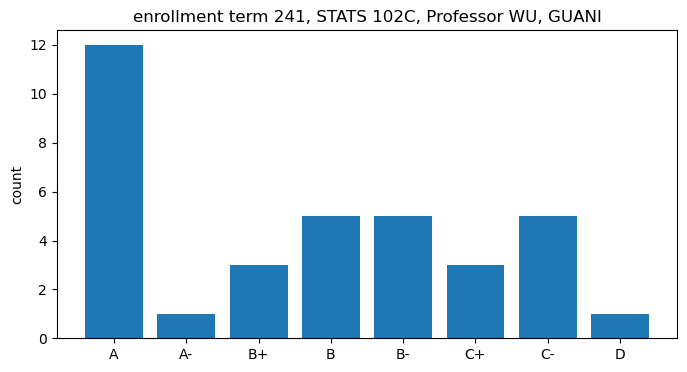

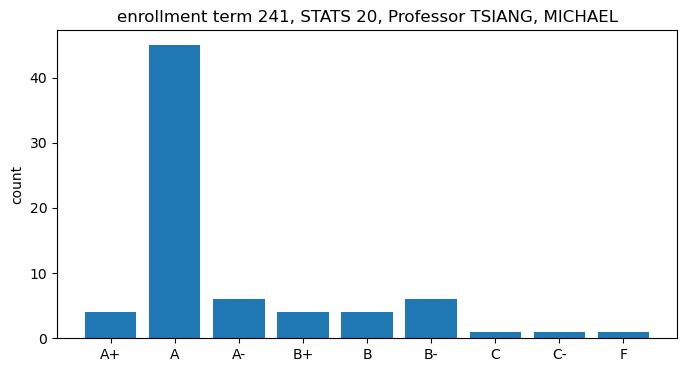

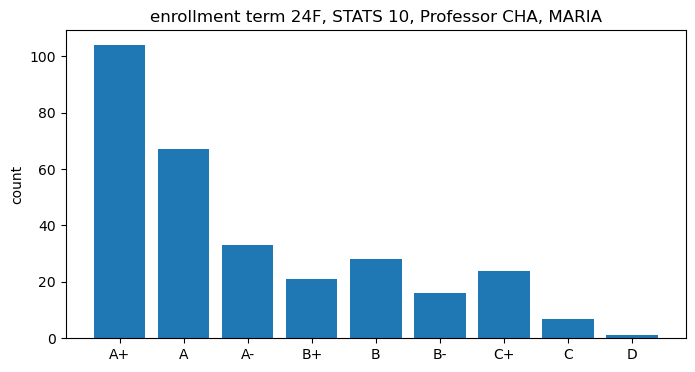

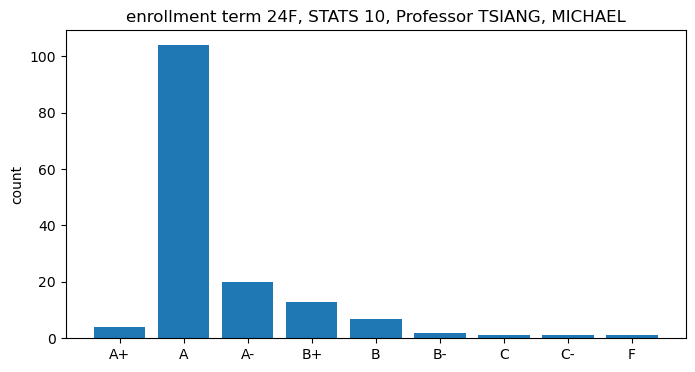

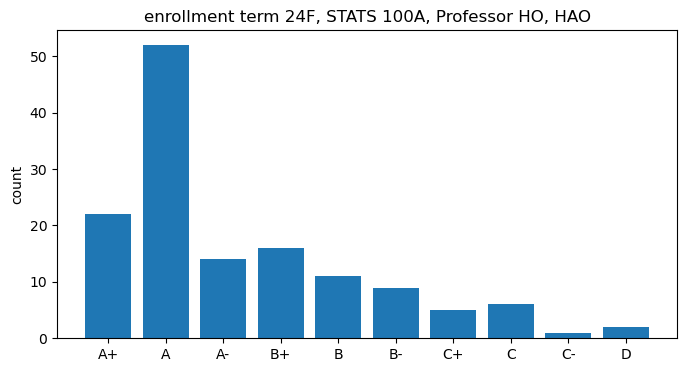

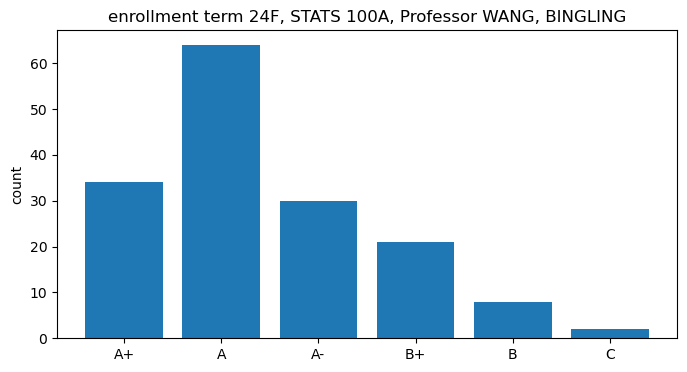

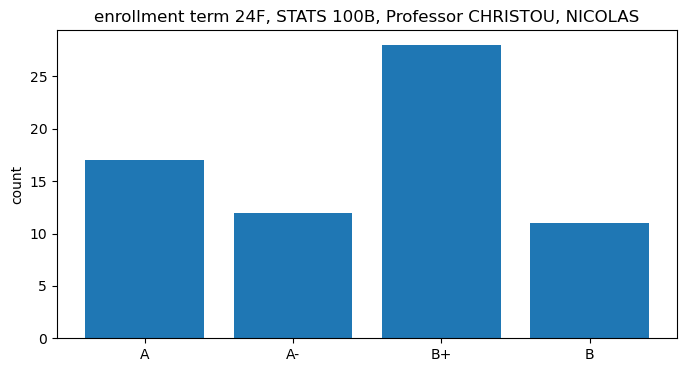

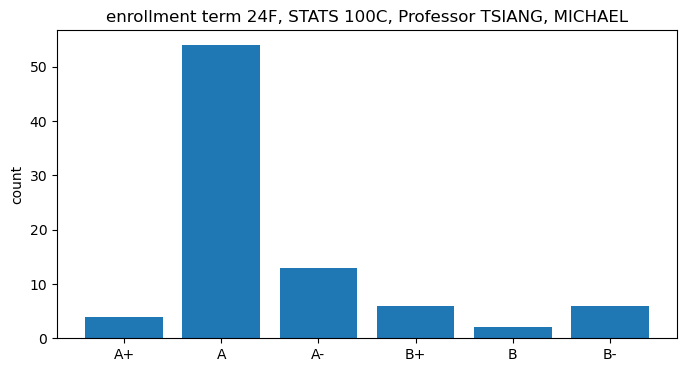

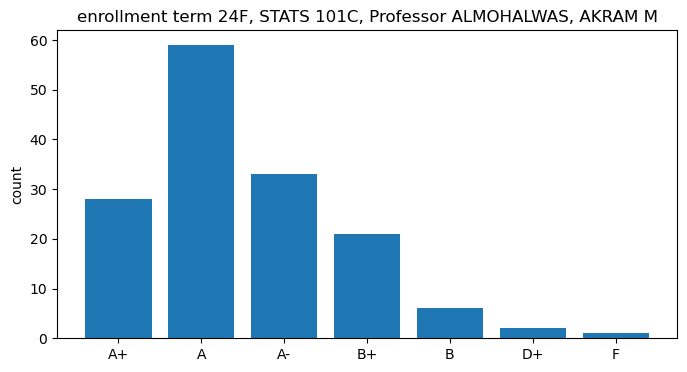

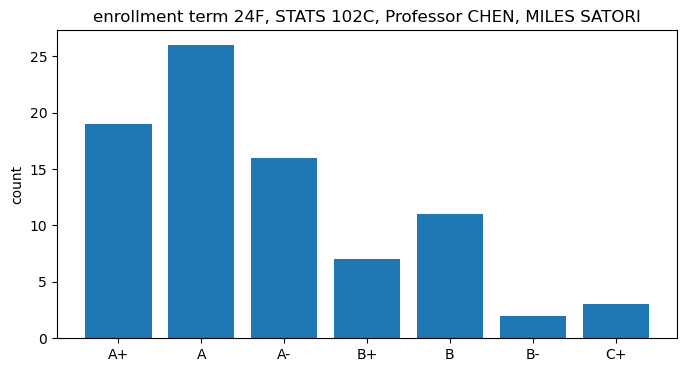

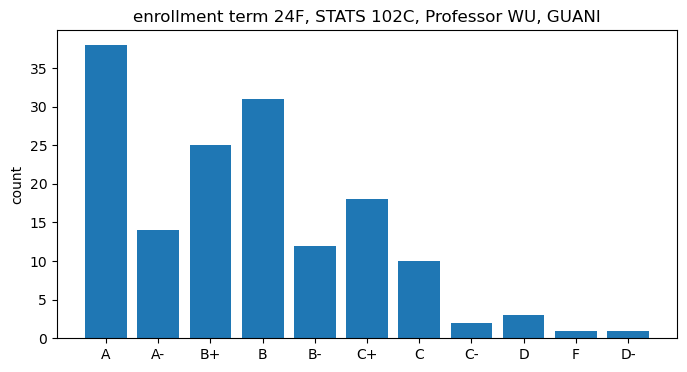

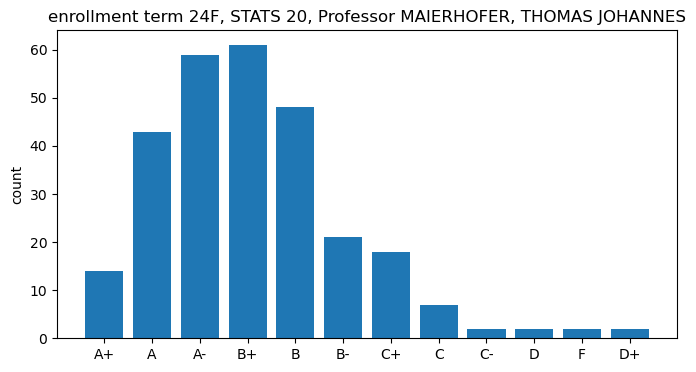

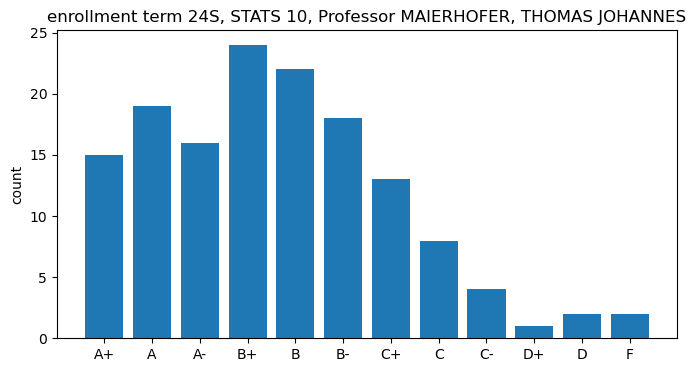

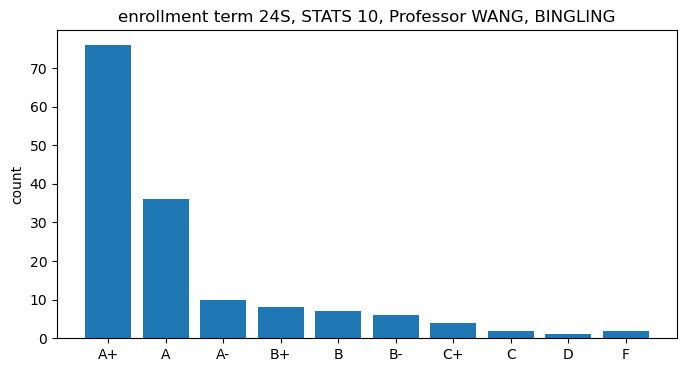

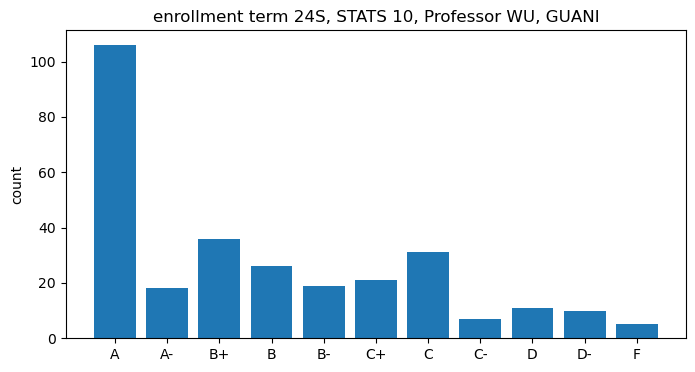

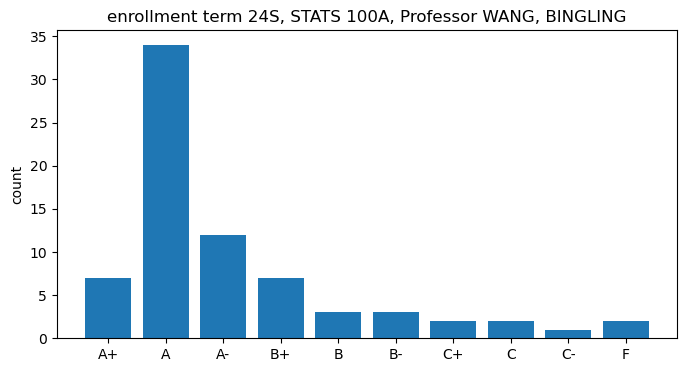

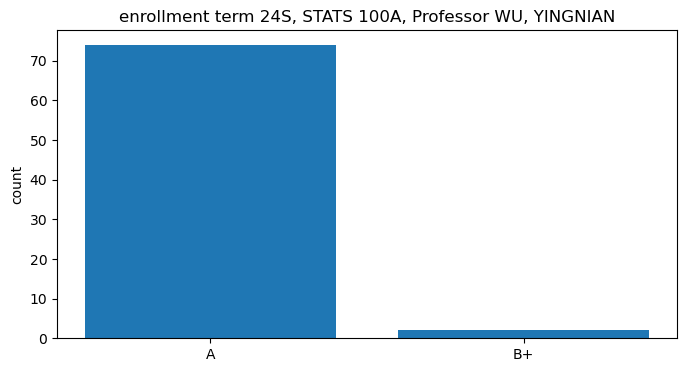

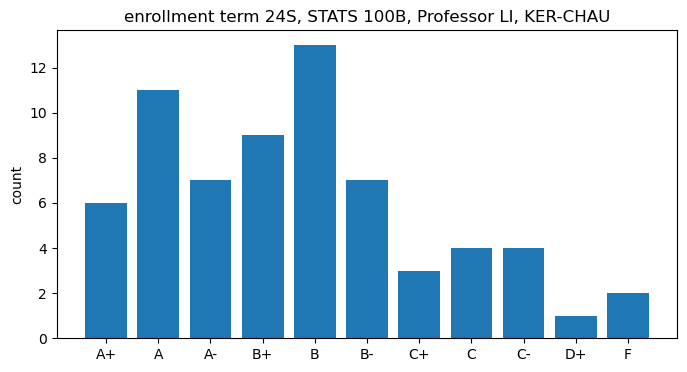

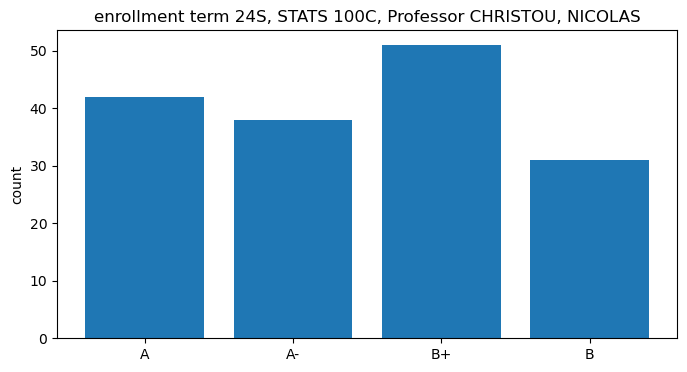

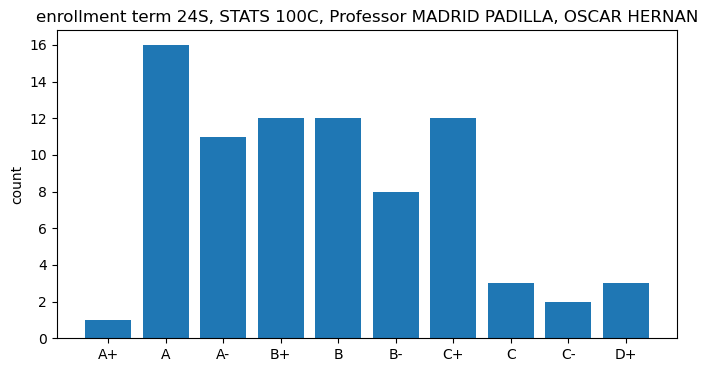

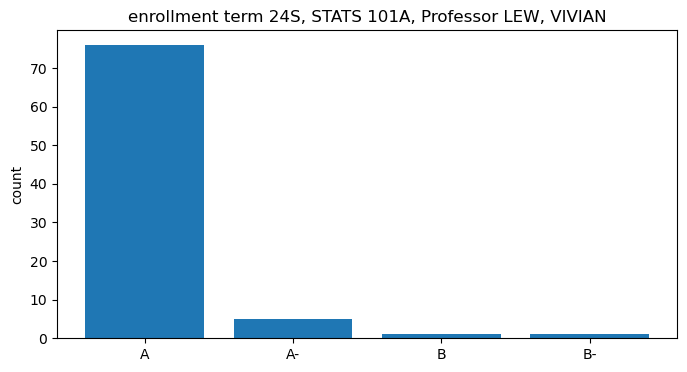

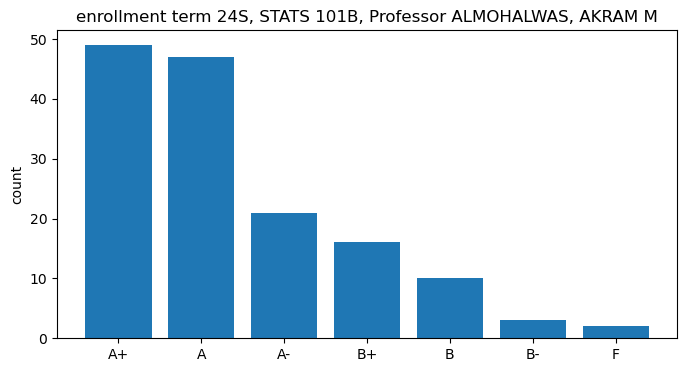

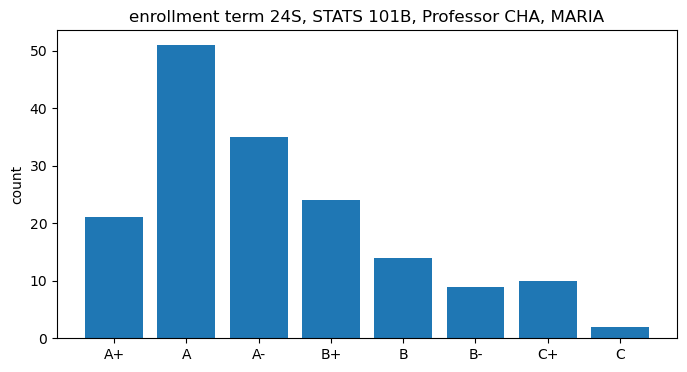

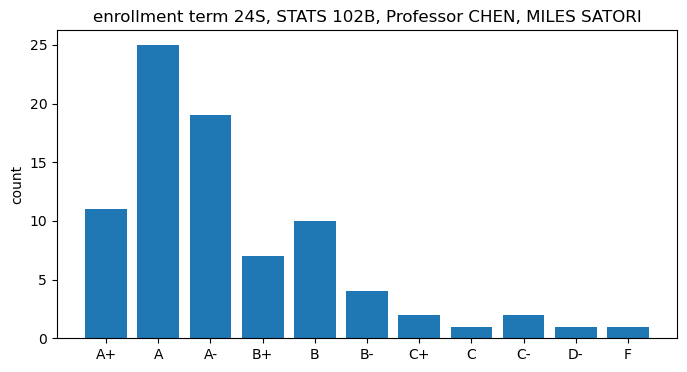

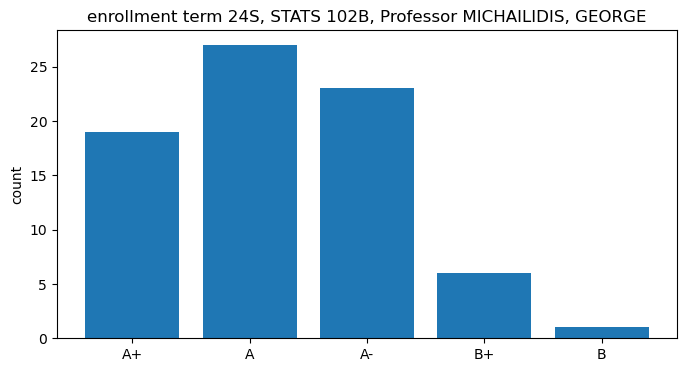

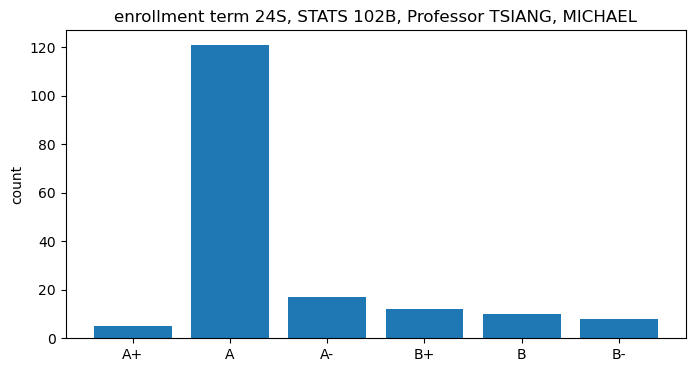

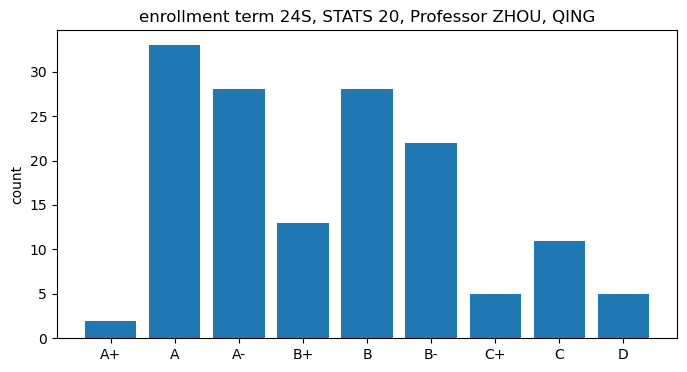

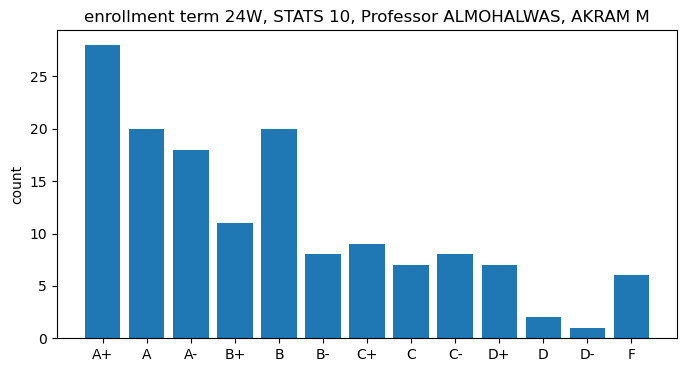

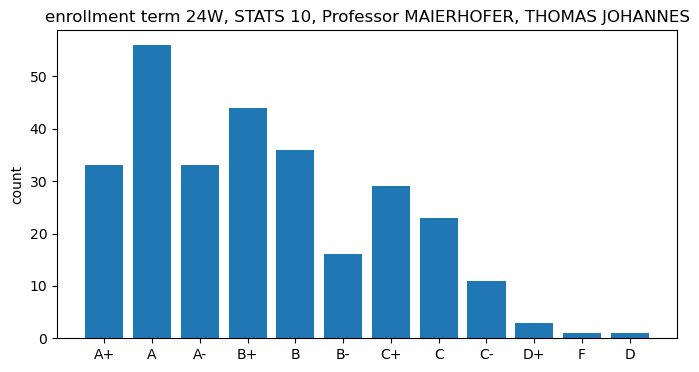

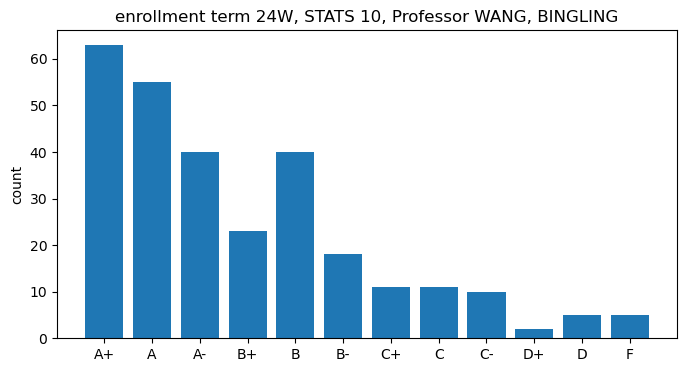

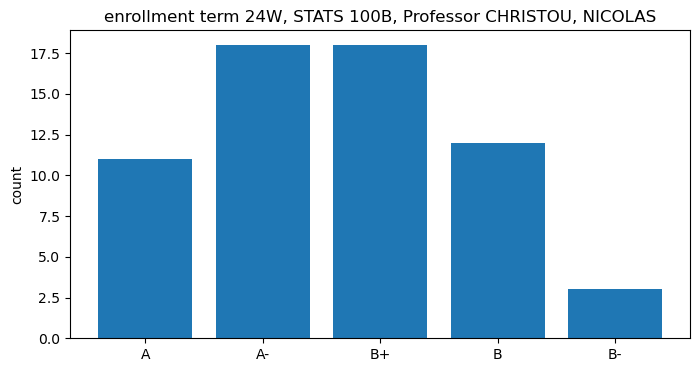

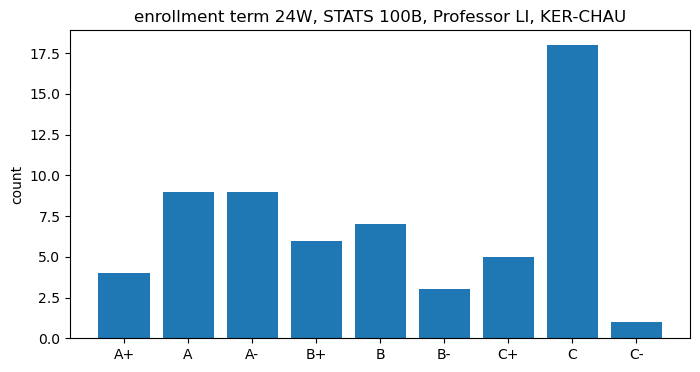

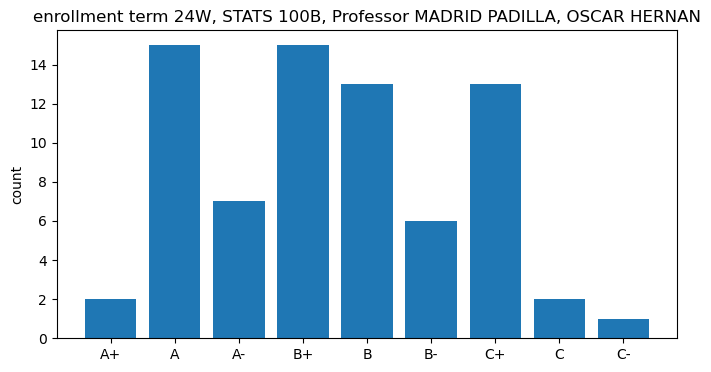

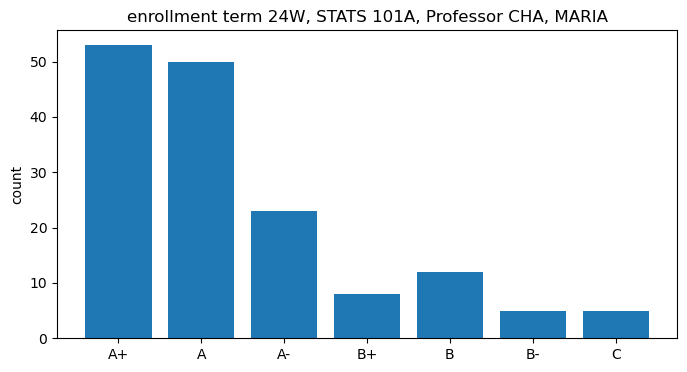

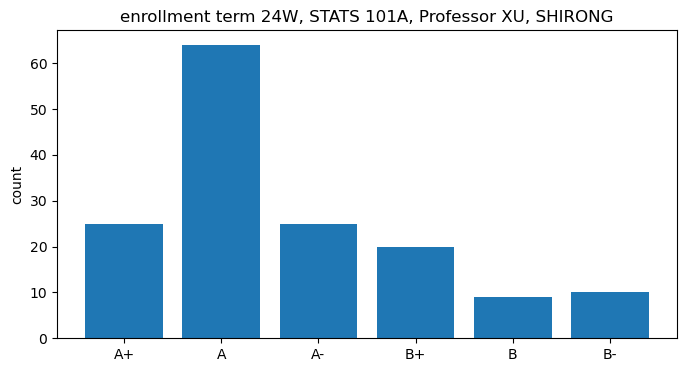

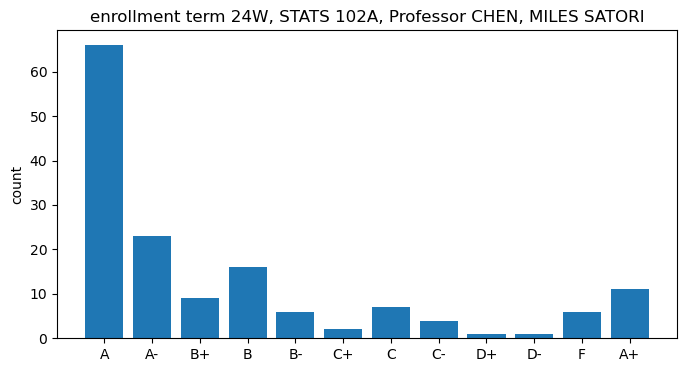

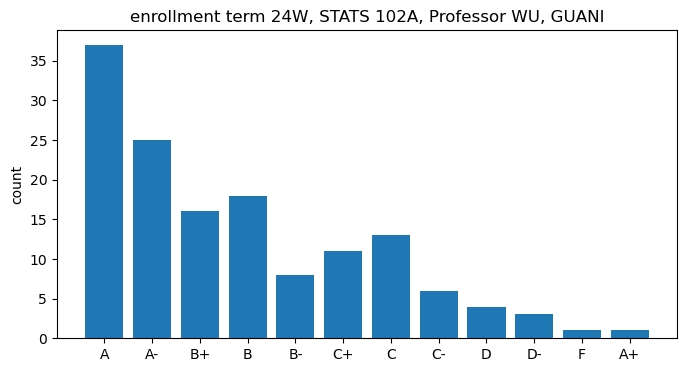

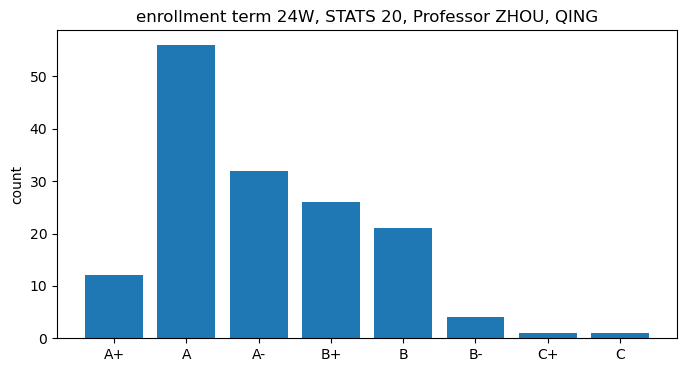

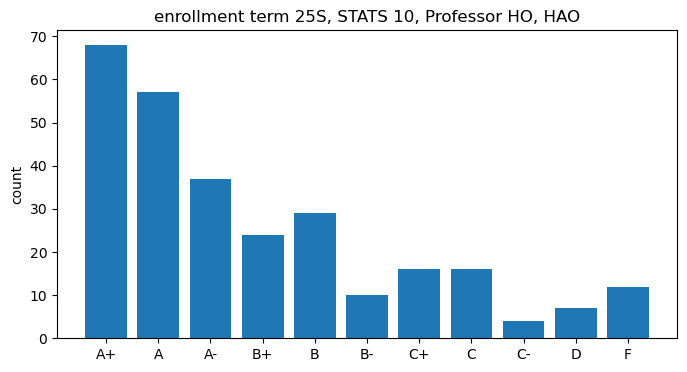

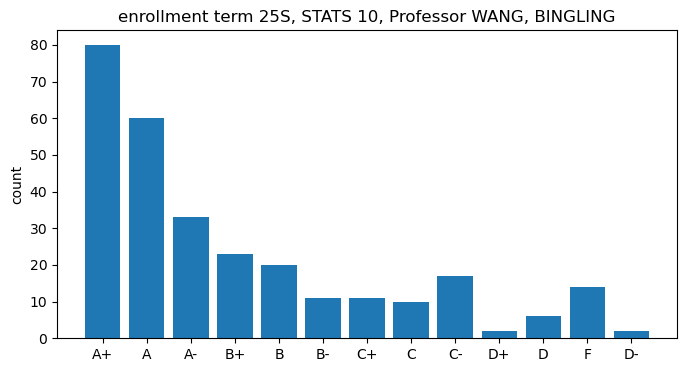

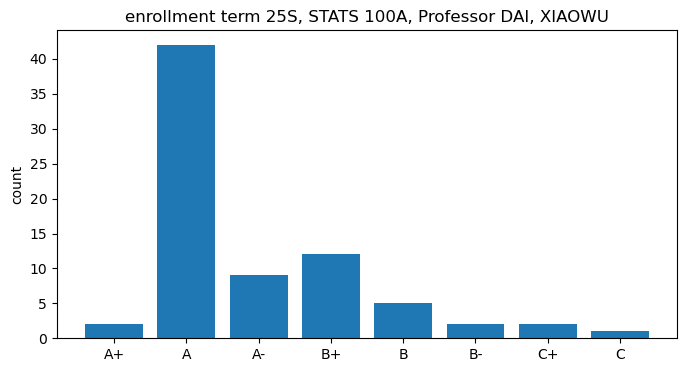

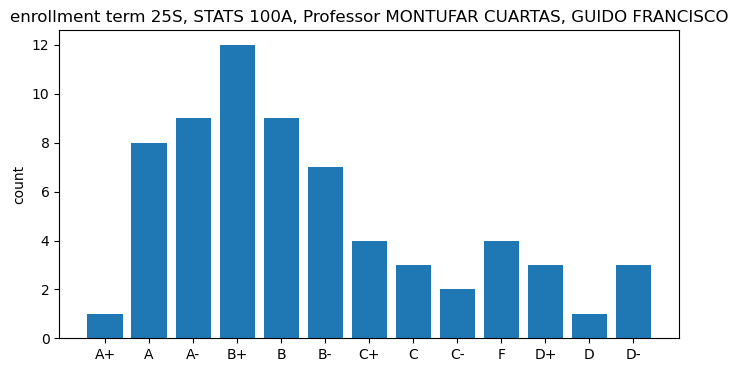

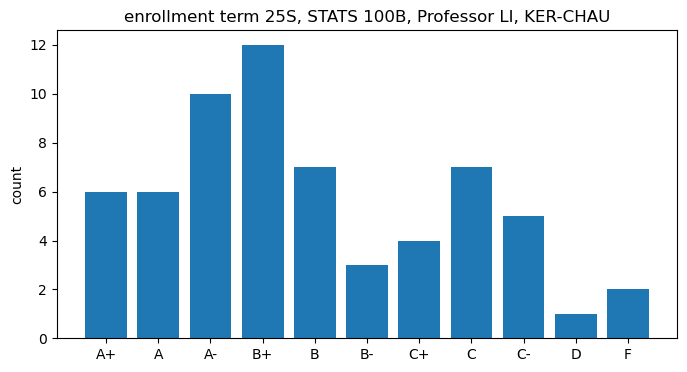

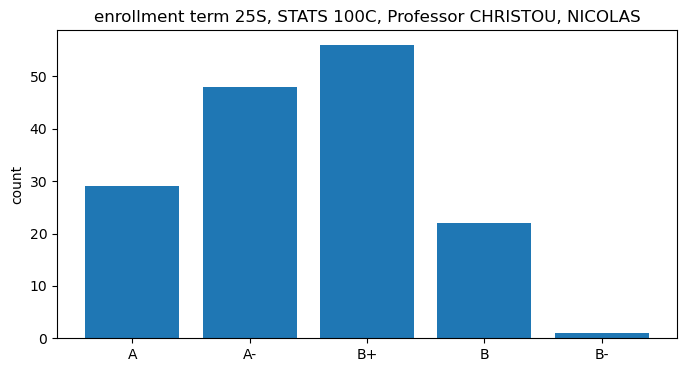

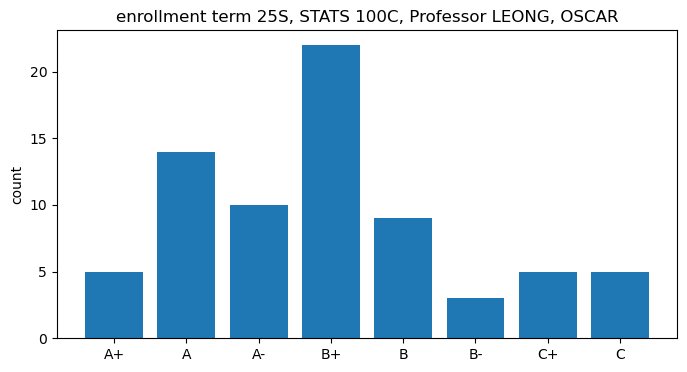

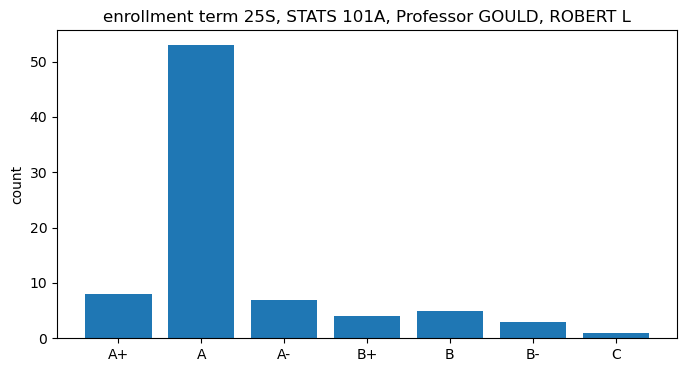

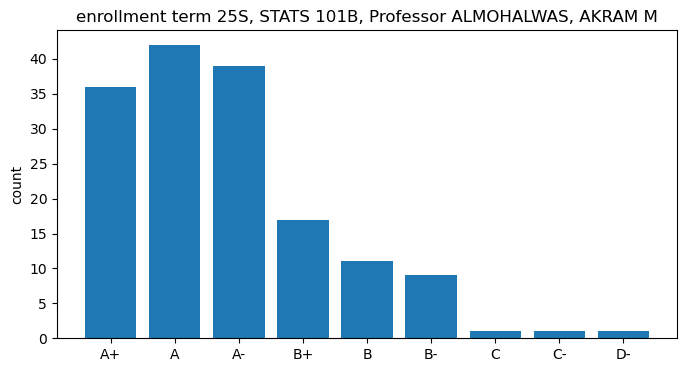

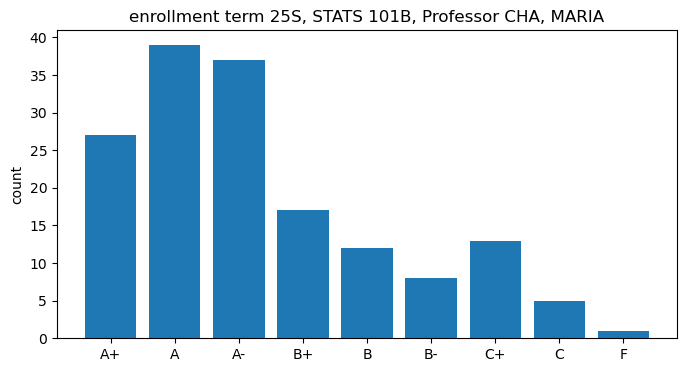

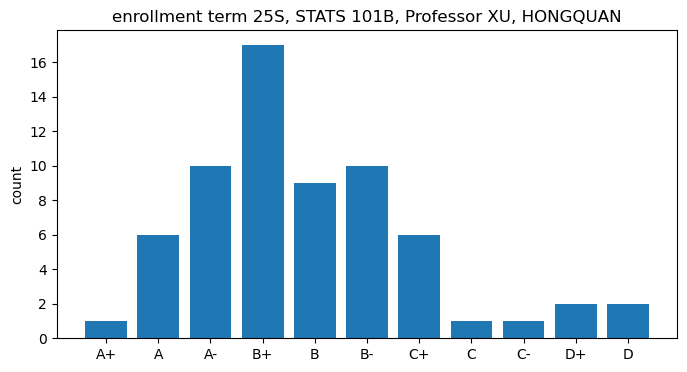

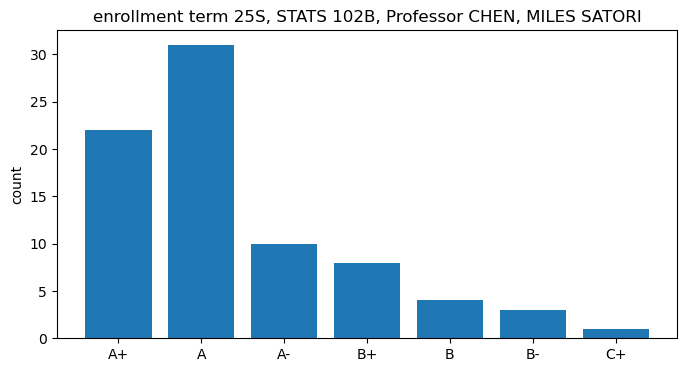

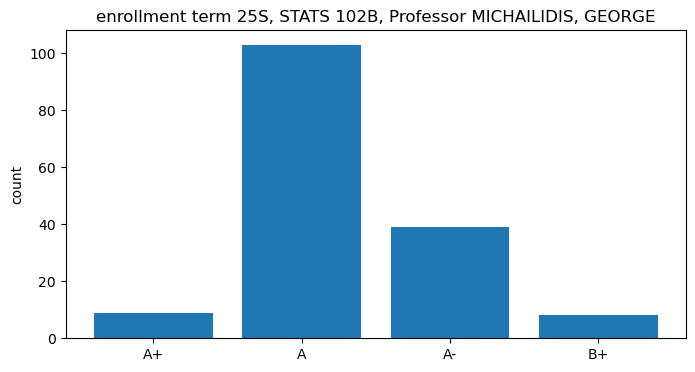

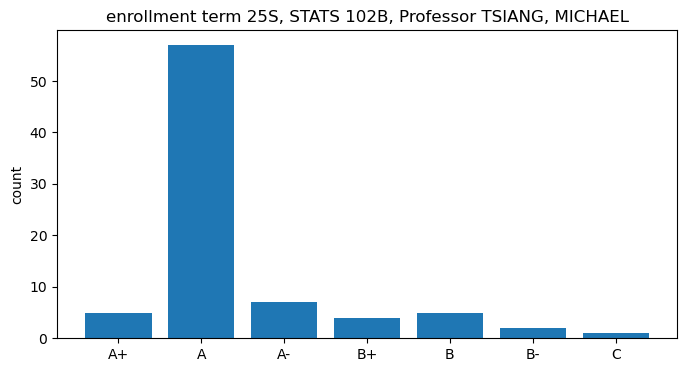

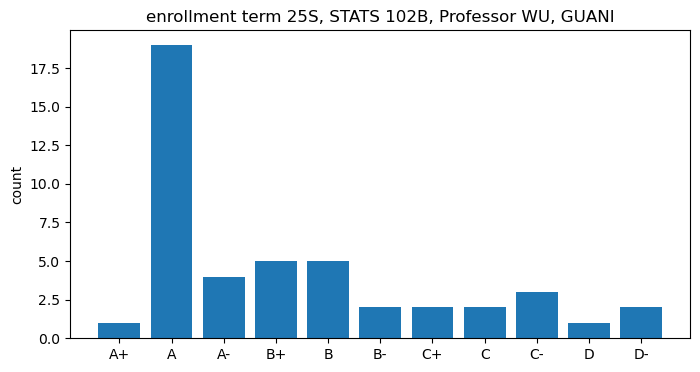

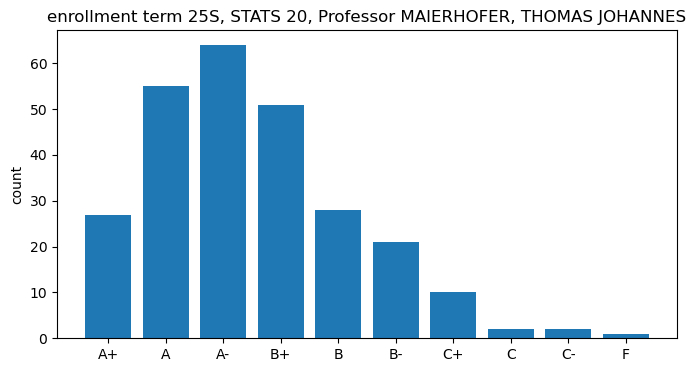

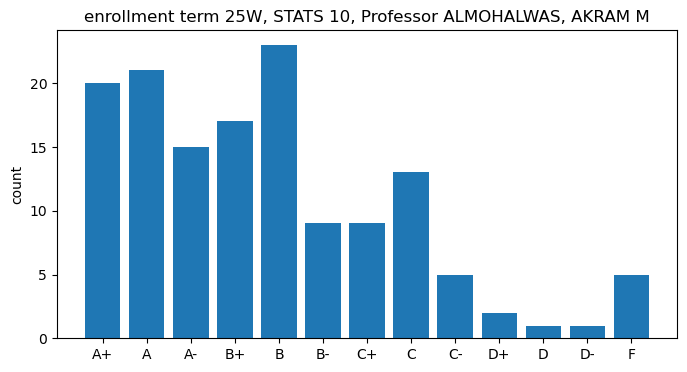

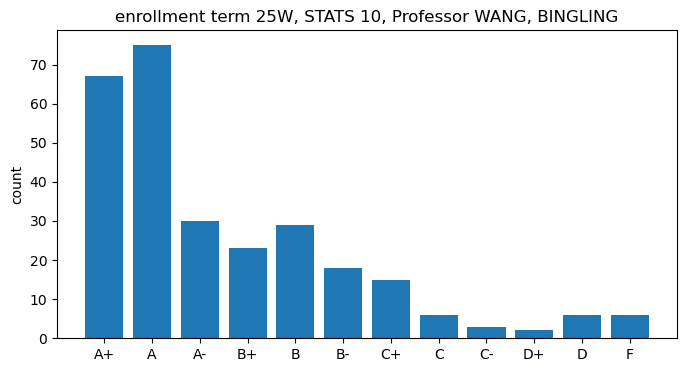

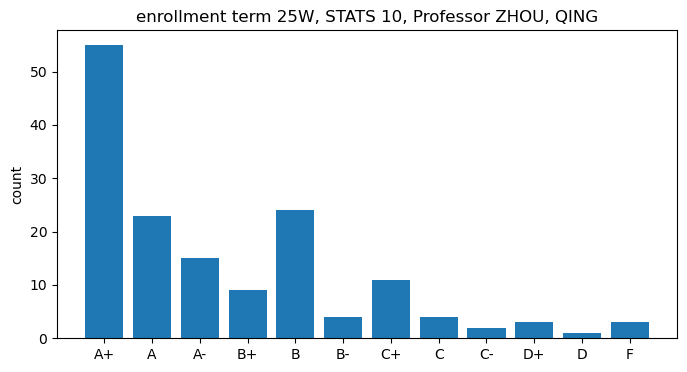

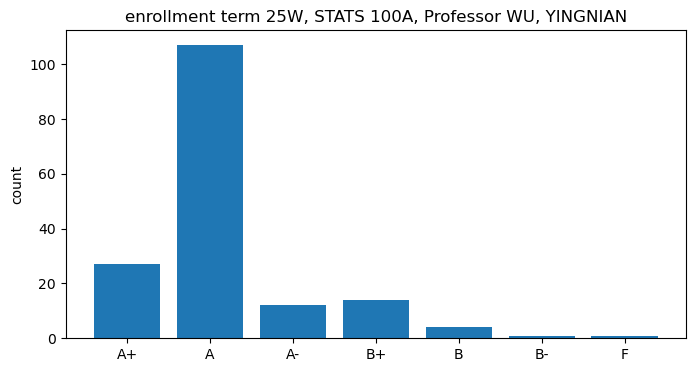

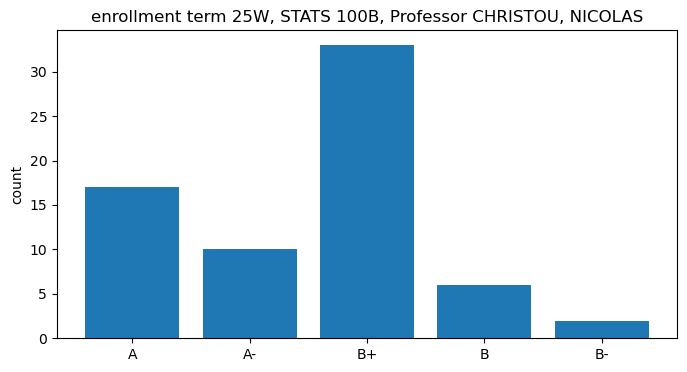

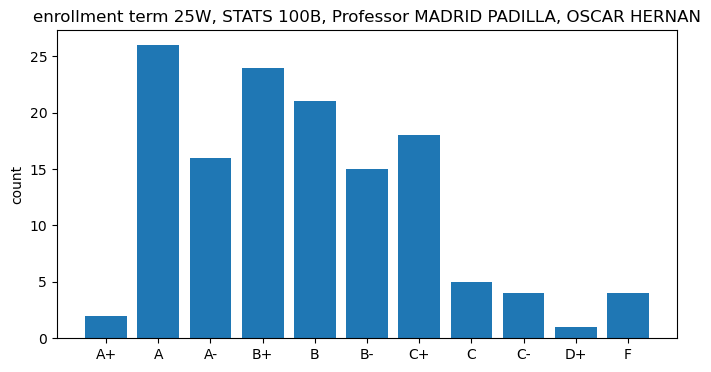

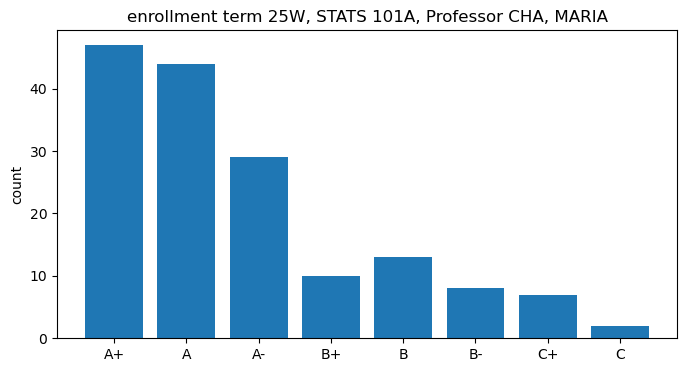

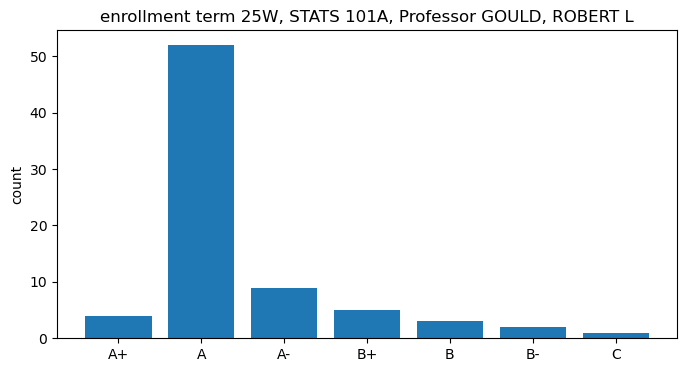

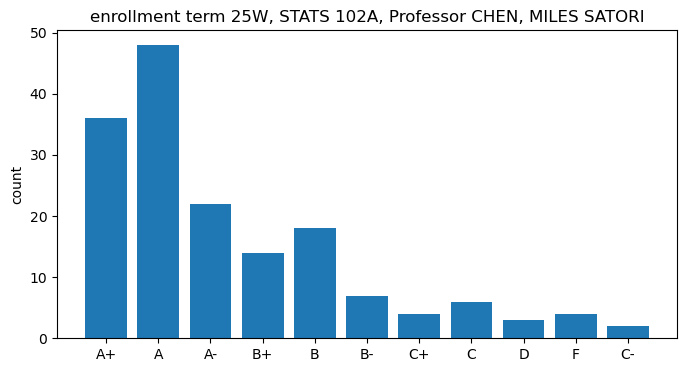

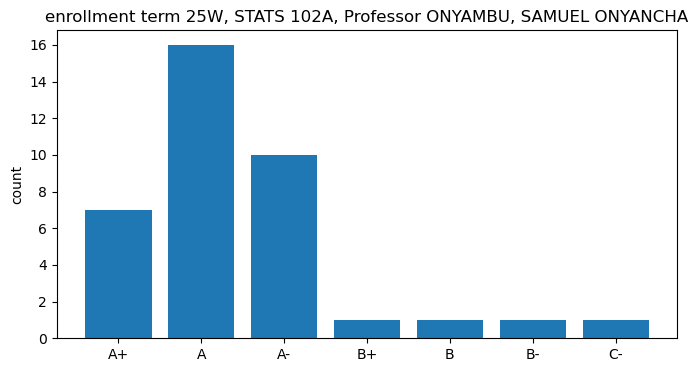

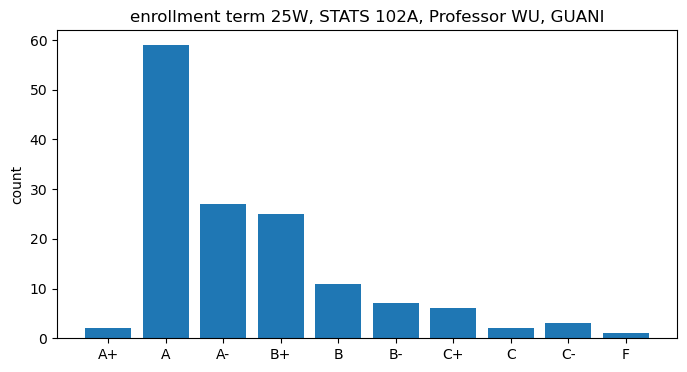

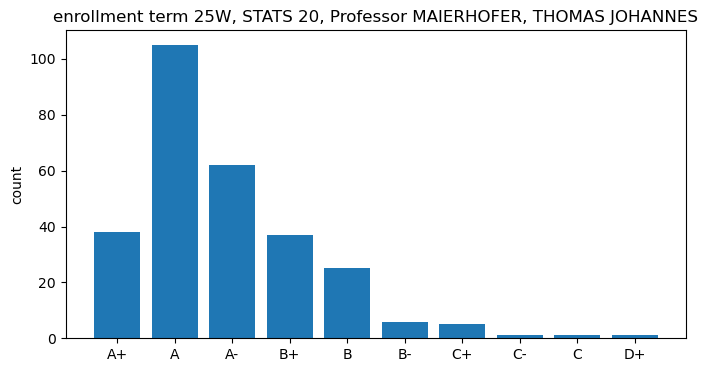

In [29]:
ucla_grades.head()

# classes are differentiated through their enrollment term and course number AND PROFESSOR
for (term, course, prof), group in ucla_grades.groupby(['ENROLLMENT TERM', 'CATLG NBR', 'INSTR NAME']):
    plt.figure(figsize=(8, 4))

    plt.bar(group['GRD OFF'], group['GRD COUNT'])
    plt.title(f"enrollment term {term}, STATS {course}, Professor {prof}")
    plt.ylabel('count')
    plt.show()


#### Data Visualizations! 

These are not for the project, but solely for showing how to write basic code

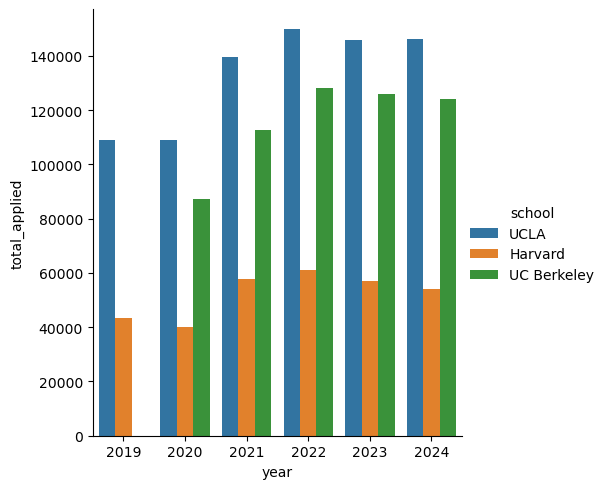

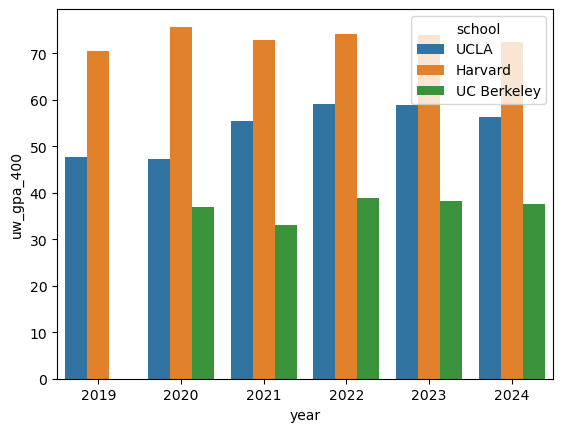

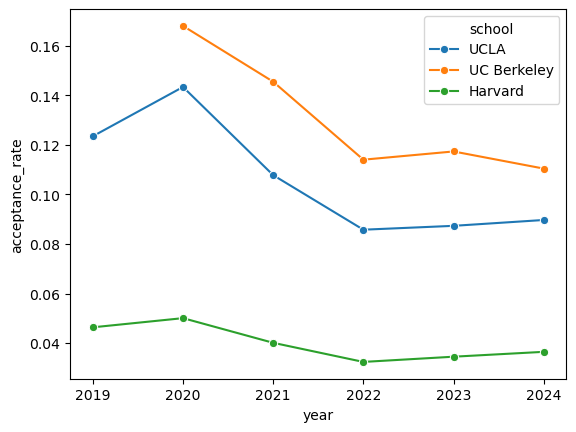

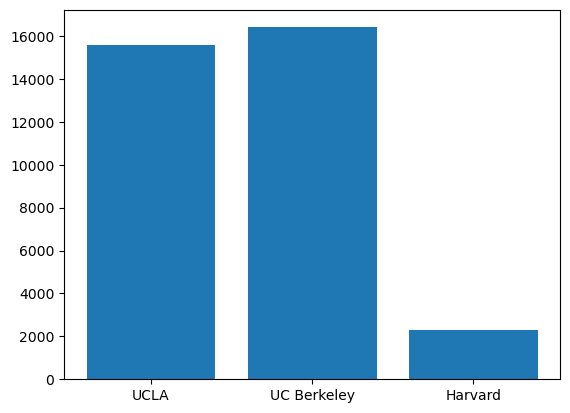

In [ ]:
sns.catplot(data = common_data_set, x = 'year', y = 'total_applied', hue = 'school', kind = 'bar')
plt.show()
sns.barplot(data = common_data_set, x = 'year', y = 'uw_gpa_400', hue = 'school')
plt.show()
sns.lineplot(data=common_data_set, x='year', y='acceptance_rate', hue='school', marker='o')
plt.show()
fig, ax = plt.subplots()
ax.bar(x = common_data_set['school'], height = common_data_set['total_accepted'])
plt.show()
ax.hist()